# Introduction to ML - Final Project
#### Ido Biran & Mor Baruch

##### Our project tries to predict the probability of a given user to purchase when visiting an E-commerce site. <br>

## Imports and Constants:

In [131]:
#generals 
import numpy as np
import pandas as pd
import os
import time
from scipy import stats
from typing import List, Dict


#plots
import seaborn as sns
import matplotlib.pyplot as plt

#preprocess
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import SCORERS
from sklearn.impute import KNNImputer

#models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

#model evalutation
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# One hot encoding
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 

# hide warning
import warnings
warnings.filterwarnings('ignore')

Installations:

In [132]:
## To install category encoders: pip install category_encoders

We used the above library in order to effectively change categoric columns to binary coded columns.<br>
What the library does:<br>
Recieves a Dataframe or SubDataFrame, and automatically encodes the columns with the chosen method (In our case One hot encoder).<br>
Also includes parameters for dealing with Nans in different techniques, and for dropping columns with 0 variance between them.

### Constants:

In [133]:
# Constants:

# Put path to files below:
TRAINPATH= "train.csv"
TESTPATH = "test.csv"


### Data importing

In [134]:
train = pd.read_csv(TRAINPATH, index_col=0)
test = pd.read_csv(TESTPATH, index_col=0)

## Data Exploration & Preprocessing

##### Features meaning:

*1. num_of_admin_pages:*<br>
The number of administrative pages (such as “profile settings”) the user visited during his session.<br>
<br>
*2. admin_page_duration:*<br>
Duration of time spent on administrative pages.<br>
<br>
*3. num_of_info_pages:*<br>
The number of information pages (such as “refund policy”) the user visited during his session.<br>
<br>
*4. info_page_duration:<br>*
Duration of time spent on information pages.<br>
<br>
*5. num_of_product_pages:*<br>
The number of product-related pages (such as “product tech specs”) the user visited during his session.<br>
<br>
*6. product_page_duration:*<br>
Duration of time spent on product-related pages.<br>
<br>
*7. Total_duration:*<br>
The total duration of the session.<br>
<br>
*8. BounceRates:*<br>
Google Analytics measure for percentage of users who enter the site from a specific page and then leave.<br>
<br>
*9. ExitRates:*<br>
Google Analytics measure for percentage of users who left the site from a specific page.<br>
<br>
*10. closeness_to_holiday:*<br>
How close was the session to a special day (like black Friday) or a holiday (like Passover)<br>
<br>
*11. Month:*<br>
The month of the year.<br>
<br>
*12. device:*<br>
Device the user used for the session.<br>
<br>
*13. internet_browser:*<br>
Internet browser used for the session.<br>
<br>
*14. Region:*<br>
Geographic origin of user IP<br>
<br>
*15. User type:*<br>
Is the user is returning, new or unknown.<br>
<br>
*16. Weekend:*<br>
was the session made during the weekend or not.<br>
<br>
*17. A,B,C,D:*<br>
Anonymous columns – might be helpful for prediction.<br>
<br>
*18. purchase:*<br>
Label column – was a purchase made during the session or not.<br>



#### Data types & Features explanation

In [135]:
train.dtypes


num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
purchase                   int64
dtype: object

In [136]:
train.head()

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.0,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.0,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.0,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.0,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


Above we displayed our data frame columns. As we can see, there are 22 features including "purchase"- so 21 features and "purchase" as our label. <br>
We will try to look at two different "Types" of data- Numeric and Categorical. <br>
Numerical are features we recognize have a certain distribution, and that we understand that the ordinal size of the values is of importance.<br>
Categorical are features with no obvious distribution and that the ordinal size of the values doesn't matter. <br>
Hence, We decided to split the data to Numerical and Categorial groups and explore each of them seperately.


Before we proceed to explore each group there are several things we need to fix: <br> 1. Change the features type of 'info_page_duration' and 'product_page_duration' by removing the 'minutes' string. <br> 2. There are several features, (such as device, region and closeness to holiday), with float type but that in their essence aren't numerical. We will put them in the categoric group.

In [137]:
#Changing categorical features to floats
def cattofloatstraintest(train= train, test = test):
    train["info_page_duration"] = train["info_page_duration"].replace(" minutes", "", regex=True)
    train["info_page_duration"] = train["info_page_duration"].astype(np.float64)

    train["product_page_duration"] = train["product_page_duration"].replace(" minutes", "", regex=True)
    train["product_page_duration"] = train["product_page_duration"].astype(np.float64)

    train["device"] = train["device"].astype(object)
    train["Region"] = train["Region"].astype(object)
    train["closeness_to_holiday"] = train["closeness_to_holiday"].astype(object)


    #Changing categorical features to floats
    test["info_page_duration"] = test["info_page_duration"].replace(" minutes", "", regex=True)
    test["info_page_duration"] = test["info_page_duration"].astype(np.float64)

    test["product_page_duration"] = test["product_page_duration"].replace(" minutes", "", regex=True)
    test["product_page_duration"] = test["product_page_duration"].astype(np.float64)

    test["device"] = test["device"].astype(object)
    test["Region"] = test["Region"].astype(object)
    test["closeness_to_holiday"] = test["closeness_to_holiday"].astype(object)
    return train, test


In [138]:
train, test = cattofloatstraintest()

# Numeric

In [139]:
#Finding numeric data
all_cols =  train.columns
numeric = train.select_dtypes(include = [np.number]).columns
cat_cols = list(set(all_cols)-set(numeric))
#numeric data:
train[numeric].head(5)

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,B,D,purchase
id,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.200000,0.200000,0.0,118.880094,NaN,0
1,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.200000,0.200000,0.0,113.358423,NaN,0
2,0.0,0.0,0.0,NaN,NaN,627.500000,627.500000,0.020000,0.050000,0.0,121.507695,NaN,0
3,0.0,0.0,0.0,0.0,19.0,154.216667,154.216667,0.015789,0.024561,0.0,93.747176,NaN,0
4,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.200000,0.200000,0.0,99.545824,NaN,0


In [140]:
corr = train[numeric].corr()
corr.style.background_gradient(cmap='coolwarm')

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,B,D,purchase
num_of_admin_pages,1.000000,0.591505,0.383974,0.254367,0.436619,0.373130,0.447180,-0.222772,-0.317713,0.102648,-0.016465,-0.197337,0.145048
admin_page_duration,0.591505,1.000000,0.297256,0.242246,0.291797,0.372102,0.445325,-0.141197,-0.202072,0.068009,-0.018782,-0.110871,0.097504
num_of_info_pages,0.383974,0.297256,1.000000,0.632028,0.382615,0.398101,0.489927,-0.116471,-0.165944,0.046150,-0.021416,-0.167875,0.095563
info_page_duration,0.254367,0.242246,0.632028,1.000000,0.276376,0.359926,0.410491,-0.073239,-0.104698,0.026554,-0.014526,-0.247633,0.070309
num_of_product_pages,0.436619,0.291797,0.382615,0.276376,1.000000,0.860769,0.877881,-0.202365,-0.292254,0.057020,-0.019066,-0.326672,0.157167
product_page_duration,0.373130,0.372102,0.398101,0.359926,0.860769,1.000000,0.994425,-0.180218,-0.248587,0.050822,-0.022030,-0.323870,0.152133
total_duration,0.447180,0.445325,0.489927,0.410491,0.877881,0.994425,1.000000,-0.192154,-0.265104,0.054231,-0.026004,-0.236378,0.145429
BounceRates,-0.222772,-0.141197,-0.116471,-0.073239,-0.202365,-0.180218,-0.192154,1.000000,0.911589,-0.116746,0.008744,0.147855,-0.150683
ExitRates,-0.317713,-0.202072,-0.165944,-0.104698,-0.292254,-0.248587,-0.265104,0.911589,1.000000,-0.172314,0.007393,0.231711,-0.207804
PageValues,0.102648,0.068009,0.046150,0.026554,0.057020,0.050822,0.054231,-0.116746,-0.172314,1.000000,-0.012400,-0.447703,0.486404


### Splitting numerics into groups:
In order to simplify the big Numeric group, we decided to split the numerical data into several different groups: <br>
1. Numdur: Numbers and Durations of pages.<br>
2. Rates: Bounce Rates, Exit Rates & Page Values.<br>
3. Othernum: simply the rest. They dont obviously belong to a specific category. <br>

In [141]:
numdur = ['num_of_admin_pages','admin_page_duration','num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','total_duration','purchase']
rates = ['BounceRates','PageValues','ExitRates','purchase']
othernum = ['B', 'D','purchase']

### Exploration & Preprocessing Introduction

For each sub-group we would like to explore the features and then make preprocessing actions.<br>
For Exploration we will use:<br> 
1. Histograms to plot the distribution
2. Dotplot to see diffrences between purchase == 1/0 distributions
3. Correlation matrix

For the preprocessing action we will use helper functions, and we will give attention to:<br>
1. Outlier removal
2. Normalization
3. Filling missing values (NA)

##### Oultier Removal

Outliers are samples that brings noise to our data.<br>
There are many ways to recognize and remove outliers, in each part in our preprocessing we tried to use our exploration to find the best way to do it.

##### Normalization
From a first glance at our data, we can see that many of our feautures aren't normalized to certain values.<br>
While going through the data, we will make sure all of our values are normalized.<br>
It is important for us to normalize because there are models which are sensitive to changes in values when comparing features with different scaled values.<br>
There fore, we will normalize between 0 and 1.<br>

To normalize we will use the MinMaxScaler function. We will fit it on the train to find the normalizing function for the feature, and transform the train and test based on that function.



##### Filling missing values (NA):
We will have several options to decide how we want to fill our N.A values. Every time we will try to understand what is the best option for a specific group of features.<br>
In addition, in each iteration of our project we tried changing our ways of filling NAs, and seeing if our model predictions improve.<br>

##### The options we have are:<br>
1. Remove a whole line / column.
2. Fill by median.
3. Fill by average.
4. Fill by most common value in a specific feature.
5. Fill using KNN imputer.

In addition, we took into account that the test dataset cannot be filled by comparing to test, so we filled its values using medians from the train dataset.


In [142]:
# 2
def fill_median(df,col):
    val = df[col].median()
    df[col]=df[col].fillna((val))
    return df
# 3
def fill_average(df, test, col):
    val = df[col].mean()
    df[col]=df[col].fillna((val))
    test[col]=test[col].fillna((val))
    return df, test
# 4
def fill_most_common(df,col):
    val = df[col].mode(dropna=True)[0]
    df[col]=df[col].fillna((val))
    return df
# 5
def knn_nan(df):
    imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
    imputer.fit(df)
    Xtrans = imputer.transform(df)
    df.iloc[:,:] = Xtrans
    return df

#Implementing a function to display the NA cells in each feature
def NA_table(data):
    null_table = pd.DataFrame({'Count NA':data.isnull().sum(),'%' : np.round(data.isnull().sum() * 100 / len(data), decimals=2)})
    return null_table.sort_values('Count NA', ascending = False)

#Function to fill test by median:
def fill_test_by_median(df_train, df_test):
    for col in df_train:
        val = df_train[col].median()
        df_test[col]=df_test[col].fillna(val)
    return df_test
    

### Sub-Group: Numdur

### Exploration

array([[<AxesSubplot:title={'center':'num_of_admin_pages'}>,
        <AxesSubplot:title={'center':'admin_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_info_pages'}>],
       [<AxesSubplot:title={'center':'info_page_duration'}>,
        <AxesSubplot:title={'center':'num_of_product_pages'}>,
        <AxesSubplot:title={'center':'product_page_duration'}>],
       [<AxesSubplot:title={'center':'total_duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

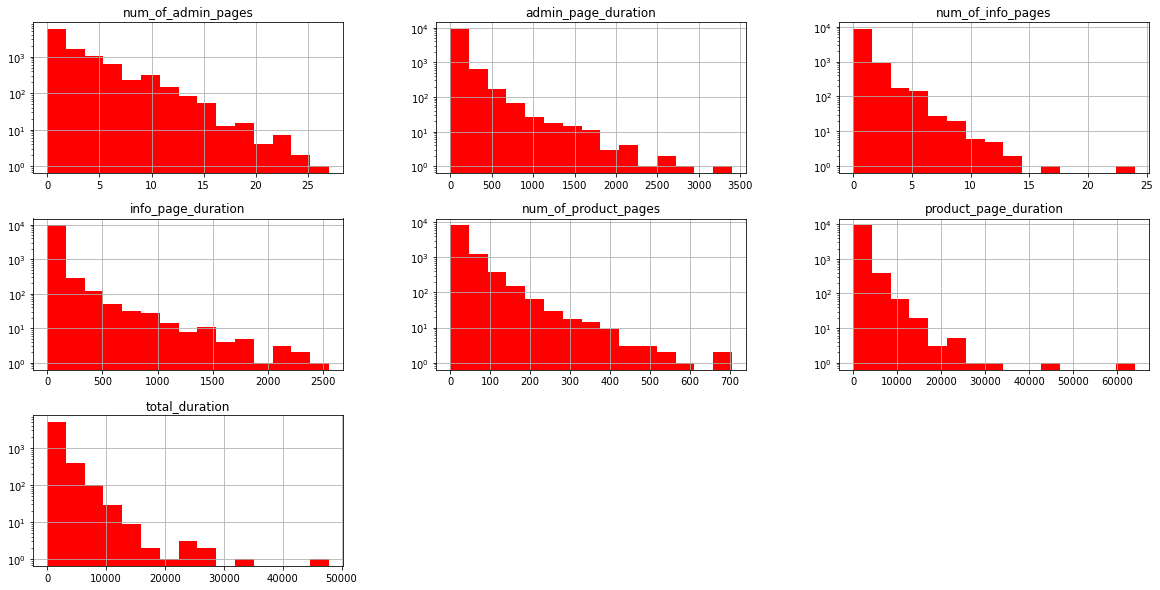

In [143]:
#histograms
train[numdur[:-1]].hist(figsize = (20,10), bins=15, log=True, color = 'r')


##### Conclusion from distributions:
It seems the page and duration distributions are exponential. This makes sense because we would expect that most users spend a small amount of time and scroll through a small amount of pages, whereas few spend a lot of time and scroll through many pages.

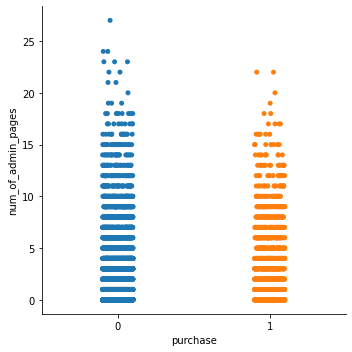

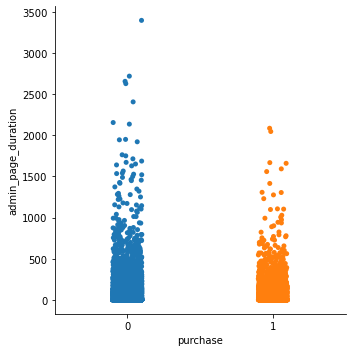

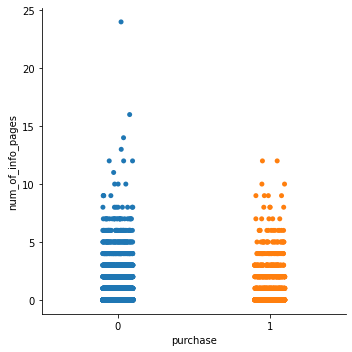

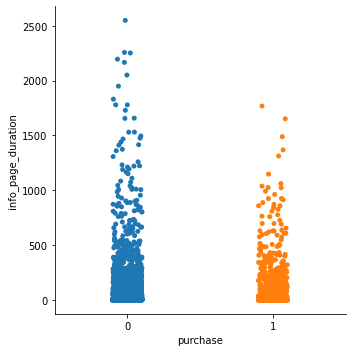

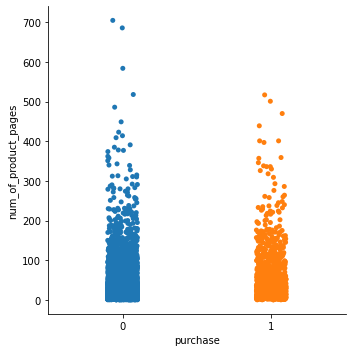

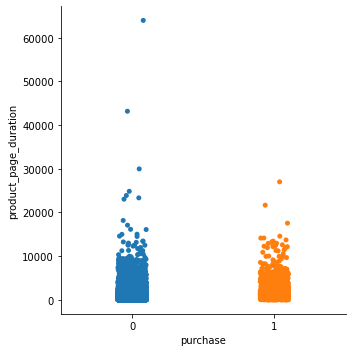

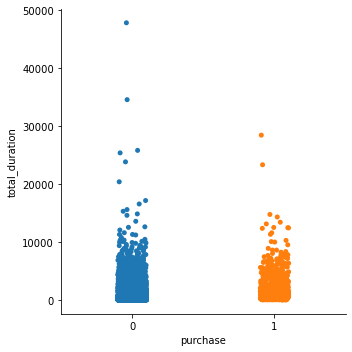

In [144]:
# Printing scatter of feature group vs purchase
## Find function for putting all graphs together like above
def printpurchasescatter(featuregroup, train = train,) -> None:
    for i in featuregroup:
        g = sns.catplot(data=train, x="purchase", y=i)
        plt.show()

printpurchasescatter(numdur[:-1])

##### Conclusion from purchase scatter plots:
From the scatter plots we can see that at very high values there are higher densitys of purchase = 0.

In [145]:
corr = train[numdur].corr()
corr.style.background_gradient(cmap='coolwarm')

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,purchase
num_of_admin_pages,1.000000,0.591505,0.383974,0.254367,0.436619,0.373130,0.447180,0.145048
admin_page_duration,0.591505,1.000000,0.297256,0.242246,0.291797,0.372102,0.445325,0.097504
num_of_info_pages,0.383974,0.297256,1.000000,0.632028,0.382615,0.398101,0.489927,0.095563
info_page_duration,0.254367,0.242246,0.632028,1.000000,0.276376,0.359926,0.410491,0.070309
num_of_product_pages,0.436619,0.291797,0.382615,0.276376,1.000000,0.860769,0.877881,0.157167
product_page_duration,0.373130,0.372102,0.398101,0.359926,0.860769,1.000000,0.994425,0.152133
total_duration,0.447180,0.445325,0.489927,0.410491,0.877881,0.994425,1.000000,0.145429
purchase,0.145048,0.097504,0.095563,0.070309,0.157167,0.152133,0.145429,1.000000


##### Conclusions from correlation matrix
At first, the big conclusion from the correletion matrix is that every two features of num & duration with a related page type have high correlation with each other. This makes sense because if a person scrolls through more pages, he will usually also spend more time on those pages and vis versa.<br>
In addition, another interesting observation is that there is a high correlation between product pages and duration, and total duration. This meaning that most people surfing the website, spend most of their time on product pages. Also we can understand that the total duration is just the sum of all the other features, so we can think about removing it later.

### Preprocessing

#### Outlier removal:
Due to the high correlation we explained above, we decided to use these correlations to remove outliers.<br>
The blue dots represent the samples we decided to delete.<br>
When choosing the edges we tried to delete as less as we can.

The amount of samples that were removed: 36


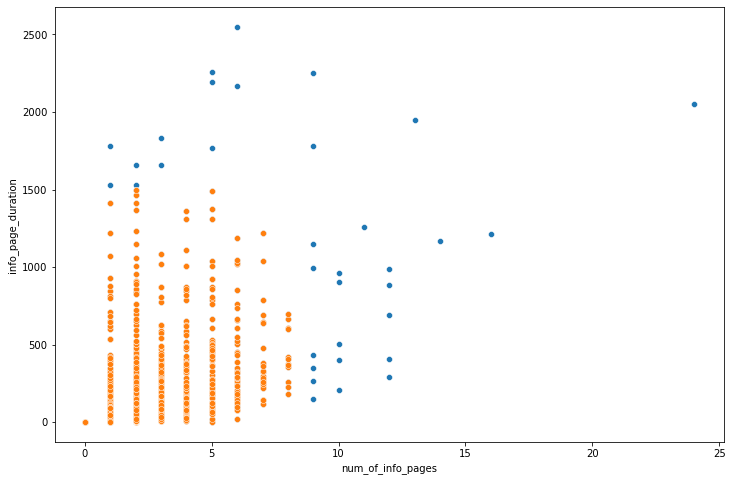

In [146]:
before = train.shape[0]
sns.scatterplot(data = train, x="num_of_info_pages", y="info_page_duration")
# we will try to remove the outliers duration > 1500, num_pages > 8
train = train.drop(train[(train["info_page_duration"]>1500) | (train["num_of_info_pages"]>8)].index)
sns.scatterplot(data = train, x="num_of_info_pages", y="info_page_duration")
print("The amount of samples that were removed: {}".format(before-train.shape[0]))

The amount of samples that were removed: 25


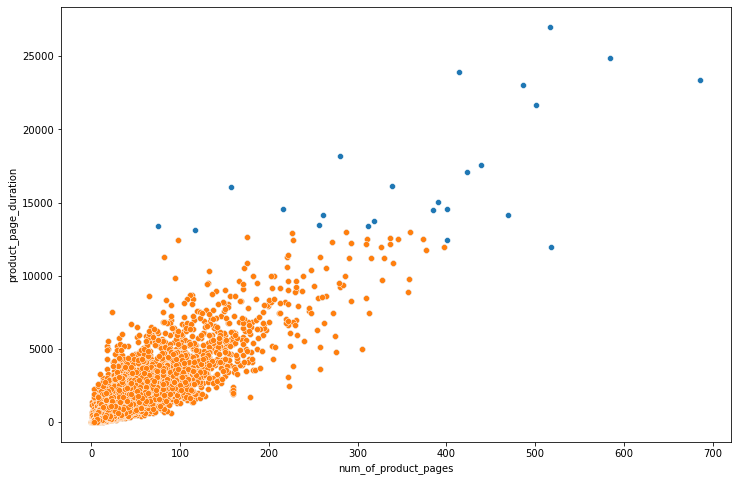

In [147]:
before = train.shape[0]
sns.scatterplot(data = train, x="num_of_product_pages", y="product_page_duration")
# we will try to remove the outliers duration > 13000, num_pages > 400
train = train.drop(train[(train["product_page_duration"]>13000) | (train["num_of_product_pages"]>400)].index)
sns.scatterplot(data = train, x="num_of_product_pages", y="product_page_duration")
print("The amount of samples that were removed: {}".format(before-train.shape[0]))

The amount of samples that were removed: 81


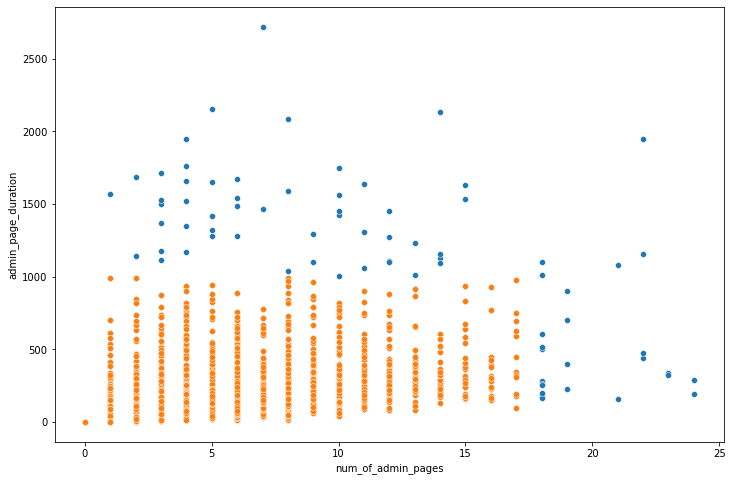

In [148]:
before = train.shape[0]
sns.scatterplot(data=train, x="num_of_admin_pages", y="admin_page_duration")
train = train.drop(train[(train["admin_page_duration"]>1000) | (train["num_of_admin_pages"]>17)].index)
sns.scatterplot(data=train, x="num_of_admin_pages", y="admin_page_duration")
print("The amount of samples that were removed: {}".format(before-train.shape[0]))

#### Normalization
It is easy to see that the values aren't normalized. The number of pages are in low numbers(up to 700), while the duration reaches high numbers (up to 25000) and so we will normalize between 0 and 1 using MinMaxScaler.

In [149]:
scaler = MinMaxScaler()
train[numdur[:-1]] = scaler.fit_transform(train[numdur[:-1]])
test[numdur[:-1]] = scaler.transform(test[numdur[:-1]])

#### Filling missing values


In [150]:
NA_table(train[numdur[:-1]])

,Count NA,%
total_duration,4682,45.29
num_of_info_pages,674,6.52
product_page_duration,610,5.90
num_of_admin_pages,596,5.77
admin_page_duration,413,4.00
num_of_product_pages,398,3.85
info_page_duration,311,3.01


Due to the high correlation between the features we decided to fill using KNN<br>
In our Exploration we saw that feature 'total_duration' has high correlation with 'product_page_duration', and now we can see that it contains 45% missing values. Therefore, we will delete this feature.

In [151]:
# Delete total duration
numdur.remove('total_duration')
del train['total_duration']
del test['total_duration']

In [152]:
# Implementing by KNN Train & Test - Option 1
train[numdur] = knn_nan(train[numdur])

#Implementing By median for Test
test = fill_test_by_median(train[numdur[:-1]],test)

#### Conclusions
- We removed in total *142* samples.<br>
- We filled the NA with: *Knn_Imputer*<br>
- We normalized them with: *MinMaxScaler*<br>
- We decided to *remove the total_duration* feature because it has high correlation and its meaning.



### Sub-Group: Rates

### Exploration

array([[<AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>],
       [<AxesSubplot:title={'center':'ExitRates'}>, <AxesSubplot:>]],
      dtype=object)

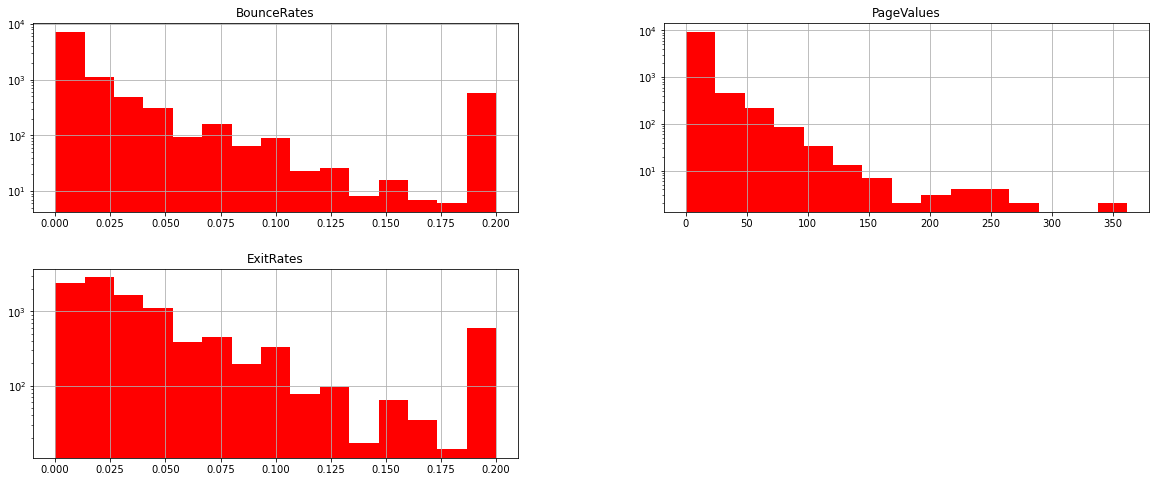

In [153]:
#histograms
train[rates[:-1]].hist(figsize = (20,8), bins=15, log=True, color = 'r')


##### Conclusion from distributions:
The distribution looks like exponential distribution, but we can see that there are many values in the edges too (value=0.2)

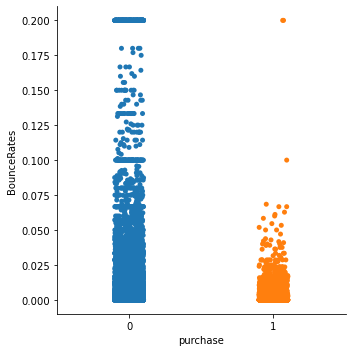

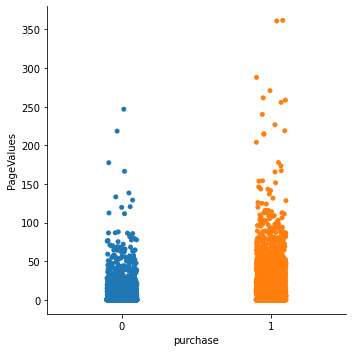

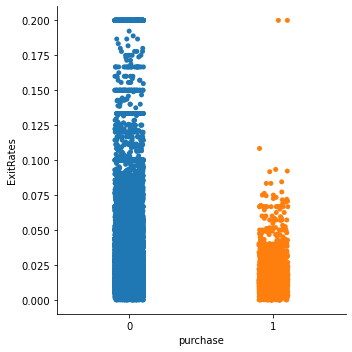

In [154]:
# Printing scatter of feature group vs purchase
printpurchasescatter(rates[:-1])

##### Conclusion from scatter plots:
If we look at the distribution seperately when purchase equal 0 or 1, we can see that there are some differences:<br>
    - BounceRates and ExitRates tend to be with higher values when purchase=0.<br>
    - The opposite happends when we are looking at PageValues. This makes sense because PageValues rate is higher when the page is likely to lead to a purchase.

In [155]:
corr = train[rates].corr()
corr.style.background_gradient(cmap='coolwarm')

,BounceRates,PageValues,ExitRates,purchase
BounceRates,1.000000,-0.117183,0.911790,-0.150782
PageValues,-0.117183,1.000000,-0.173093,0.491978
ExitRates,0.911790,-0.173093,1.000000,-0.208133
purchase,-0.150782,0.491978,-0.208133,1.000000


##### Correlation Matrix conclusions
1. It is not surprising that PageValues are positively correlated with Purchases, since the PageValue gets its score from the probability that one buys during a visit to a website.
2. There is a high correlation between BounceRates and ExitRates.
3. We can see from the correlation of both (Bounce and Exit) with Purchase that it is negative. In bounce rate it makes sense. In the case of exit pages, we believe that the majority of exit pages with high values are not the purchase pages, therefore there is a negative correlation.


### Preprocessing

#### Removing Outliers:
Due to the Exploration we did above, we will try to "fit" our data to the real meaning of each feature.<br>
Therefore, we will remove outliers from each feature in a way that will help our models to differentiate between 0 and 1:
- Pagevalues -> we'll remove higher values when purchase=0
- Exitrates & Bouncerates -> we'll remove higher values when purchase=1

The amount of samples that were removed: 10


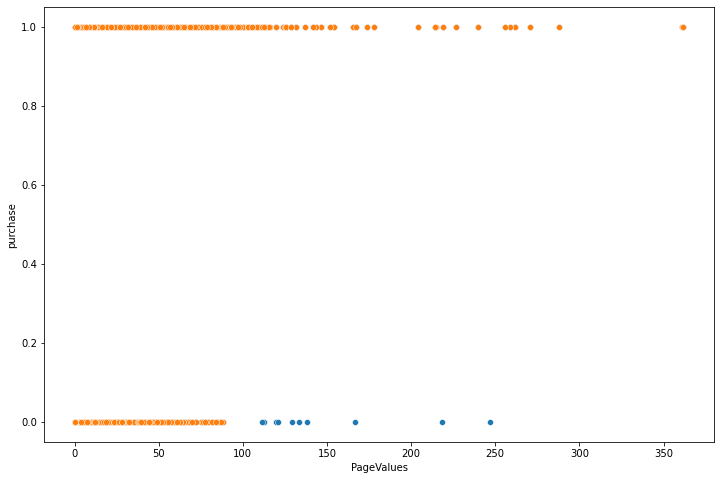

In [156]:
before = train.shape[0]
sns.scatterplot(data=train, x="PageValues", y="purchase")
train = train.drop(train[(train["PageValues"]>100) & (train["purchase"] == 0)].index)
sns.scatterplot(data=train, x="PageValues", y="purchase")
print("The amount of samples that were removed: {}".format(before-train.shape[0]))

The amount of samples that were removed: 9


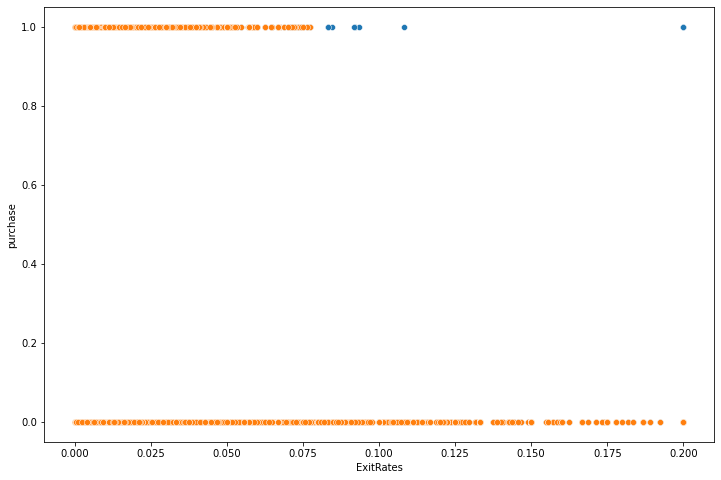

In [157]:
before = train.shape[0]
sns.scatterplot(data=train, x="ExitRates", y="purchase")
train = train.drop(train[(train["ExitRates"]>0.08) & (train["purchase"] == 1)].index)
sns.scatterplot(data=train, x="ExitRates", y="purchase")
print("The amount of samples that were removed: {}".format(before-train.shape[0]))

The amount of samples that were removed: 0


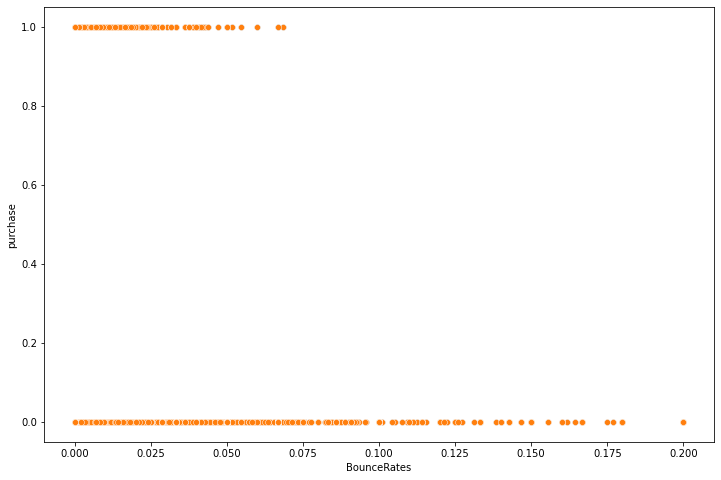

In [158]:
before = train.shape[0]
sns.scatterplot(data=train, x="BounceRates", y="purchase")
train = train.drop(train[(train["BounceRates"]>0.075) & (train["purchase"] == 1)].index)
sns.scatterplot(data=train, x="BounceRates", y="purchase")
print("The amount of samples that were removed: {}".format(before-train.shape[0]))

### Normalization
We can see that the max values in Exitrates and BounceRates is 0.2- so although they are already between 0 and 1, they are not yet normalized. In PageValues the max is ~350. We will normalize them between 0 and 1.

In [159]:
scaler = MinMaxScaler()
train[rates[:-1]] = scaler.fit_transform(train[rates[:-1]])
test[rates[:-1]] = scaler.transform(test[rates[:-1]])

#### Filling missing values
Due to the high correlation between exit and bounce rates and pagevalues with purchase we decided to fill the values using KNN<br>

In [160]:
NA_table(train[rates[:-1]])

,Count NA,%
PageValues,27,0.26
ExitRates,25,0.24
BounceRates,21,0.20


In [161]:
# Implementing by KNN Train & Test
train[rates] = knn_nan(train[rates])

#Implementing By median for Test
test = fill_test_by_median(train[rates[:-1]],test)

#### Conclusions
- We removed in total *19* samples.<br>
- We filled the NA with: *Knn_Imputer*<br>
- We normalized them with: *MinMaxScaler*<br>
- We decided to keep both Exit & Bounce rates despite the high correlation between them.


### Sub-Group: Othernum

### Exploration

array([[<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

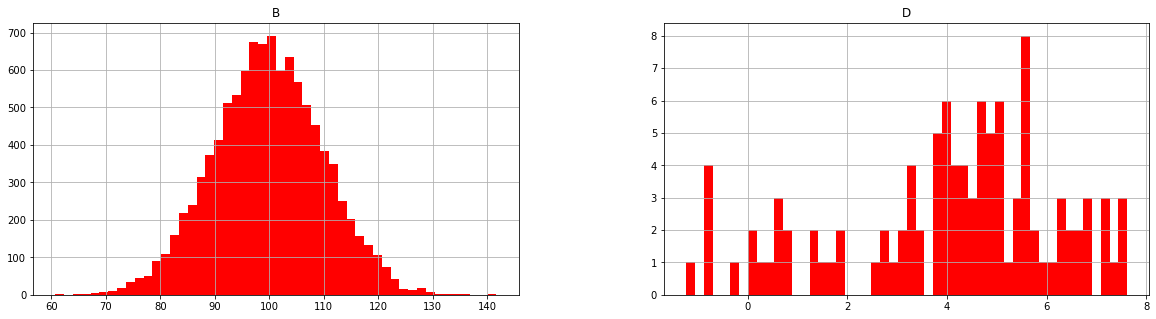

In [162]:
#histograms
train[othernum[:-1]].hist(figsize = (20,5), bins=50, color = 'r')


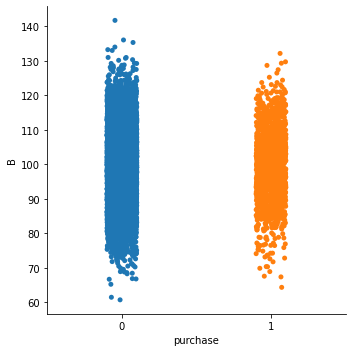

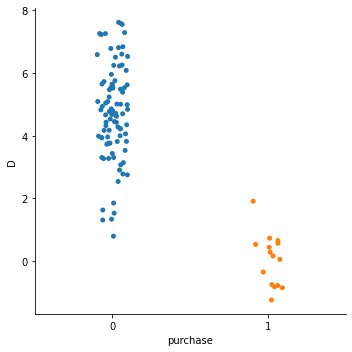

In [163]:
# Printing scatter of feature group vs purchase

printpurchasescatter(othernum[:-1])

##### Conclusion from distributions:
1. We can see that feature 'B' has a normal distribution.
2. From the dotplot of 'D' we can see the diffrence between values where purchase equals 0 or 1.

In [164]:
corr = train[othernum].corr()
corr.style.background_gradient(cmap='coolwarm')

,B,D,purchase
B,1.000000,0.044784,-0.003937
D,0.044784,1.000000,-0.753238
purchase,-0.003937,-0.753238,1.000000


##### Correlation Matrix conclusions
We can see that there is a very high negative correlation between feature 'D' and 'purchase'.


### Preprocessing

#### Facing with outliers cells:
1. As we saw the 'B' column has normal distribution, therefore we'll remove outliers from the edges.
2. Due to the fact feature 'D' has a lot of missing values, we decided to leave it as it is for now.


In [165]:
before = train.shape[0]
mean, std = train['B'].mean(), train['B'].std()
train = train.drop(train[train['B'] > (mean + (2.8 * std))].index)
train = train.drop(train[train['B'] < (mean - (2.8* std))].index)
print("The amount of samples that were removed: {}".format(before-train.shape[0]))

The amount of samples that were removed: 54


### Normalization

In column 'B' we will normalize the values with StandardScaler- making B a standardized normal distribution.<br>
We will discuss D later.

In [166]:
# B
scaler = StandardScaler()
train[['B']] = scaler.fit_transform(train[['B']])
test[['B']] = scaler.transform(test[['B']])

#### Filling missing values


In [167]:
NA_table(train[othernum[:-1]])

,Count NA,%
D,10159,98.98
B,23,0.22


Here we can see that 99% of the values of column 'D' are missing. <br>
During our iterations of the project, we contemplated a lot about the right thing to do. We got to the conclusion that although it is tempting to use D with KNN because of it's high correlation with 'purchase'- it is incorrect. With 99% missing values on the train set, there is a good chance that most of the real world samples are also Nan, and for them we cannot use KNN imputation- so they will be filled with the median. If 99% of test samples are Nan filled with the median, and our model bases itself off of D, then the difference between our model predictions and test labels will be enormous.<br>

We tried several other options instead of filling test 'D' with the median:
1. Connecting test sample by sample to train and running knn in order to fill test Nans. Although this could be ideal for fixing the problem, we saw that this process is very long and wouldn't run in an hour.
2. Using the Sklearn Iterative Imputure which fits relationships between data features and fills Nan in that way- but we found that this method didn't improve our models.-*Code Example in Report*

In conclusion, we chose to delete 'D' from our dataset.

In [168]:
# Deleting D:
del train['D']
del test['D']

We chose to fill B with mean. Because it is normally distributed- most of its values are around the mean. Furthermore, there are very few Nans in B.

In [169]:
# Implementing by mean Train for column 'B'
train, test = fill_average(train, test, 'B')

#### Conclusions
- We removed in total *54* samples.<br>
- We filled the NA with:*Mean*<br>
- We normalized them with:*MinMaxScaler*<br>
- We decided to remove column 'D'


# Categorical

### Exploration & Preprocessing Introduction
For each Category we would like to explore the categorical values and then make preprocessing actions.<br>
For Exploration we will use for each category:<br> 
1. Barplots to see distribution of purchase == 1/0, with percentages of purchase == 1 for each value
2. Pie plot to understand differences in amounts of each value, and a table that counts normalized amonts of the different values.
3. If necessary, other relevant vizualizations per category.

For the preprocessing action we use helper functions, and we will give attention to:<br>
1. Handling values with small quantities/ merging similar categorical values
2. Filling missing values (NA)

##### Handling small quantity values and dealing with the curse of dimensionality 
Why should we handle values with small quantities and merge similar categoric values ? <br>
The solution to deal with categorical values so that the ML models will be able to use them will be to turn them into binary labeled features. <br>
Alongside that, as we have learned in class, a factor we always need to keep in mind is the curse of dimensionality.<br>
The more features we have, the more variance we will have in the model, and the bigger the chances of overfitting. <br>
Because of this reason, we want to "save" as much variance and overfitting from the model as possible. <br>
We will do this by taking categorical values that are of small quantity and their possible binary coded column will be mainly 0, and merge them with other columns. <br>
For each category, we will describe the way we will merge- which will be by our exploration and understanding of the data.

##### The options we have are:<br>
1. Merging small quantity groups.
2. Merging Groups that are similar to our understanding.

For each category we created functions for possible ways of Merging categoric values, and changed them througout the models iterations to find the best possible models.



##### Filling NULL cells:
Ahead we will have several options to decide how we want to fill our NA values. Every time we will try to understand what is the best option for a specific group of features.<br>


##### The options we have are:<br>
1. Remove the whole Category.
2. Fill by most common value in a specific feature.
3. Delete Nan samples
4. Creating Nan represetative value in category
5. Finding logic in data to fill value

For each category we created functions for possible ways of filling Nans with the options we had at hand, and changed them througout the models iterations to find the best possible models.<br>

#### Functions:

In [170]:
# One hot encoder:
def onehotcat(df, col):
    encoder = ce.OneHotEncoder(cols = col, handle_unknown= 'return_nan', return_df= True, use_cat_names=True)
    df = encoder.fit_transform(df)
    return df

# Showing distribution of device, region, and holiday
def deviceregiholidaydistribution(train = train):
    train["device"] = train["device"].astype(float)
    train["Region"] = train["Region"].astype(float)
    train["closeness_to_holiday"] = train["closeness_to_holiday"].astype(float)
    train[['device', 'Region', 'closeness_to_holiday']].hist(figsize = (20,10), bins = 10, color = 'r')
    train["device"] = train["device"].astype(object)
    train["Region"] = train["Region"].astype(object)
    train["closeness_to_holiday"] = train["closeness_to_holiday"].astype(object)

#Function for finding percentage of purchases == 1
def getpercentage(f,f1,df):
    print("Precentage of '1' in each type:")
    r = f1.unique()
    for i in r:
        if pd.isnull(i): continue
        buy = df[(df[f]== i) & (df['purchase']== 1)]['purchase'].count()
        tot = df[(df[f]== i)]['purchase'].count()
        returning = np.round((buy/tot)*100, decimals=2)
        print( i ," = ", returning, "%")

## Function for categoric graphs
def catopener(col, train = train):
    plt.figure(figsize = (40,20))
    A = sns.countplot( y = col, hue = 'purchase', data = train, order = train[col].value_counts().index).set(title = col)
    plt.show()
    print("\nNormalized Value Counts:")
    print(train[col].value_counts(normalize =True))
    plot = train[col].value_counts().plot.pie(figsize=(5, 5))
    plt.show()

#Cat opener with x axis plots
def catopenerx(col, train = train):
    plt.figure(figsize = (40,20))
    A = sns.countplot( x = col, hue = 'purchase', data = train, order = train[col].value_counts().index).set(title = col)
    plt.show()
    print("\nNormalized Value Counts:")
    print(train[col].value_counts(normalize =True))
    plot = train[col].value_counts().plot.pie(figsize=(5, 5))
    plt.show()
 # Browser opener
def catopenerbrowser(col, train = train):
    plt.figure(figsize = (40,20))
    A = sns.countplot( y = col, hue = 'purchase', data = train, order = train[col].value_counts().index).set(title = col)
    plt.show()
    plot = train[col].value_counts().plot.pie(figsize=(5, 5))
    plt.show()
 # A opener
def catopenerA(col, train = train):
    plt.figure(figsize = (40,20))
    A = sns.countplot( y = col, hue = 'purchase', data = train, order = train[col].value_counts().index).set(title = col)
    plt.show()
# Holiday opener
def holidaymonthplot(col, hue, train = train):
    plt.figure(figsize = (30,10))
    sns.countplot(x= col, hue = hue, data = train, order = train[col].value_counts().index).set(title = col)
    plt.show()

#Merge/ small quantity variables:
# Change small quantity value to most popular value
def smallvariabletomostpopulartraintest(col, switchcol, train =train, test = test):
    val = train[col].mode()[0]
    train[col] = train[col].replace([switchcol], val)
    test[col] = test[col].replace([switchcol], val)
    return train, test

#Nan:
# Fill column with most common value:
def fill_most_common_value_cat_train_test (col, df =train, test = test):
    val = df[col].mode()[0]
    df[col].fillna(val, inplace = True)
    test[col].fillna(val, inplace = True)
    return df, test
# Delete rows:
def remove_missing_values (df, col):# removing rows with missing values from the data
    df = df.dropna(subset=col)
    return df

# New group for Nans:
def newgroupnantraintest(col, train= train, test=test):
    train[col] = train[col].fillna("NA")
    test[col] = test[col].fillna("NA")
    return train, test

#Specific handling browsers:
def handlebrowsernantraintest(col= 'internet_browser', train= train, test=test):
    mask1 = train.internet_browser.isna()
    mask2 =train['device'] == 1.0
    train['internet_browser'] = np.where(mask1& mask2, 'safari', train['internet_browser'])
    m1test = test.internet_browser.isna()
    m2test =test['device'] == 1.0
    test['internet_browser'] = np.where(m1test& m2test, 'safari', test['internet_browser'])
    train[col] = train[col].fillna("chrome")
    test[col] = test[col].fillna("chrome")
    return train, test
# Device nan
def handledevicenantraintest(col= 'device', train= train, test=test):
    mask1 = train.device.isna()
    mask2 =train['internet_browser'] == 'safari'
    train['device'] = np.where(mask1& mask2, 1.0, train['device'])
    m1test = test.device.isna()
    m2test =test['internet_browser'] == 'safari'
    test['device'] = np.where(m1test& m2test, 1.0, test['device'])
    train[col] = train[col].fillna(2.0)
    test[col] = test[col].fillna(2.0)
    return train, test
    

#plot with nans:
def plotnans(col, hue, train = train):
    df = train.copy()
    df[col] = df[col].fillna("NA")
    plt.figure(figsize = (30,10))
    sns.countplot(x= col, hue = hue, data = df, order = df[col].value_counts().index).set(title = col)
    plt.show()

def printnumericcatter(col, num, train = train) -> None:
    sns.scatterplot(data=train, x=col, y=num, hue ='purchase')
    plt.show()

In [171]:
# Hotcoding list:
tohotcode = []

## Categorical values overview- Overview table, relevant distributions, and null table

In [172]:
#Finding categorial features
all_cols =  train.columns
numeric = train.select_dtypes(include = [np.number]).columns
cat_cols = list(set(all_cols)-set(numeric))
#Categoric Data:
train[cat_cols]

,device,internet_browser,Weekend,user_type,Region,A,closeness_to_holiday,C,Month
id,,,,,,,,,
0,1.0,safari_15,False,Returning_Visitor,1.0,c_1,0.0,log202,Feb
1,4.0,safari_14,False,Returning_Visitor,9.0,c_3,0.0,log404,Feb
2,3.0,browser_3_v17,True,Returning_Visitor,1.0,c_4,0.0,log202,Feb
3,2.0,chrome_99.1.3,False,Returning_Visitor,1.0,c_3,0.0,log_100,Feb
4,2.0,edge_96.0.1054.75,False,Returning_Visitor,3.0,c_3,0.4,log202,Feb
...,...,...,...,...,...,...,...,...,...
10474,4.0,browser_6_v12,True,Returning_Visitor,1.0,c_1,0.0,log400,Dec
10475,3.0,chrome_98.0.1,True,Returning_Visitor,1.0,c_8,0.0,log202,Nov
10476,3.0,chrome_99.1.3,True,Returning_Visitor,1.0,c_13,0.0,log8080,Nov


As we can see in the above table, there are features which are obviously categorical- written in strings, and there are others which are written in float type, but in their essence are categorical- there is no meaning to the number they have except for the fact it labels them.
We will show them and their distributions in the below graph:

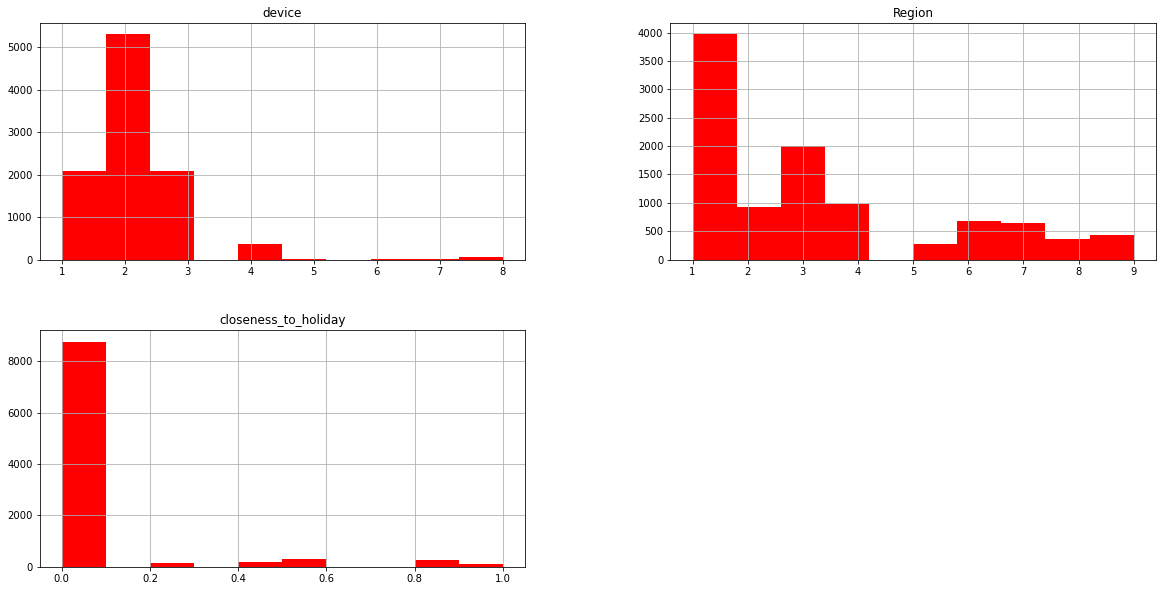

In [173]:
deviceregiholidaydistribution()

So as we can see, there are devices and regions which are more popular(mostly the lower numbered), but in thier essence the numbers in device and region are a makeshift replacement for string names (of devices and regions), because of this understanding- we decided to look at Region and device as categoric values. We chose to change closeness_to_holiday to categorical- because as can be seen most of the values are 0, and we believe there are manipulations we can make on the variable as categorical which will make it more relevant to the ML models. We will explain more in its chapter.

## Categorical Nulls:

In [174]:
NA_table(train[cat_cols])

,Count NA,%
A,695,6.77
internet_browser,550,5.36
closeness_to_holiday,488,4.75
device,318,3.10
Month,24,0.23
C,23,0.22
Weekend,22,0.21
user_type,22,0.21
Region,18,0.18


In A, internet_browser, and closeness_to_holiday, and device, there is a relatively high number of Nulls.

### User Type

### Exploration

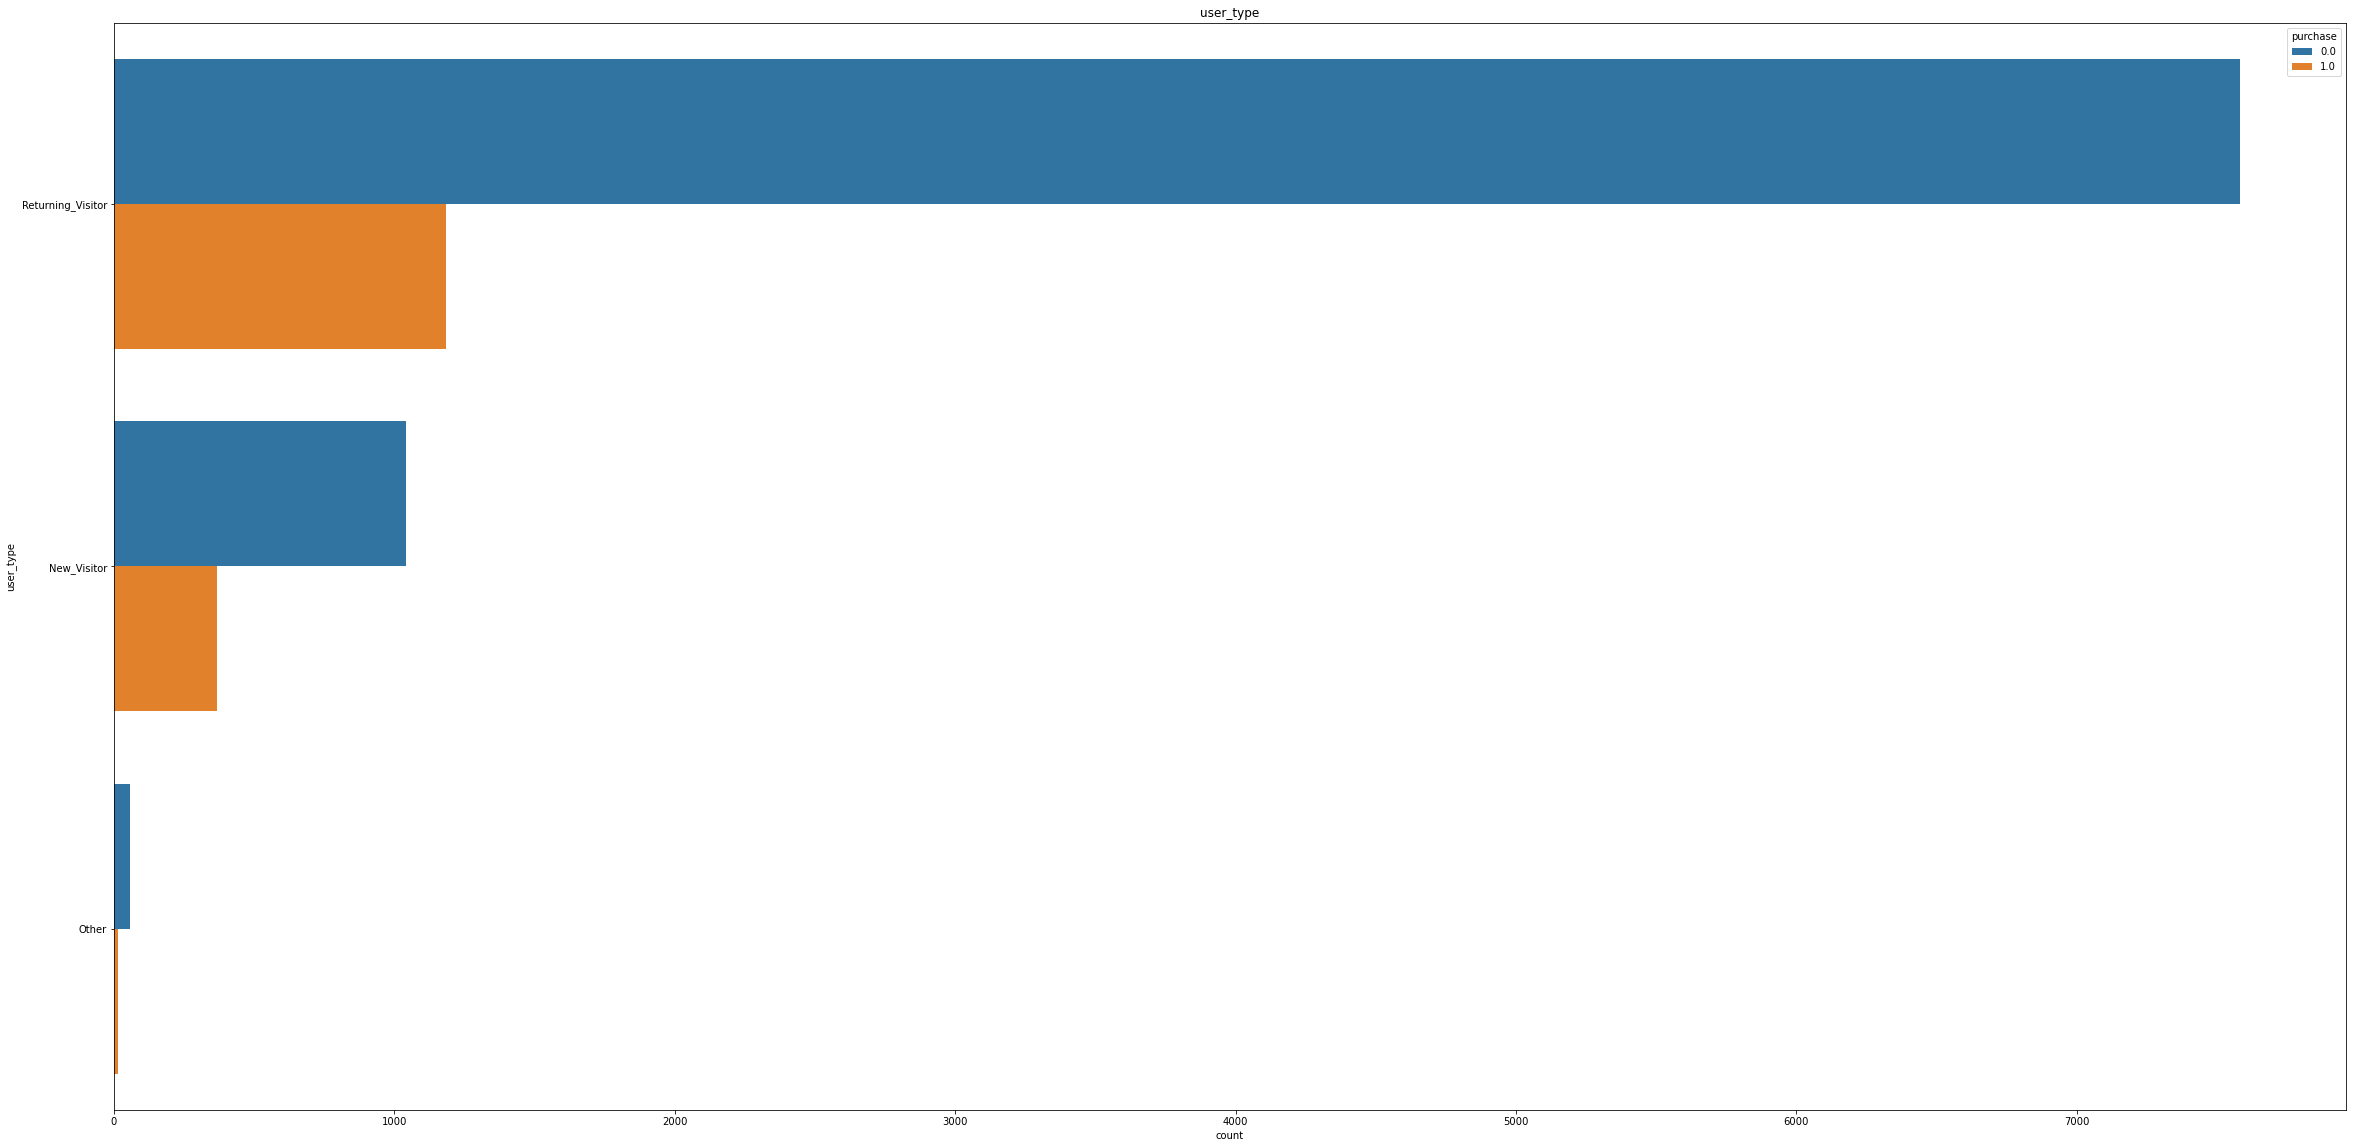


Normalized Value Counts:
Returning_Visitor    0.855692
New_Visitor          0.137376
Other                0.006932
Name: user_type, dtype: float64


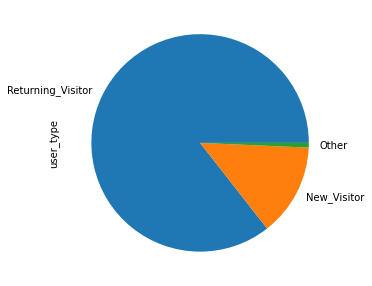

Precentage of '1' in each type:
Returning_Visitor  =  13.5 %
New_Visitor  =  26.01 %
Other  =  18.31 %


In [175]:
catopener('user_type')
getpercentage('user_type', train.user_type, train)

##### Conclusions from user type exlporization:
There are more returning visitors than new visitors, but the chance of new visitors to purchase is higher than the returning. Both of these datas make sense, as we would expect there to be more visitors that reaccuringly visit the site, and that new visitors that enter specifically to buy something they need would buy more. As to "other"- it consists of 0.06% of the data, and doesnt have a standout proportion of purchases making it almost irrelevant.

#### Handling small quantity Variables:

##### Others:

Others is a very small scaled categorical variable, as written above, and it doesnt seem to act similarly to either other values, so we will just turn it into the largest scale variable, expecting it not to have much effect.

In [176]:
train, test = smallvariabletomostpopulartraintest(col = 'user_type', switchcol = "Other")

#### NULLS:

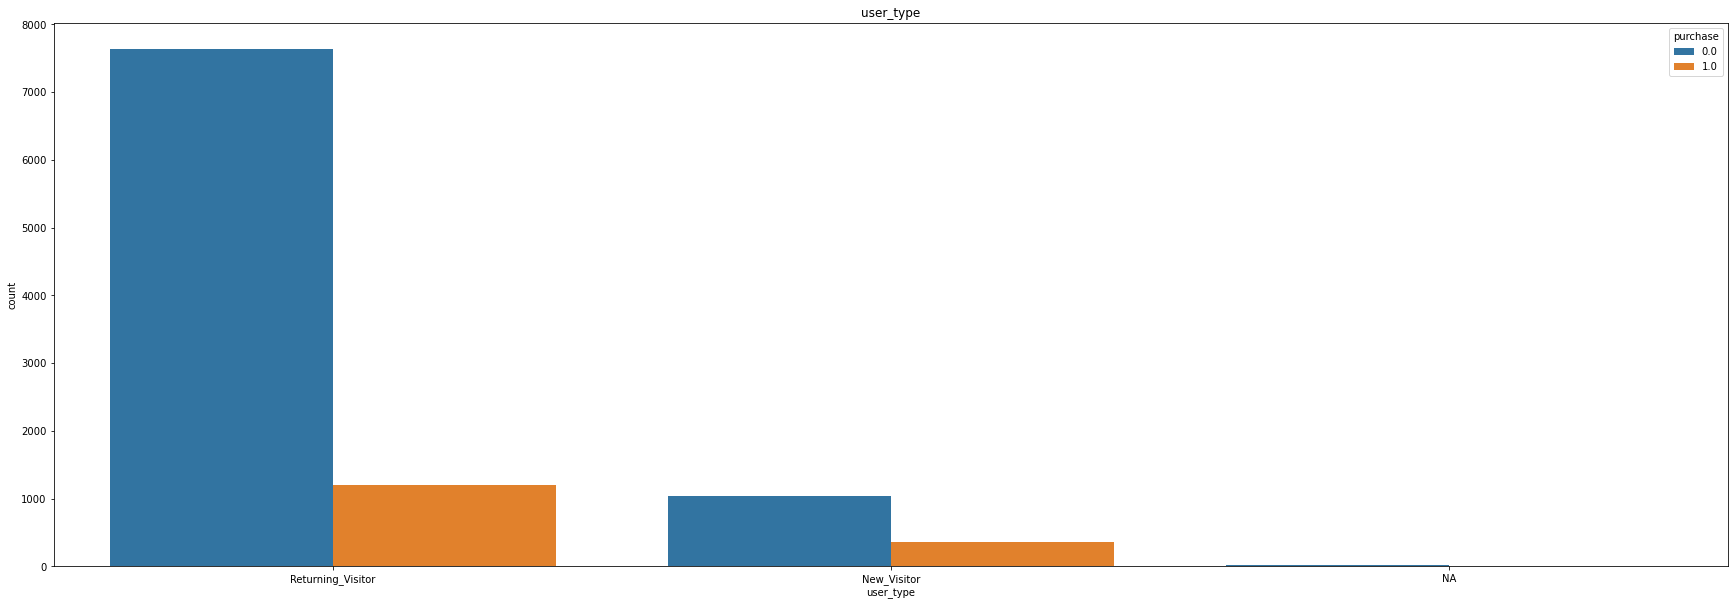

In [177]:
plotnans('user_type', 'purchase', train = train)

In [178]:
#Amount of nulls:
train['user_type'].isnull().sum()

22

There is a small amount of Nulls, and the most common value is most common by far, so we will fill them with the most common value.

In [179]:
train, test = fill_most_common_value_cat_train_test('user_type')

In [180]:
# Appending to hotcoding list
tohotcode.append('user_type')

### Internet Browsers

### Exploration

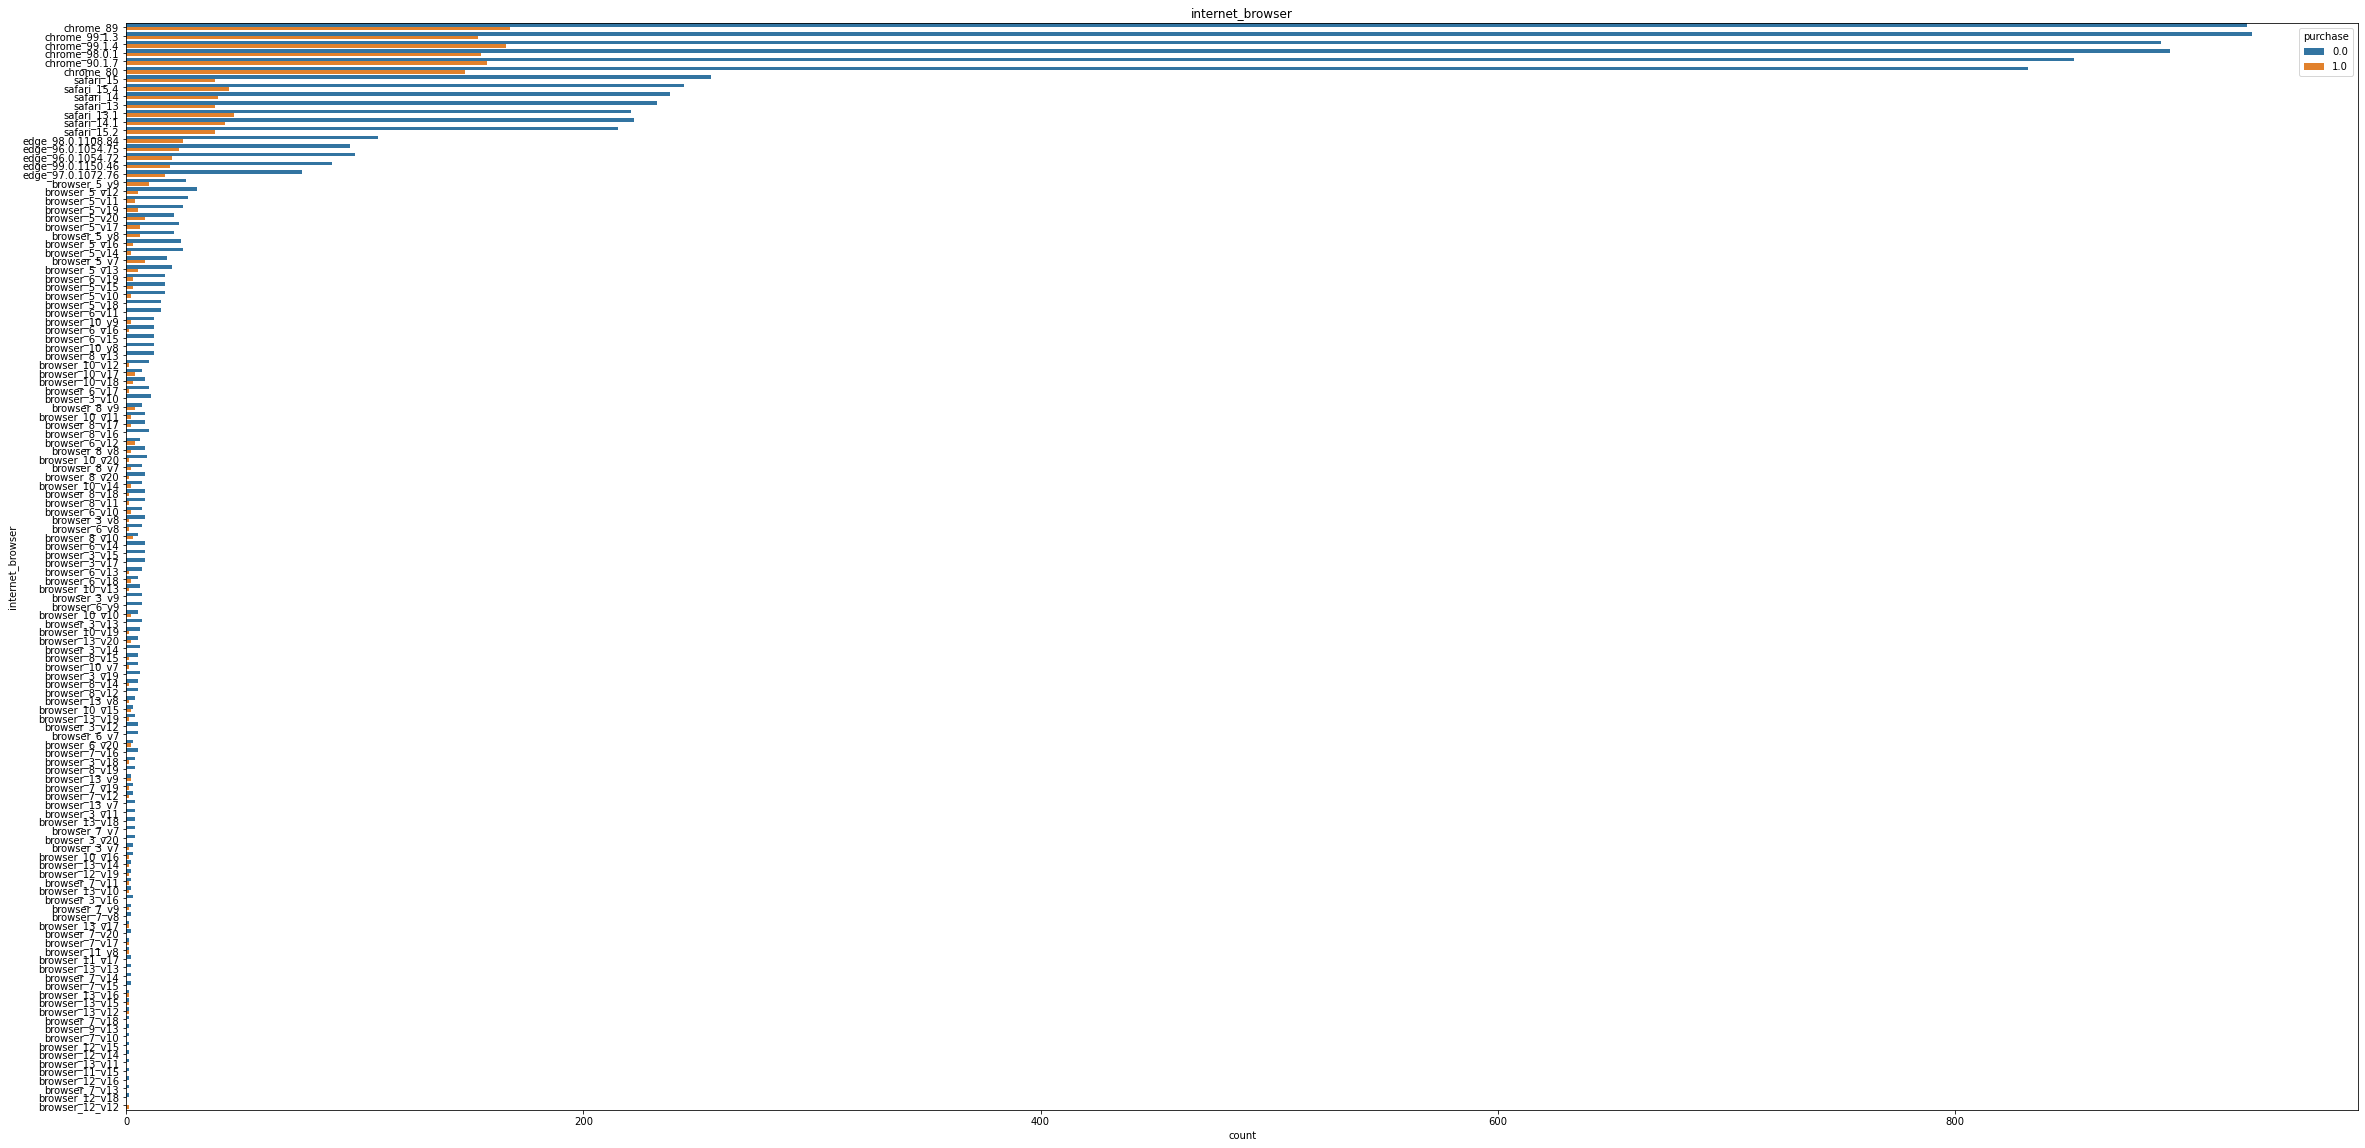

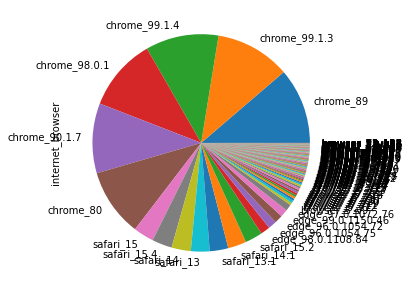

In [181]:
catopenerbrowser('internet_browser')

#### Conclusion:
 As we can see from the above graphs, there are several internet browsers that many people enter the website from, and many that few enter from (mainly "browser" browsers). We can also see that the amount of visitors and and the proportion of "purchases" are relatively grouped by browsers.

### Handling small quantity Variables:

#### Changing features to categorial columns - Explain all the options and what we decide:
 1. Combine only "browser" browser types
 2. Group all different browser types
#### We decided to implement the folowing:

 Group all different browser types



In [182]:
def mergeallbrowserstraintest(train = train, test = test, col = 'internet_browser'):
    newtrain = train[col].str.split("_", expand = True)
    newtest =  test[col].str.split("_", expand = True)
    return newtrain[0], newtest[0]


In [183]:
train['internet_browser'], test['internet_browser'] = mergeallbrowserstraintest()

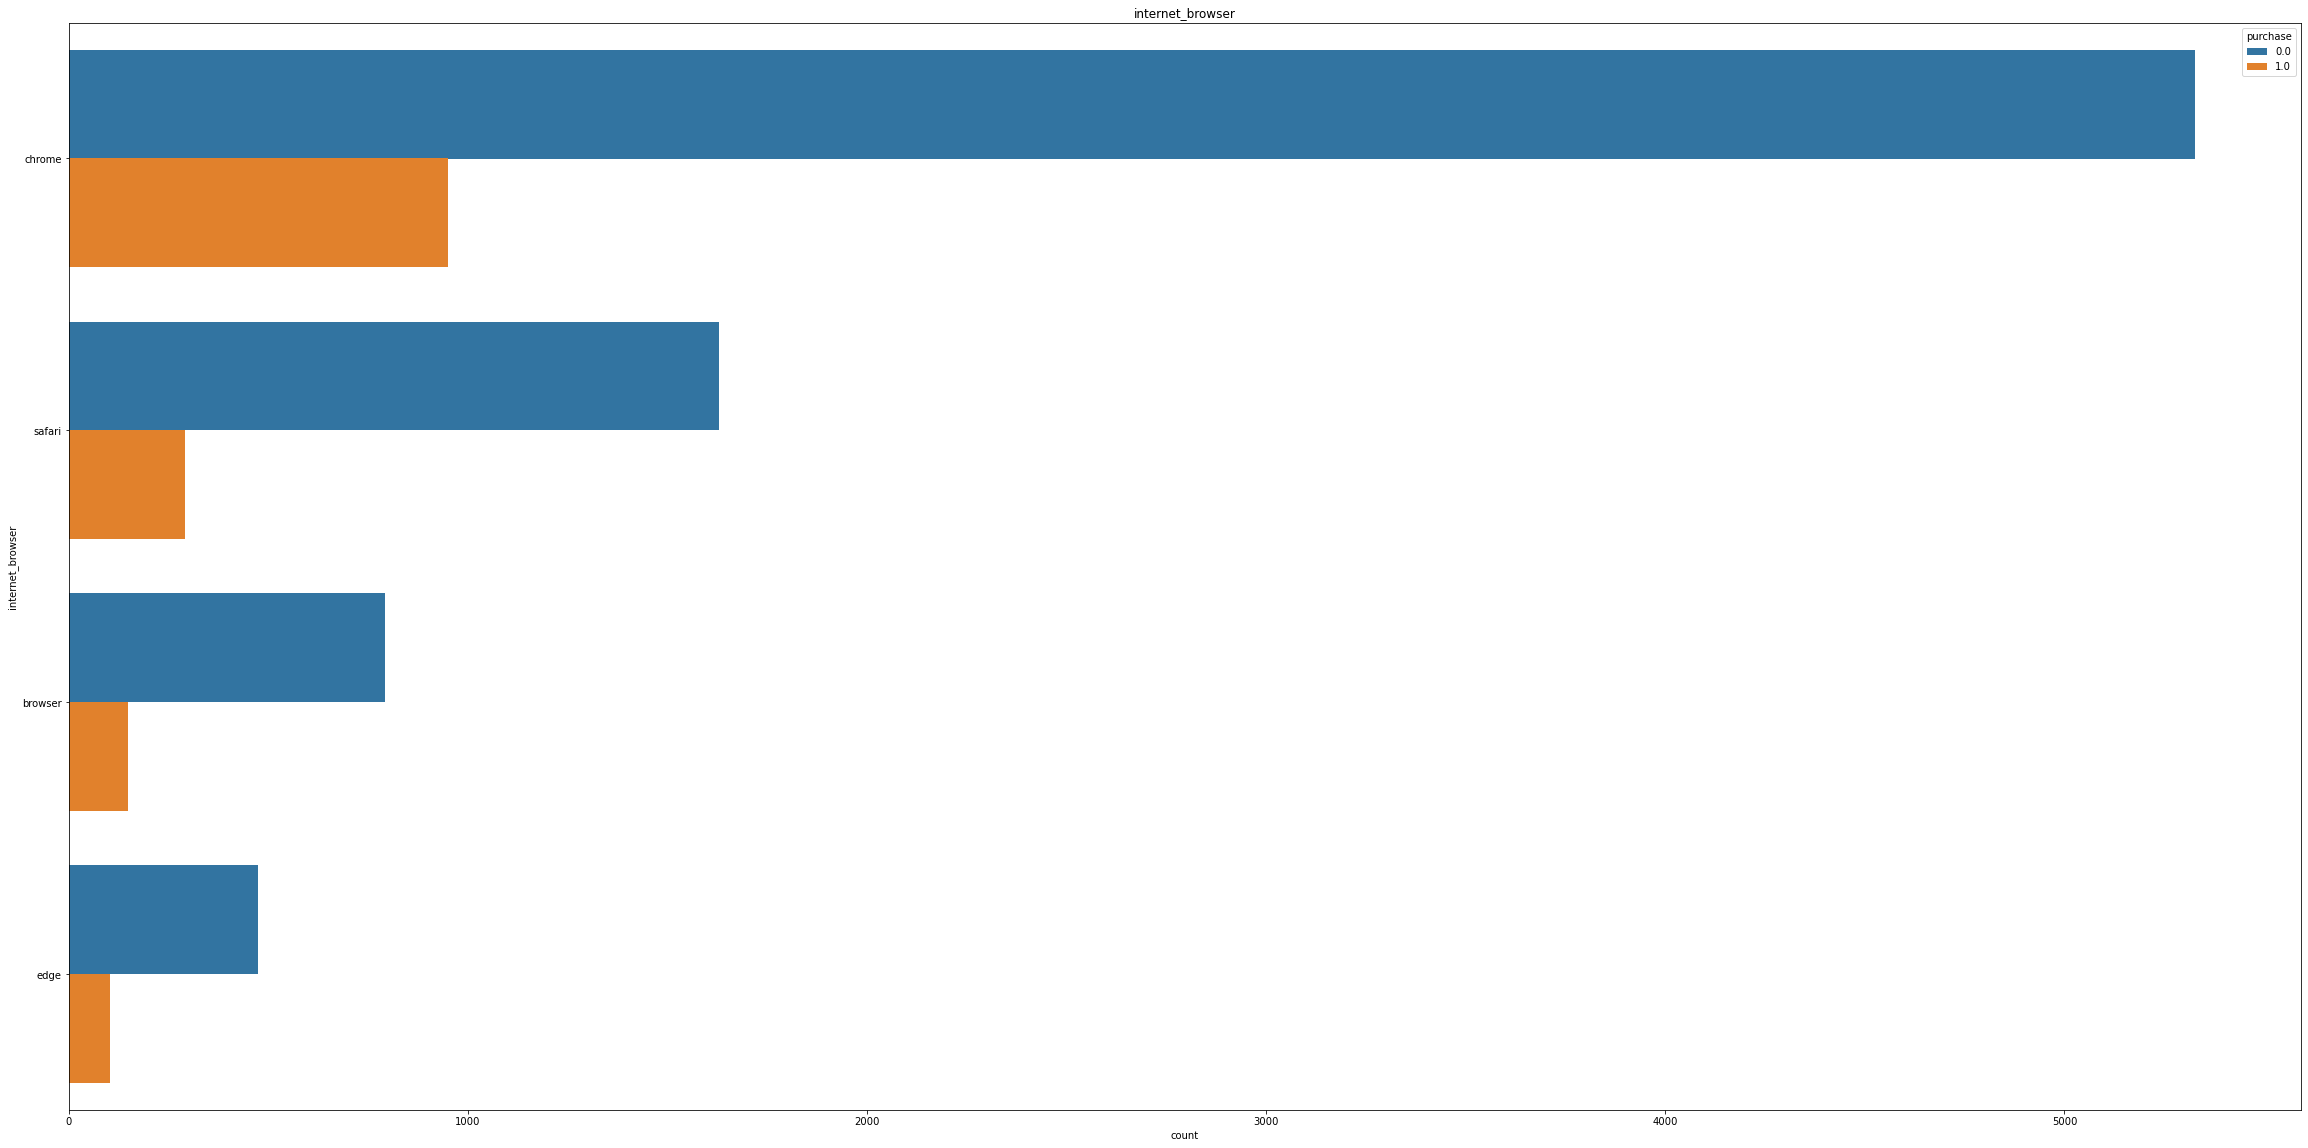


Normalized Value Counts:
chrome     0.645975
safari     0.197653
browser    0.096768
edge       0.059605
Name: internet_browser, dtype: float64


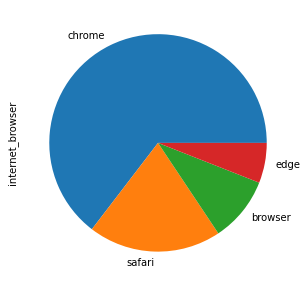

Precentage of '1' in each type:
safari  =  15.21 %
browser  =  15.74 %
chrome  =  15.12 %
edge  =  17.96 %


In [184]:
catopener('internet_browser')
getpercentage("internet_browser", train.internet_browser, train)

### NULLs

In [185]:
#Amount of nulls:
train['internet_browser'].isnull().sum()

550

### Filling Na: 
We have 550 Nans, which is  a large number- around 5 percent of the data. 
Options:
1. Fill with most common
2. Delete samples
3. Create new category


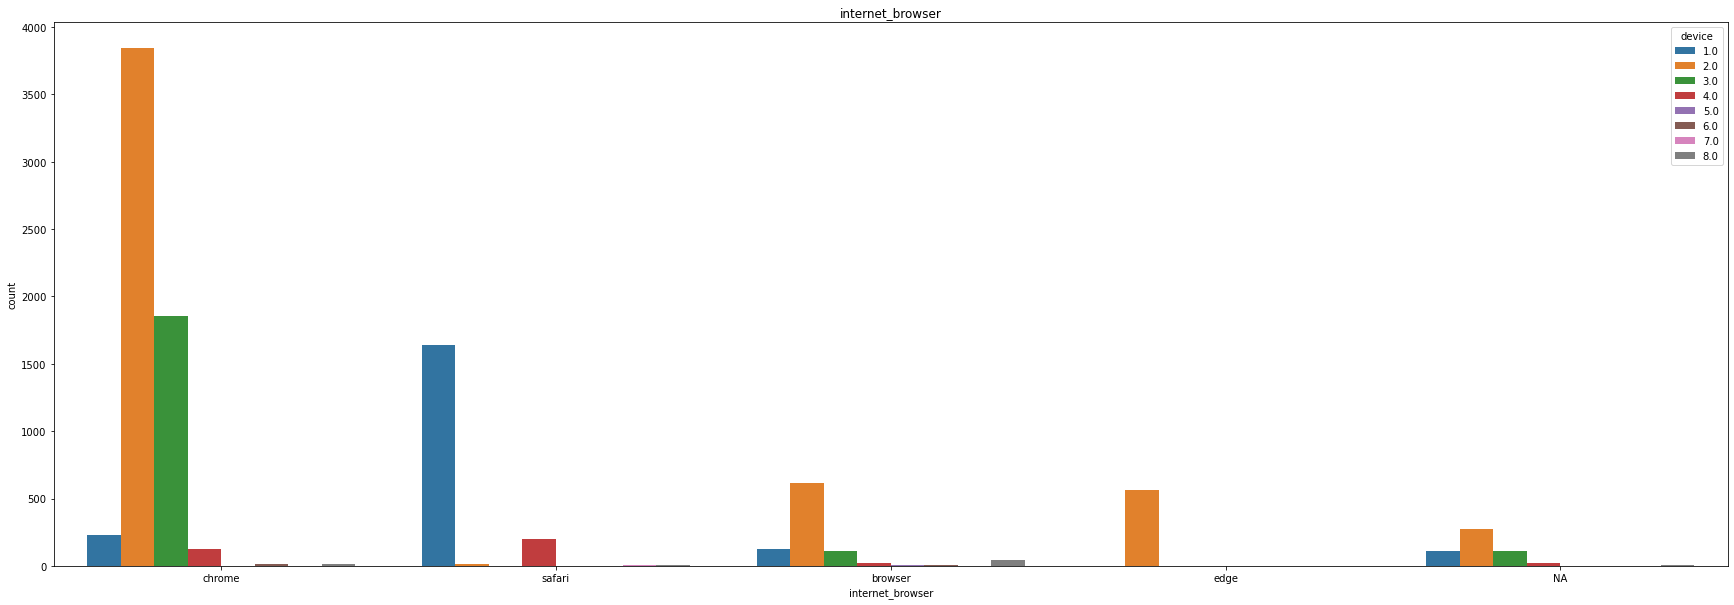

In [186]:
plotnans('internet_browser', 'device')


#### Conclusion:
We tried seeing if the Nans act in a specific way by comparing to devices, thinking it might be correlated. We can see that most of the 1.0 devices are of type safari, so we will put al Nans with device 1.0 as safari, and the rest as chrome.

In [187]:
train, test = handlebrowsernantraintest()
train['internet_browser'].isnull().sum()

0

In [188]:
# appending to hotcode list
tohotcode.append('internet_browser')

### Closeness to Holiday

### Exploration:

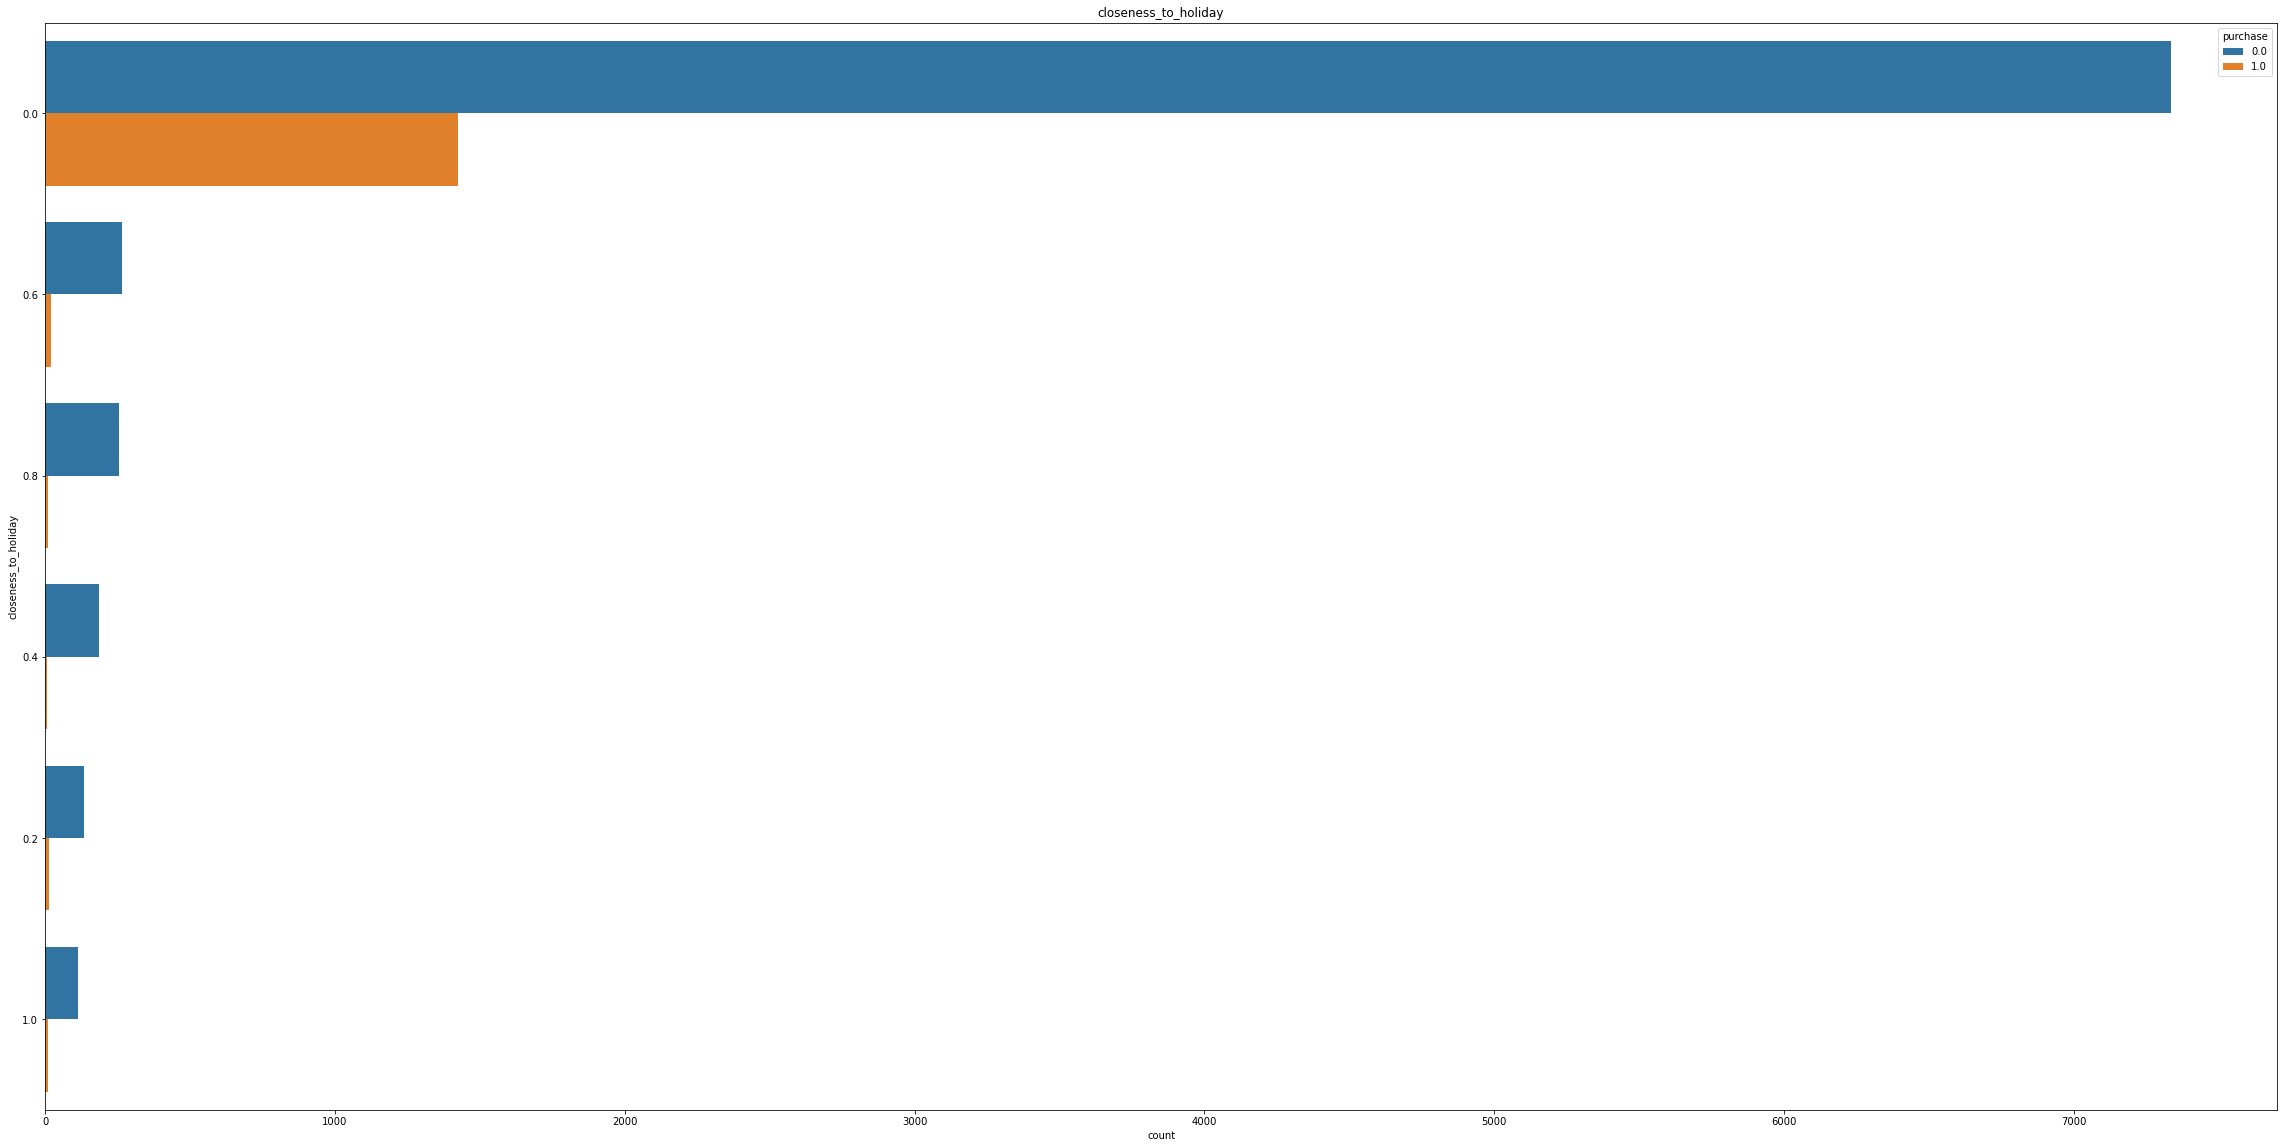


Normalized Value Counts:
0.0    0.896072
0.6    0.029460
0.8    0.027005
0.4    0.019947
0.2    0.014935
1.0    0.012582
Name: closeness_to_holiday, dtype: float64


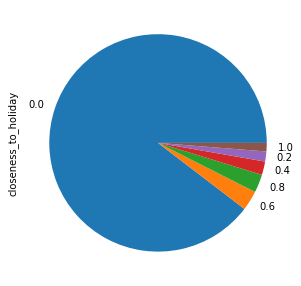

Precentage of '1' in each type:
0.0  =  16.27 %
0.4  =  4.1 %
0.8  =  3.41 %
1.0  =  7.32 %
0.6  =  7.64 %
0.2  =  8.9 %


In [189]:
catopener('closeness_to_holiday')
getpercentage('closeness_to_holiday', train.closeness_to_holiday, train)

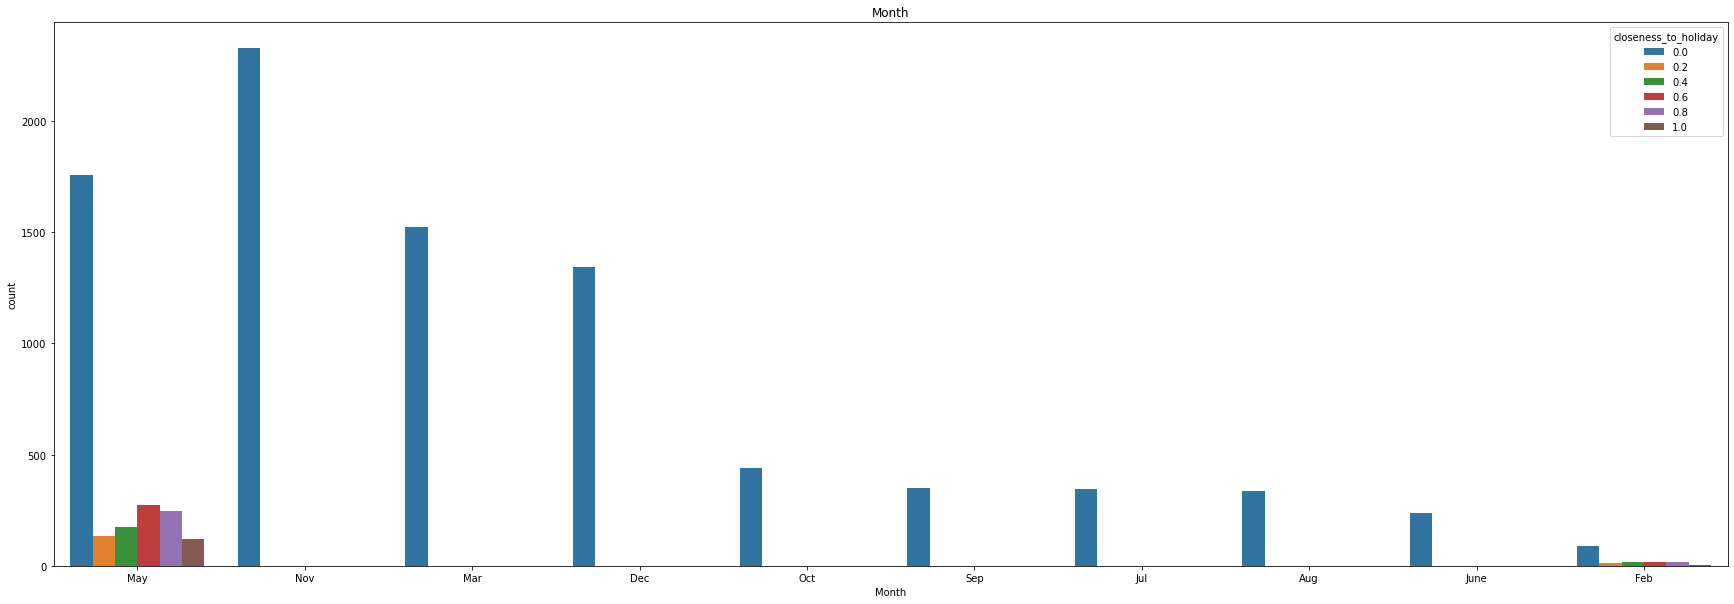

In [190]:
holidaymonthplot('Month', 'closeness_to_holiday')

#### Explaining each category:

As expected, most of the data is far away from the holidays (0.0). But what we can see that is interesting. is that all dates that are relatively close to the holidays- (0.2-1.0), are in may and february, and also on these dates there are significantly less buyers!



### Handling small quantity Variables:

 For the reasons written above, we have decided to turn this feature into a binary feature- close and far, with 1 being any number between 0.2 to 1.0, and 0 being 0.0.



In [191]:
def handlingholidaytraintest(train= train, test = test, col = "closeness_to_holiday"):
    ones = [0.2, 0.4, 0.6, 0.8, 1.0]
    zero = 0.0
    for i in ones:
        train[col] = train[col].replace([i], 1)
        test[col] = test[col].replace([i], 1)
    train[col] = train[col].replace([zero], 0)
    test[col] = test[col].replace([zero], 0)


In [192]:
handlingholidaytraintest()

### NULLs:

In [193]:
train['closeness_to_holiday'].isnull().sum()

488

Closeness to holiday has a fairly large amount of NULLs.<br>

Because 89 percent of the data is far from the holidays (0), we will assign all Nulls to this value.

In [194]:
train, test = fill_most_common_value_cat_train_test('closeness_to_holiday')

## Month

### Exploration:

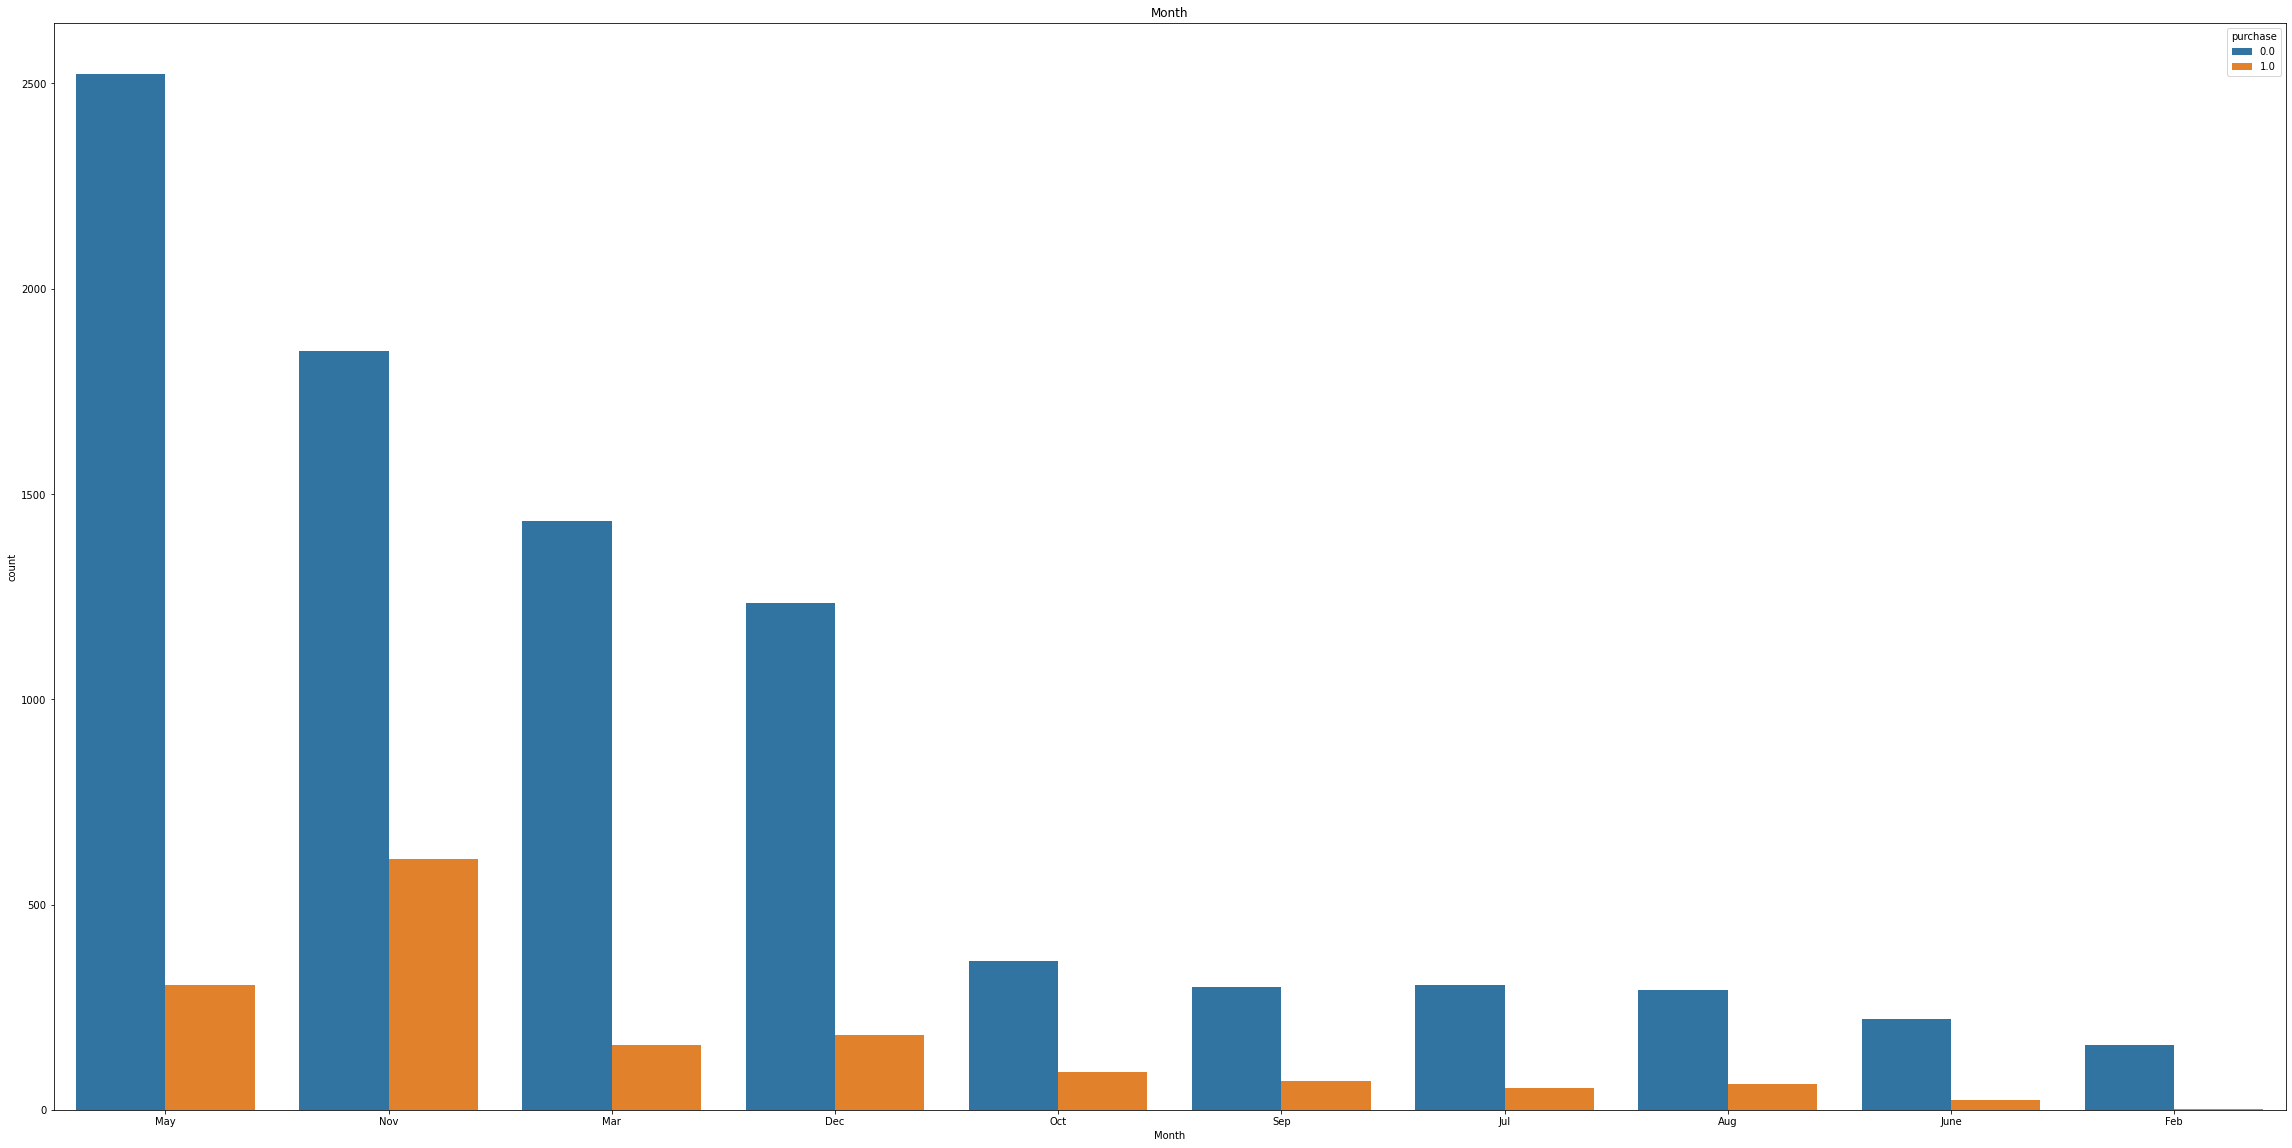


Normalized Value Counts:
May     0.275879
Nov     0.240332
Mar     0.155469
Dec     0.138281
Oct     0.044531
Sep     0.036133
Jul     0.034961
Aug     0.034668
June    0.024023
Feb     0.015723
Name: Month, dtype: float64


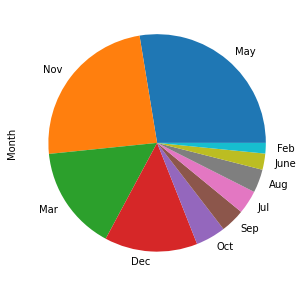

Precentage of '1' in each type:
Feb  =  1.24 %
Mar  =  9.86 %
May  =  10.73 %
Oct  =  20.39 %
June  =  10.16 %
Jul  =  15.08 %
Aug  =  17.46 %
Nov  =  24.87 %
Sep  =  19.19 %
Dec  =  12.78 %


In [195]:
catopenerx('Month')
getpercentage('Month', train.Month, train)

#### Conclusion from Exploration:
The features here are the month the user entered the website. The main things we can see is:
1. Around 80% of the traffic on the website is in November, December, March, and May.
2. The highest percentages of buyers are in November.
3. The least amount of traffic is in February- and the smallest proportion of users buy in February.


## Handling small quantity Variables:
Merge small values- As can be seen in the above graphs and plots, the months Oct, Sep, Jul, Aug, Jun, Feb, all consist seperately of less than 5 percent of the data.

#### Options:
1. Merging all groups below 5 percent
2. Merging by seasons
3. Merging groups below 5 percent with groups that seems most relevant

We will go with option 3.
- October has 4.4 pecent of the traffic, but has a high percentage of buyers, and is close to november, so we will merge them together.
- February has a low proportion of buyers, so we will merge it with march, which is the folowing month and also with a small proportion of buyers.
- We will merge June with May- late spring\ early summer months with similar proportions of buyers
- We will merge July, August, September- summer\ early fall months with similar proportions of buyers




In [196]:
def handlemonthstraintest(mergebelow5percent = False, mergebyreason=False, train = train, test = test, col = 'Month'):
    if mergebelow5percent:
        small = ['Feb', 'June', 'Jul', 'Sep', 'Oct', 'Aug']
        for i in small:
            train[col] = train[col].replace([i],'Other_month')
            test[col] = test[col].replace([i],'Other_month')
    elif mergebyreason:
        octnov = ['Oct','Nov']
        febmar = ['Feb','Mar']
        junma = ['June', 'May']
        JAS = ['Jul', 'Aug', 'Sep']
        for i in octnov:
            train[col] = train[col].replace([i],'OctNov')
            test[col] = test[col].replace([i],'OctNov')
        for i in febmar:
            train[col] = train[col].replace([i],'FebMar')
            test[col] = test[col].replace([i],'FebMar')
        for i in junma:
            train[col] = train[col].replace([i],'JuneMay')
            test[col] = test[col].replace([i],'JuneMay')
        for i in JAS:
            train[col] = train[col].replace([i],'JulAugSep')
            test[col] = test[col].replace([i],'JulAugSep')


In [197]:
handlemonthstraintest(mergebyreason=True)

## NULLs:

In [198]:
#Amount of nulls:
train['Month'].isnull().sum()

24

There is a very small amount of Nans, so we will fill Nan by the most popular month

In [199]:
# Fill NA
train, test = fill_most_common_value_cat_train_test('Month')
train['Month'].isnull().sum()

0

In [200]:
tohotcode.append('Month')

### Weekend

### Exploration:

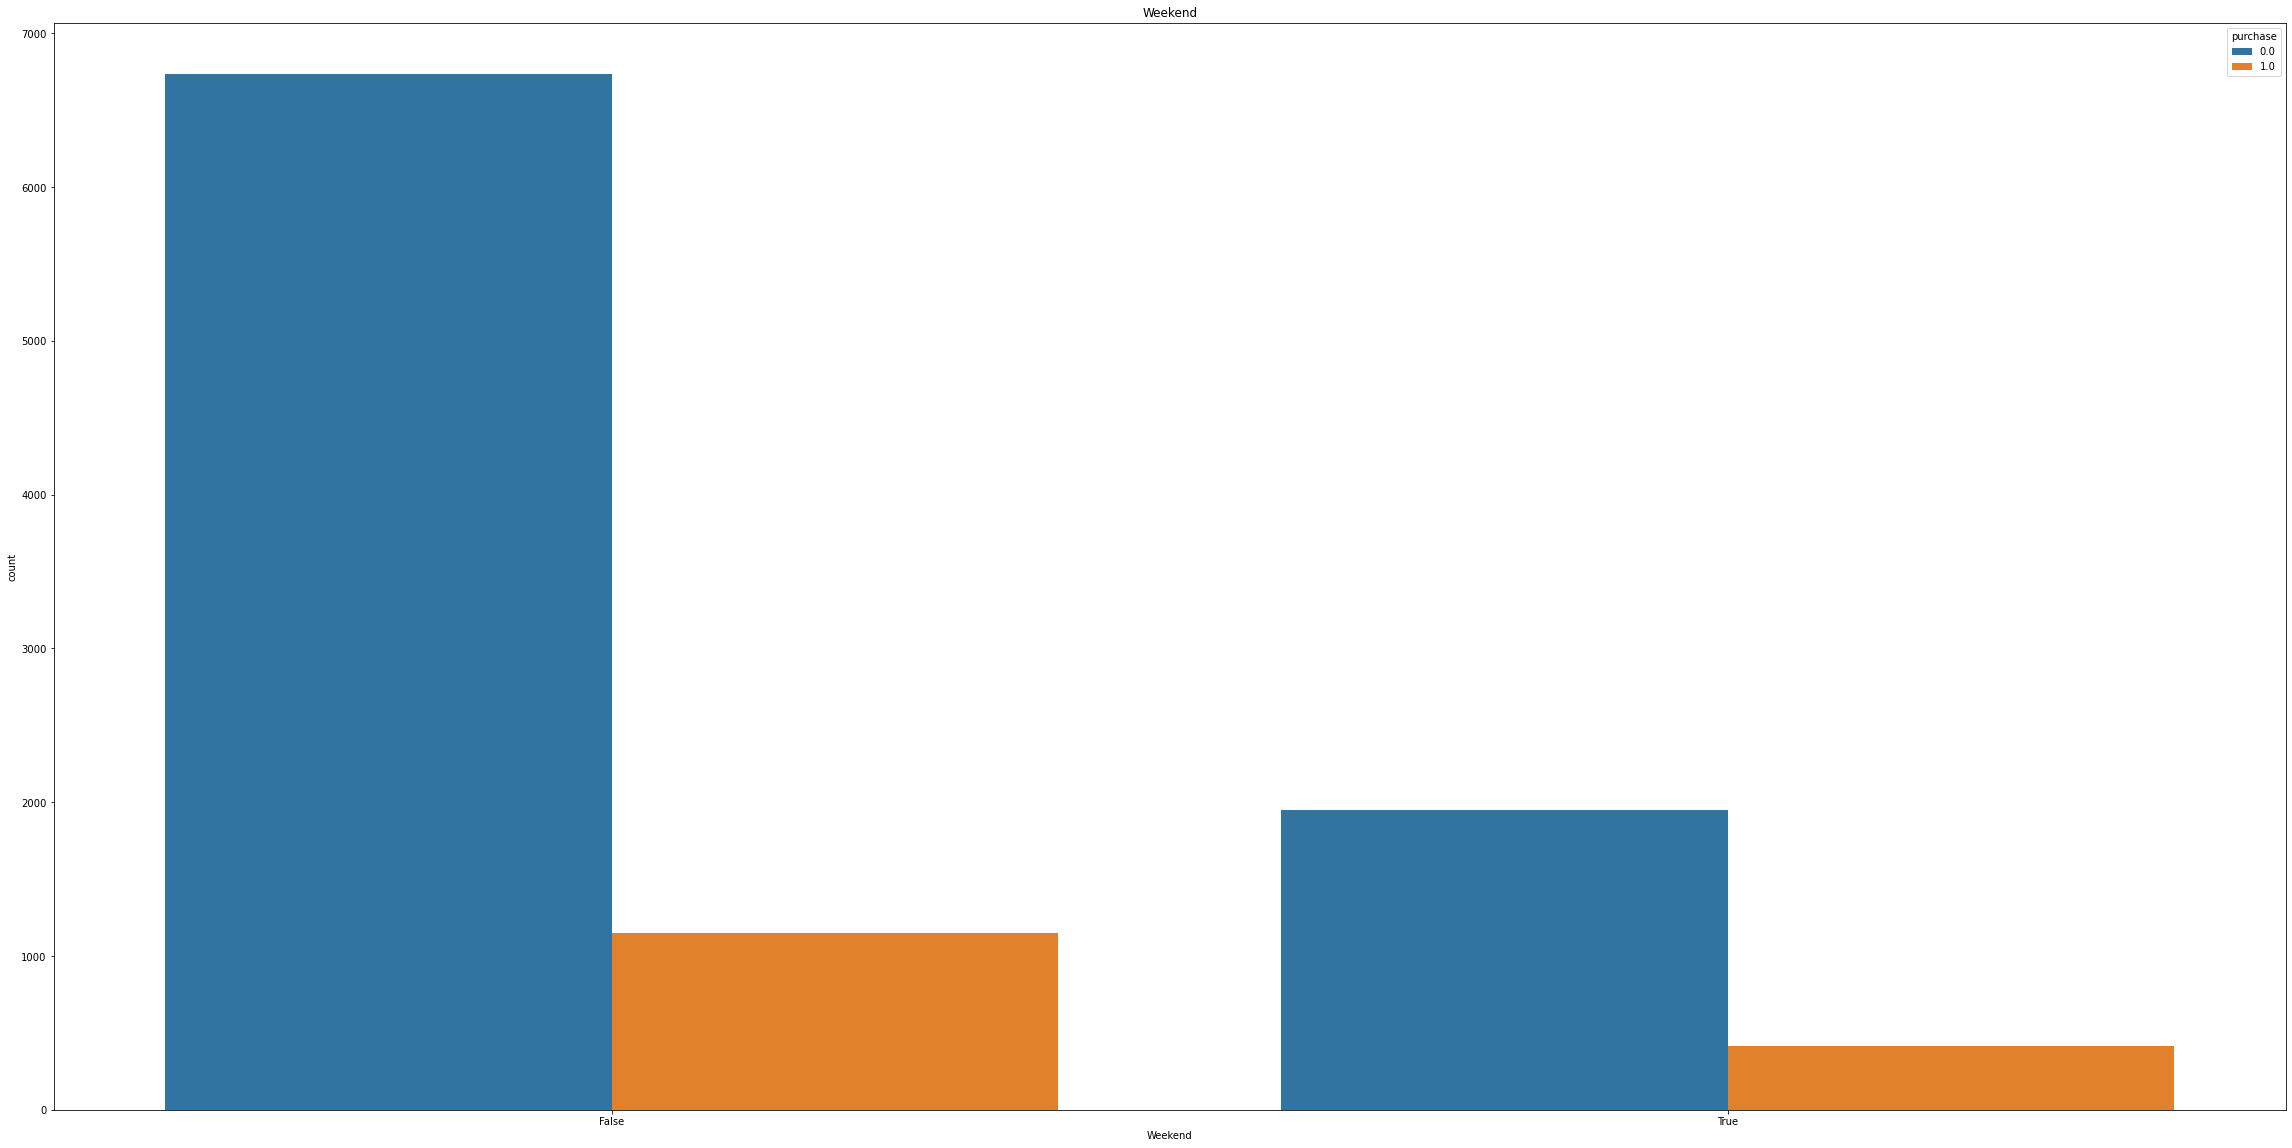


Normalized Value Counts:
False    0.769283
True     0.230717
Name: Weekend, dtype: float64


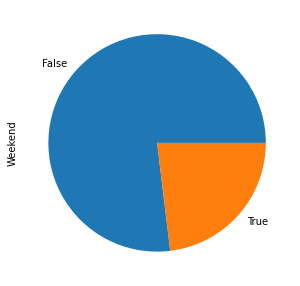

Precentage of '1' in each type:
False  =  14.56 %
True  =  17.48 %


In [201]:
catopenerx('Weekend')
getpercentage('Weekend', train.Weekend, train)

### Conclusion: 
As we would expect, there are less samples from the weekend (becuase it is only two days of the week)<br>
Interestingly, there are even less samples on the weekend compared to the week proportionatlly to the amount of days in a week (On the weekend, had there been the same amount of samples on every day of the week, there should have been 2/7 = 0.28% of the samples, but there are only 23%).<br>
We can also see there is a larger proportion of purchase = 1 on the weekend.<br>


## Handling small quantity Variables:
As we can see there are no small quantity variables.

In [202]:
#Amount of nulls:
train['Weekend'].isnull().sum()

22

#### Fill NaN: There are many more False, so we will fill all NaN as false.

In [203]:
# Fill NA
train, test = fill_most_common_value_cat_train_test('Weekend')


In [204]:
## Replacing False/True with 0/1
train['Weekend'].replace({False: 0, True: 1}, inplace=True)
test['Weekend'].replace({False: 0, True: 1}, inplace=True)

### A:

### Exploration:

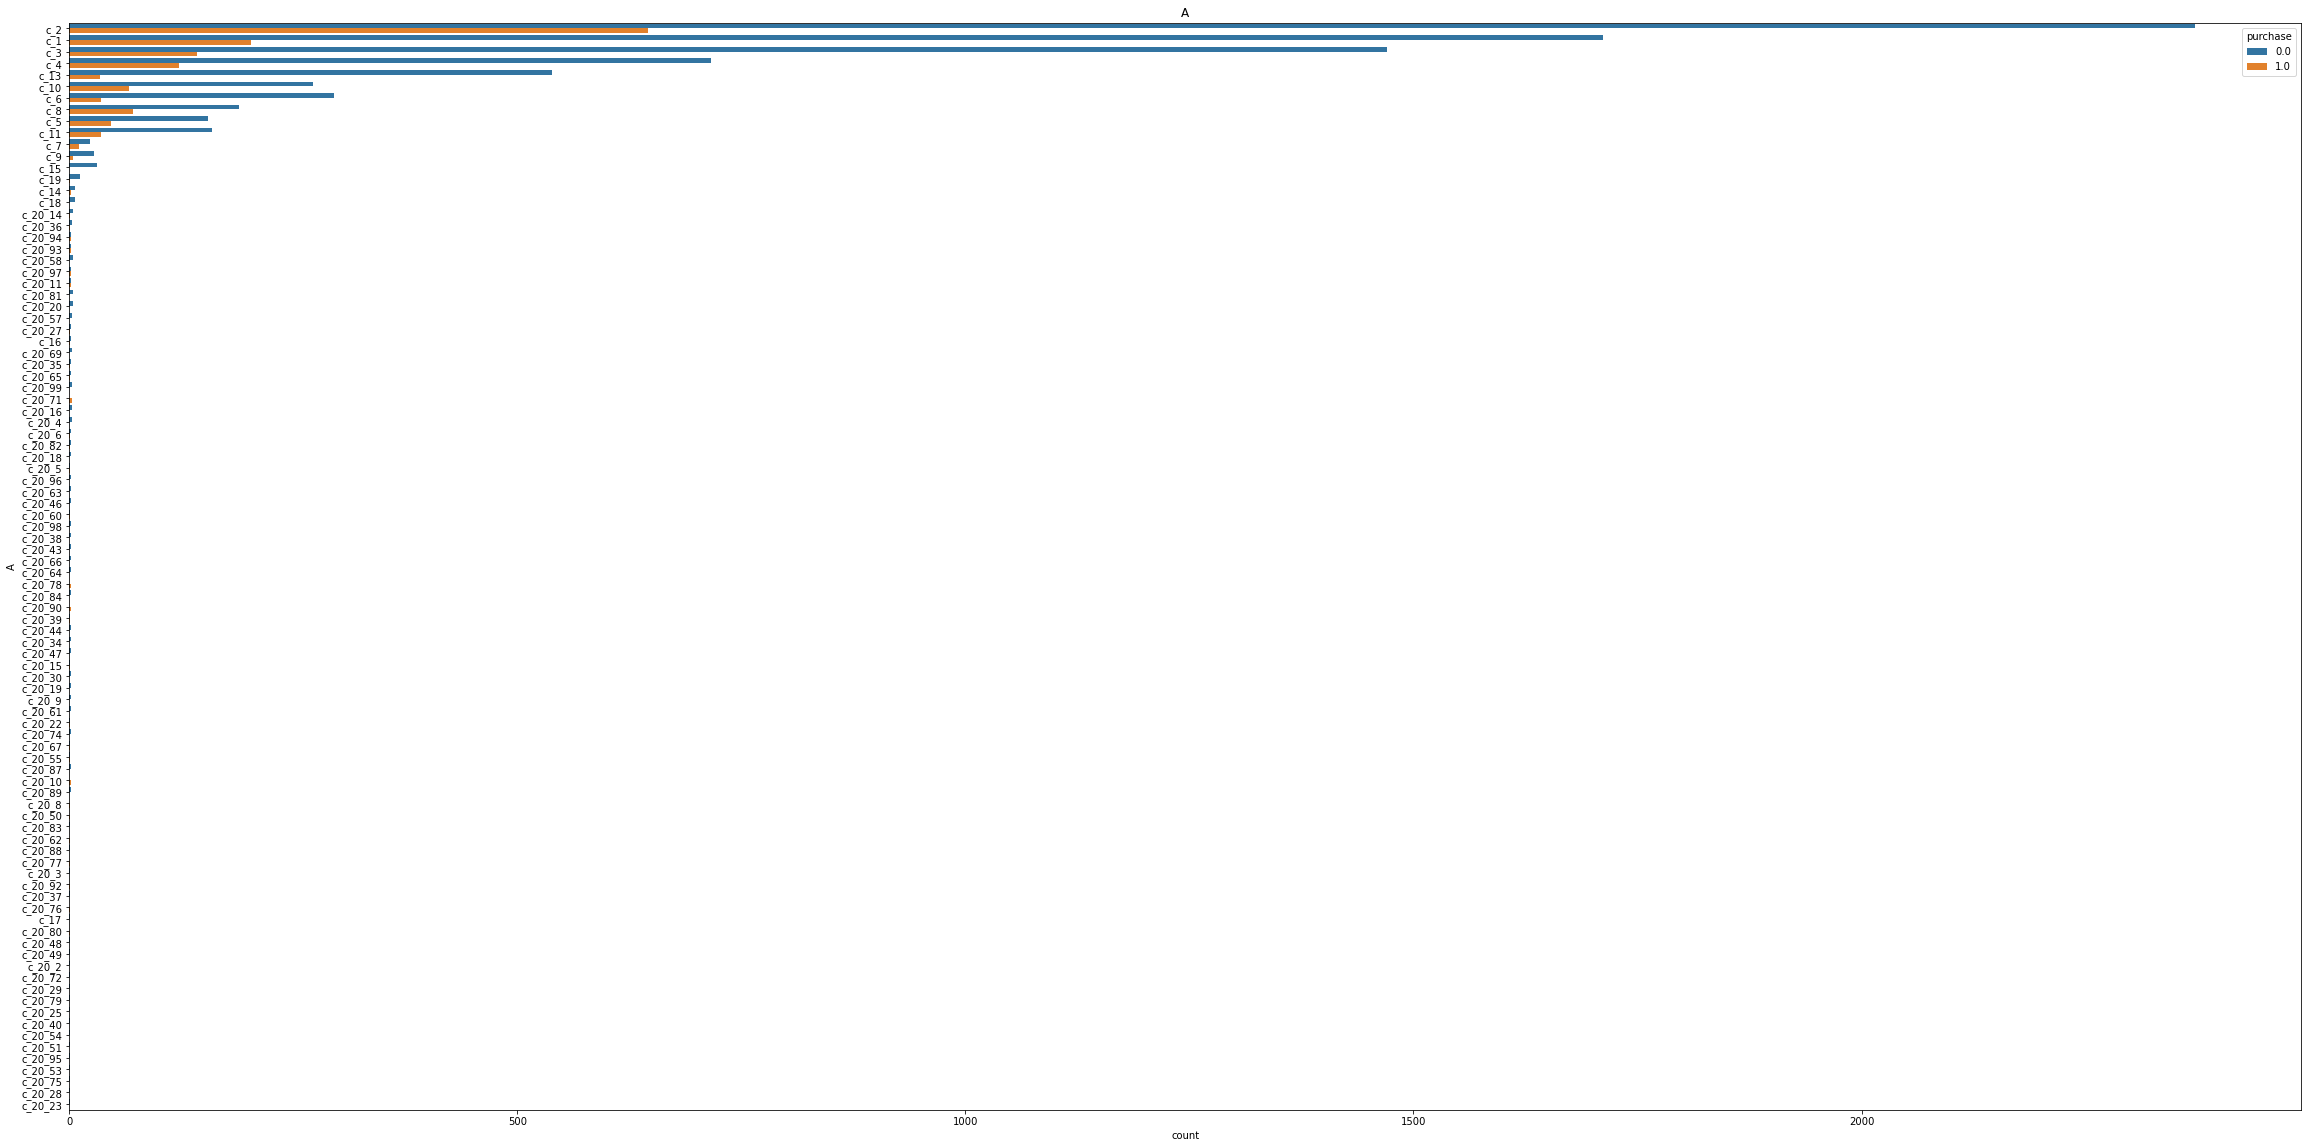

In [205]:
catopenerA('A')

#### Explaining each category: 
We don't know how to explain the meaning of each category in A, but we can see there are many different categories, and a large difference in the amount of appearances of different categories.



## Handling small quantity Variables:

 Firstly we can see that most of the single/ small value start with c_20, so let us first merge all the c_20, and continue Exploration.

In [206]:
#Manipulating data to start only with first word (browser type):
def mergec_20(df):
    for i in range(len(df['A'])):
        if pd.isna(df['A'].iloc[i]):
            continue
        first = (df['A'].iloc[i]).split("_")[0]
        second = (df['A'].iloc[i]).split("_")[1]
        word = first + "_" + second
        if word == "c_20":
            df['A'].iloc[i] = word

In [207]:
mergec_20(train)
mergec_20(test)

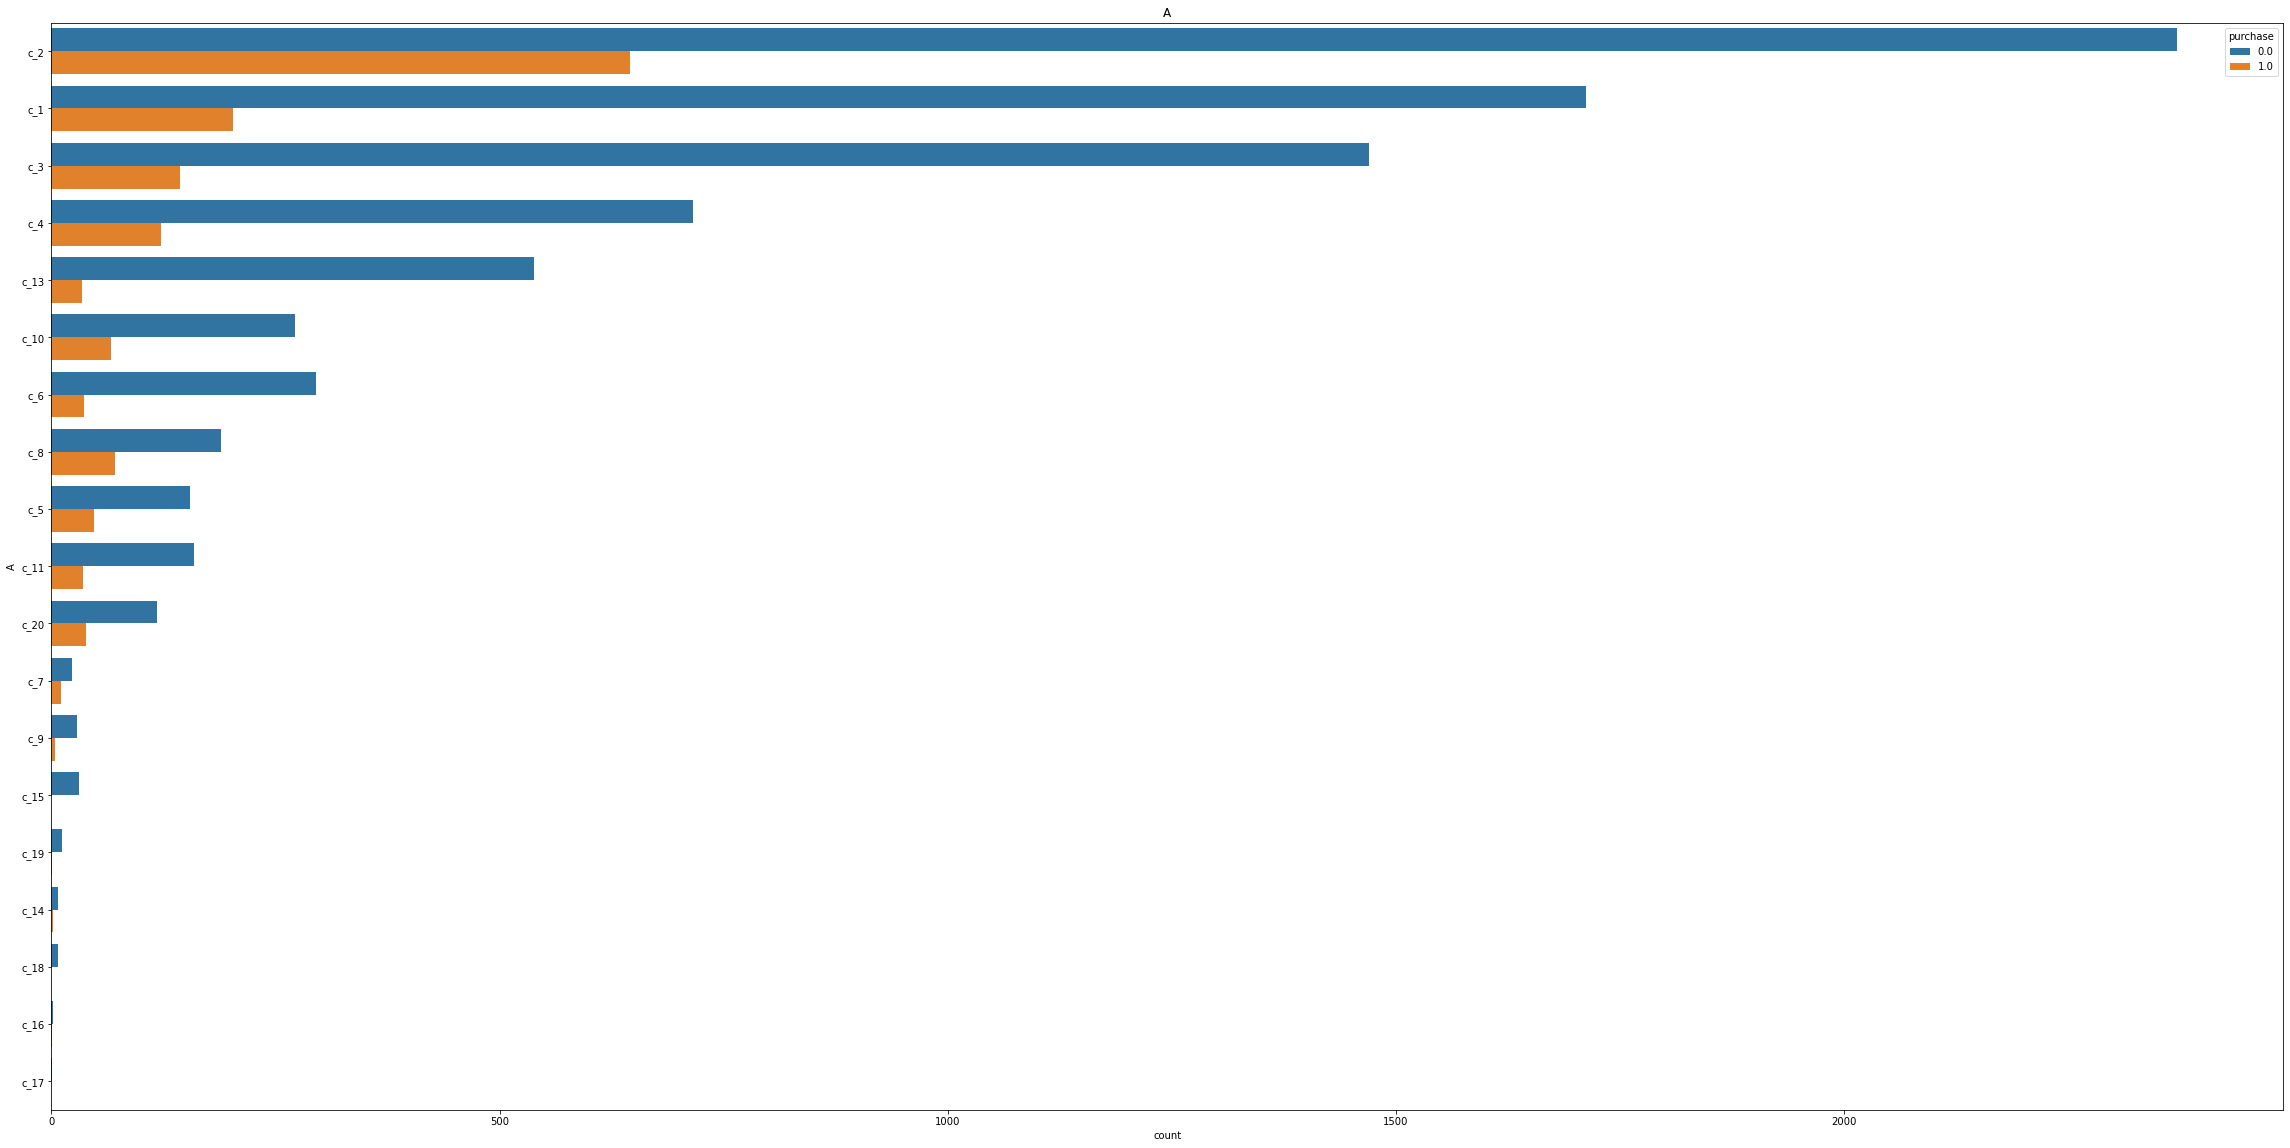


Normalized Value Counts:
c_2     0.315393
c_1     0.200125
c_3     0.168565
c_4     0.087574
c_13    0.059881
c_10    0.035427
c_6     0.034591
c_8     0.027171
c_5     0.021110
c_11    0.020274
c_20    0.016303
c_7     0.003553
c_9     0.003344
c_15    0.003240
c_19    0.001359
c_14    0.000941
c_18    0.000732
c_16    0.000314
c_17    0.000105
Name: A, dtype: float64


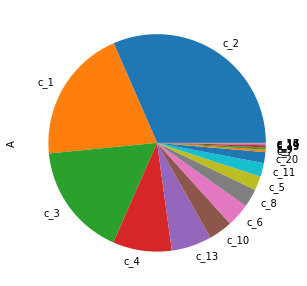

Precentage of '1' in each type:
c_1  =  10.6 %
c_3  =  8.87 %
c_4  =  14.56 %
c_2  =  21.4 %
c_5  =  23.27 %
c_6  =  10.88 %
c_8  =  27.31 %
c_10  =  19.76 %
c_11  =  18.04 %
c_9  =  12.5 %
c_7  =  32.35 %
c_13  =  5.93 %
c_14  =  22.22 %
c_15  =  0.0 %
c_18  =  0.0 %
c_19  =  7.69 %
c_16  =  33.33 %
c_17  =  0.0 %
c_20  =  24.36 %


In [208]:
catopener('A')
getpercentage('A', train.A, train)

### We can see that still most of the groups consist of under 5 % of the data. We also know that this feature is built from other features in the data.

Options:<br>
    1. Merge all categories below 5 percent to Nan and use Nan imputation to put them in a group<br>
    2. Merge all categories smaller than c_20 (becuase we can see therere is a big jump between 1.6 percent of data at c_20  and 0.03 percent at c_7)<br>

We will merge all categories below 5 percent.

In [209]:
def handleAtraintest(nanbelowc_20=False, nanbelow5percent=False, mergebelowc_20=False, mergebelow5percent=False, train = train, test = test, col = 'A'):
    below20 = ["c_7", "c_9", "c_15", "c_19", "c_14", "c_18", "c_16", "c_17"]
    below5per = ["c_7", "c_9", "c_15", "c_19", "c_14", "c_18", "c_16", "c_17", "c_20", "c_11","c_5","c_8","c_6", "c_10"]
    if nanbelowc_20:
        for i in below20:
            train[col] = train[col].replace([i], np.nan)
            test[col] = test[col].replace([i], np.nan)
    elif nanbelow5percent:
        for i in below5per:
            train[col] = train[col].replace([i], np.nan)
            test[col] = test[col].replace([i], np.nan)
    elif mergebelowc_20:
        for i in below20:
            train[col] = train[col].replace([i], "Other_A")
            test[col] = test[col].replace([i], "Other_A")
    elif mergebelow5percent:
        for i in below20:
            train[col] = train[col].replace([i], "Other_A")
            test[col] = test[col].replace([i], "Other_A")

In [210]:
handleAtraintest(mergebelow5percent=True)

### NULLs

In [211]:
#Amount of nulls:
train['A'].isnull().sum()

695

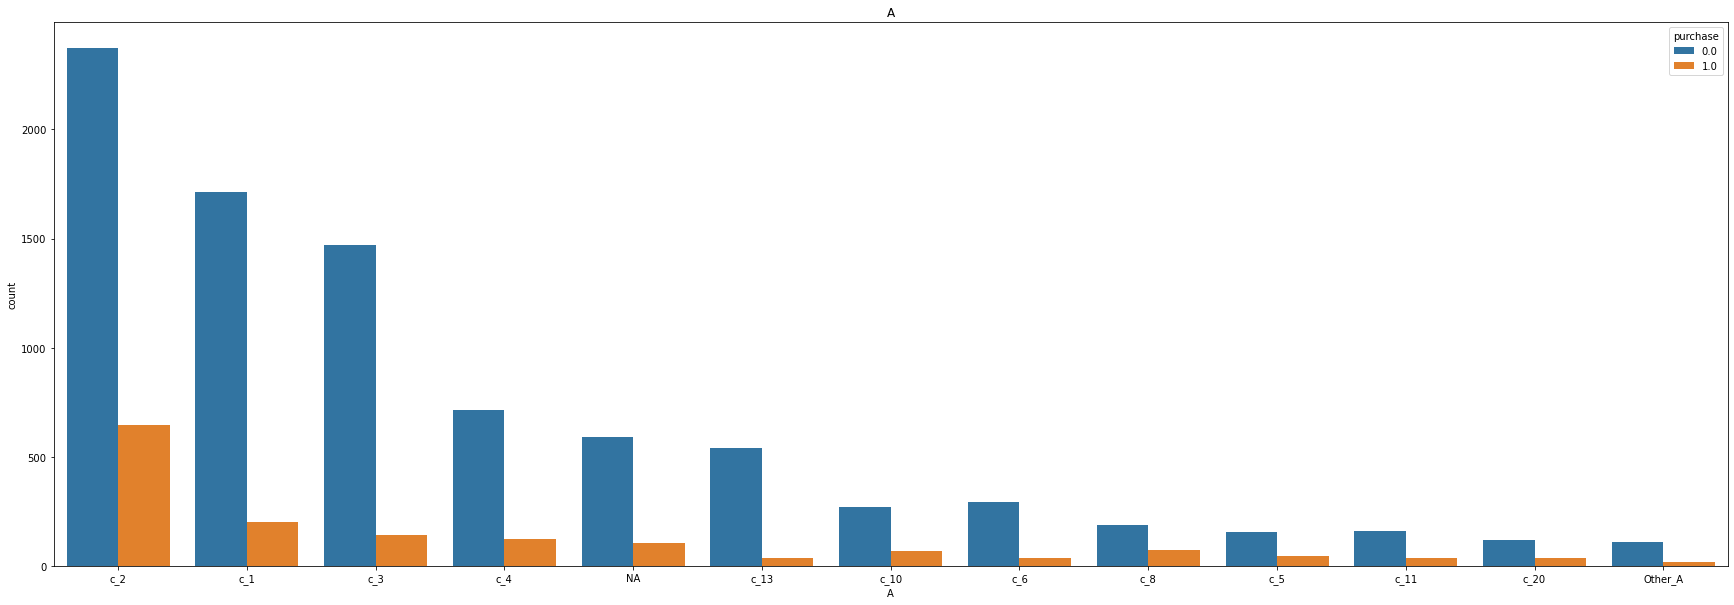

In [212]:
plotnans('A', 'purchase')

We can see that Na is a relatively large group, so we will create another Na group:

In [213]:
train, test = newgroupnantraintest('A')

In [214]:
## One hot encoding:
tohotcode.append('A')

### C

### Exploration:

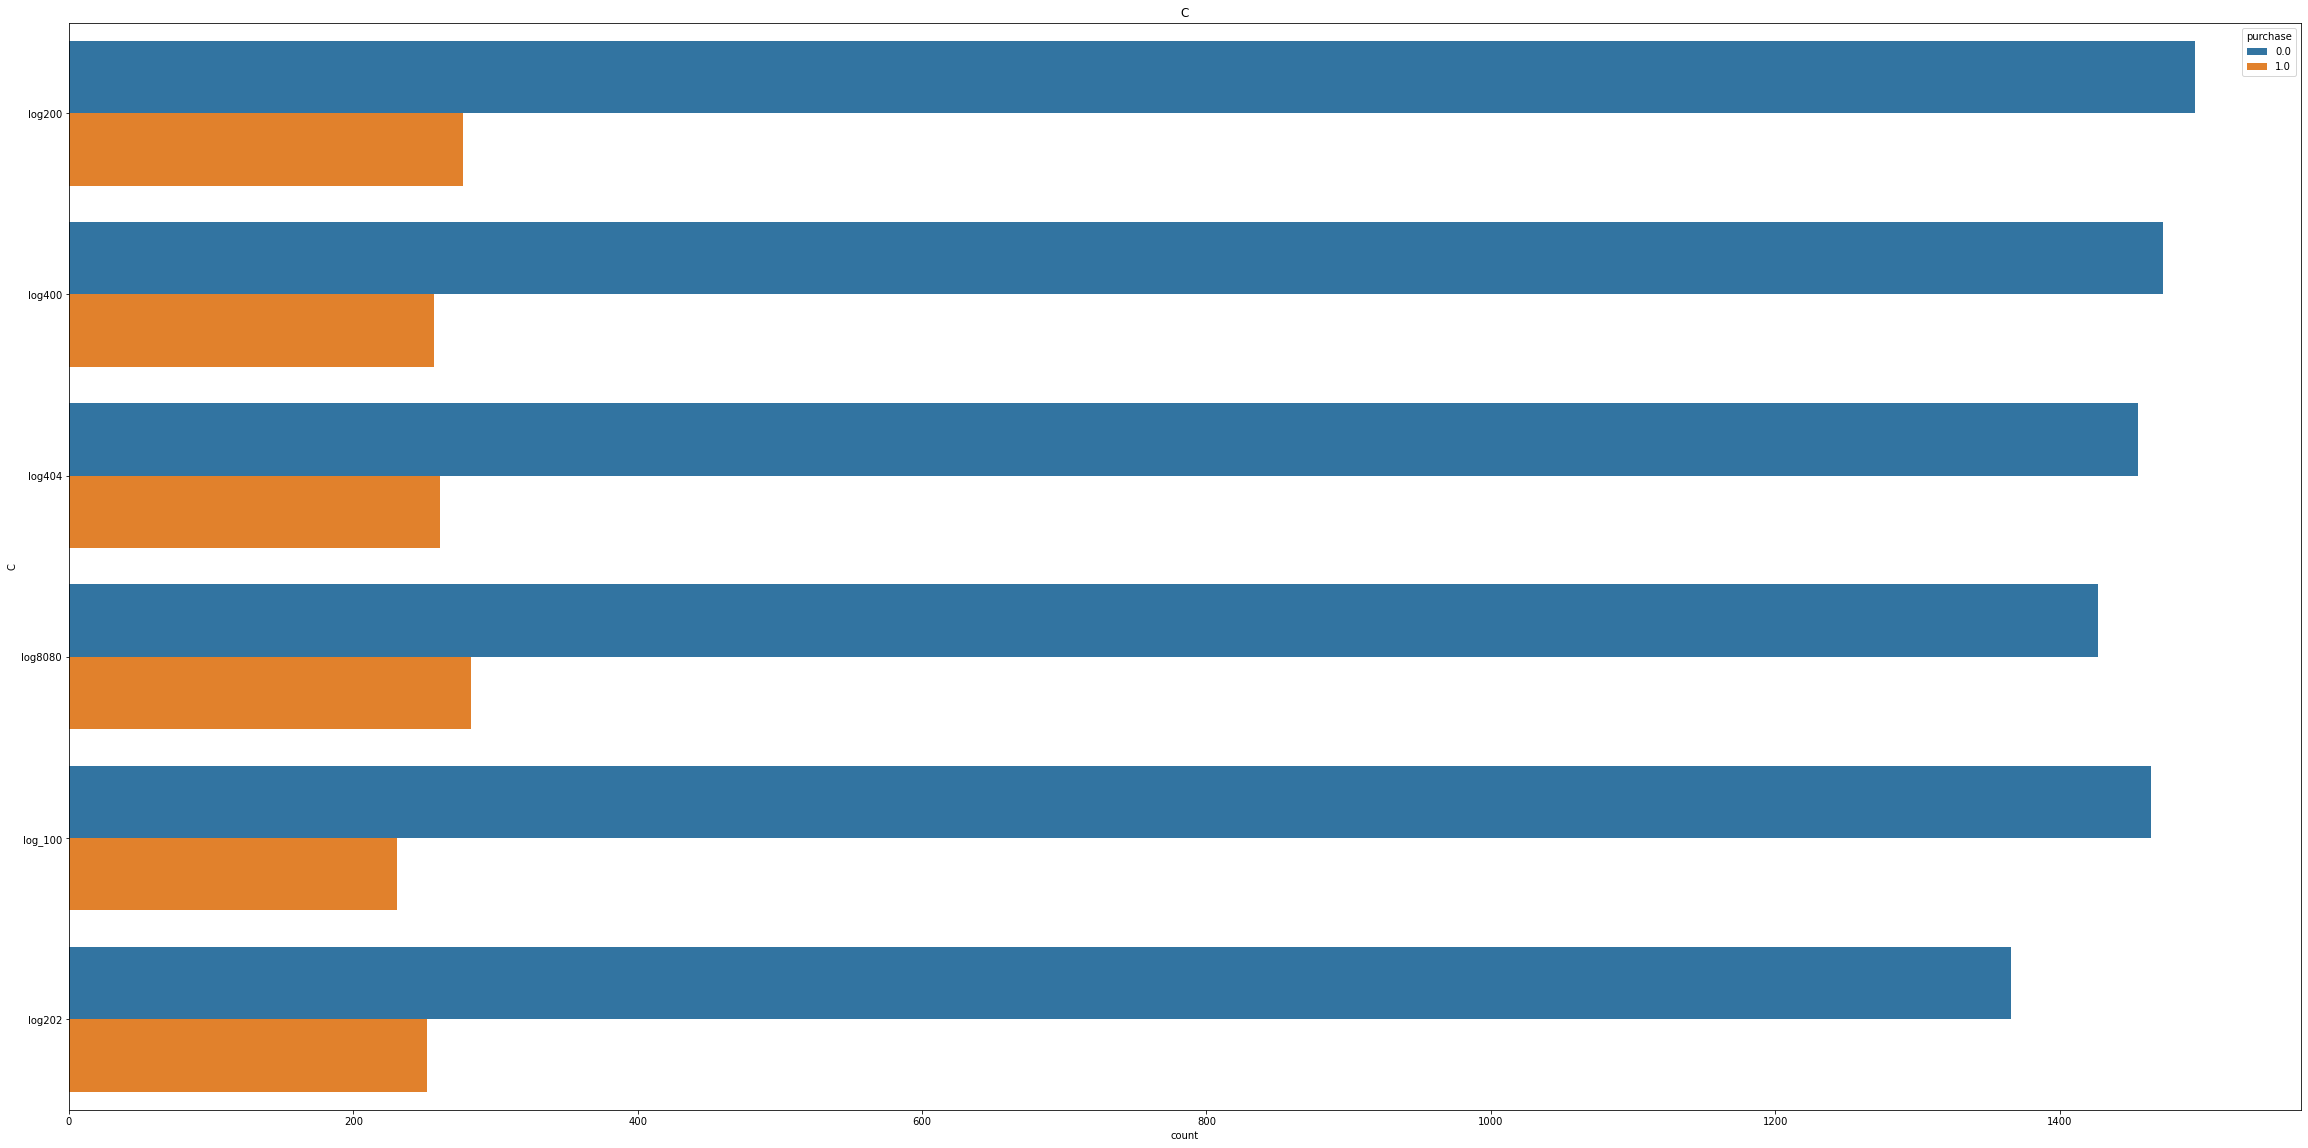


Normalized Value Counts:
log200     0.173030
log400     0.168929
log404     0.167562
log8080    0.166976
log_100    0.165511
log202     0.157992
Name: C, dtype: float64


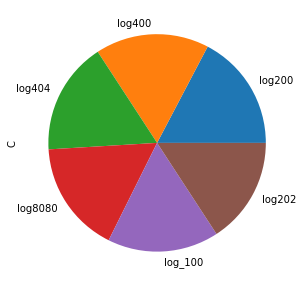

Precentage of '1' in each type:
log202  =  15.57 %
log404  =  15.21 %
log_100  =  13.63 %
log200  =  15.63 %
log400  =  14.86 %
log8080  =  16.55 %


In [215]:
catopener('C')
getpercentage('C', train.C, train)

#### So we see that the different variables of C are almost equally distributed and the distribution of the purchases is very similar.

#### Handling small quantity Variables:
There are no small quantity variables, and there also arent variables that should obviously be merged.

#### NULLs:


In [216]:
#Amount of nulls:
train['C'].isnull().sum()

23

There is a very small number of NULLs, so we will label them as the most common value which is log200.

In [217]:
train, test = fill_most_common_value_cat_train_test('C')

In [218]:
tohotcode.append('C')

### Region

### Exploration:

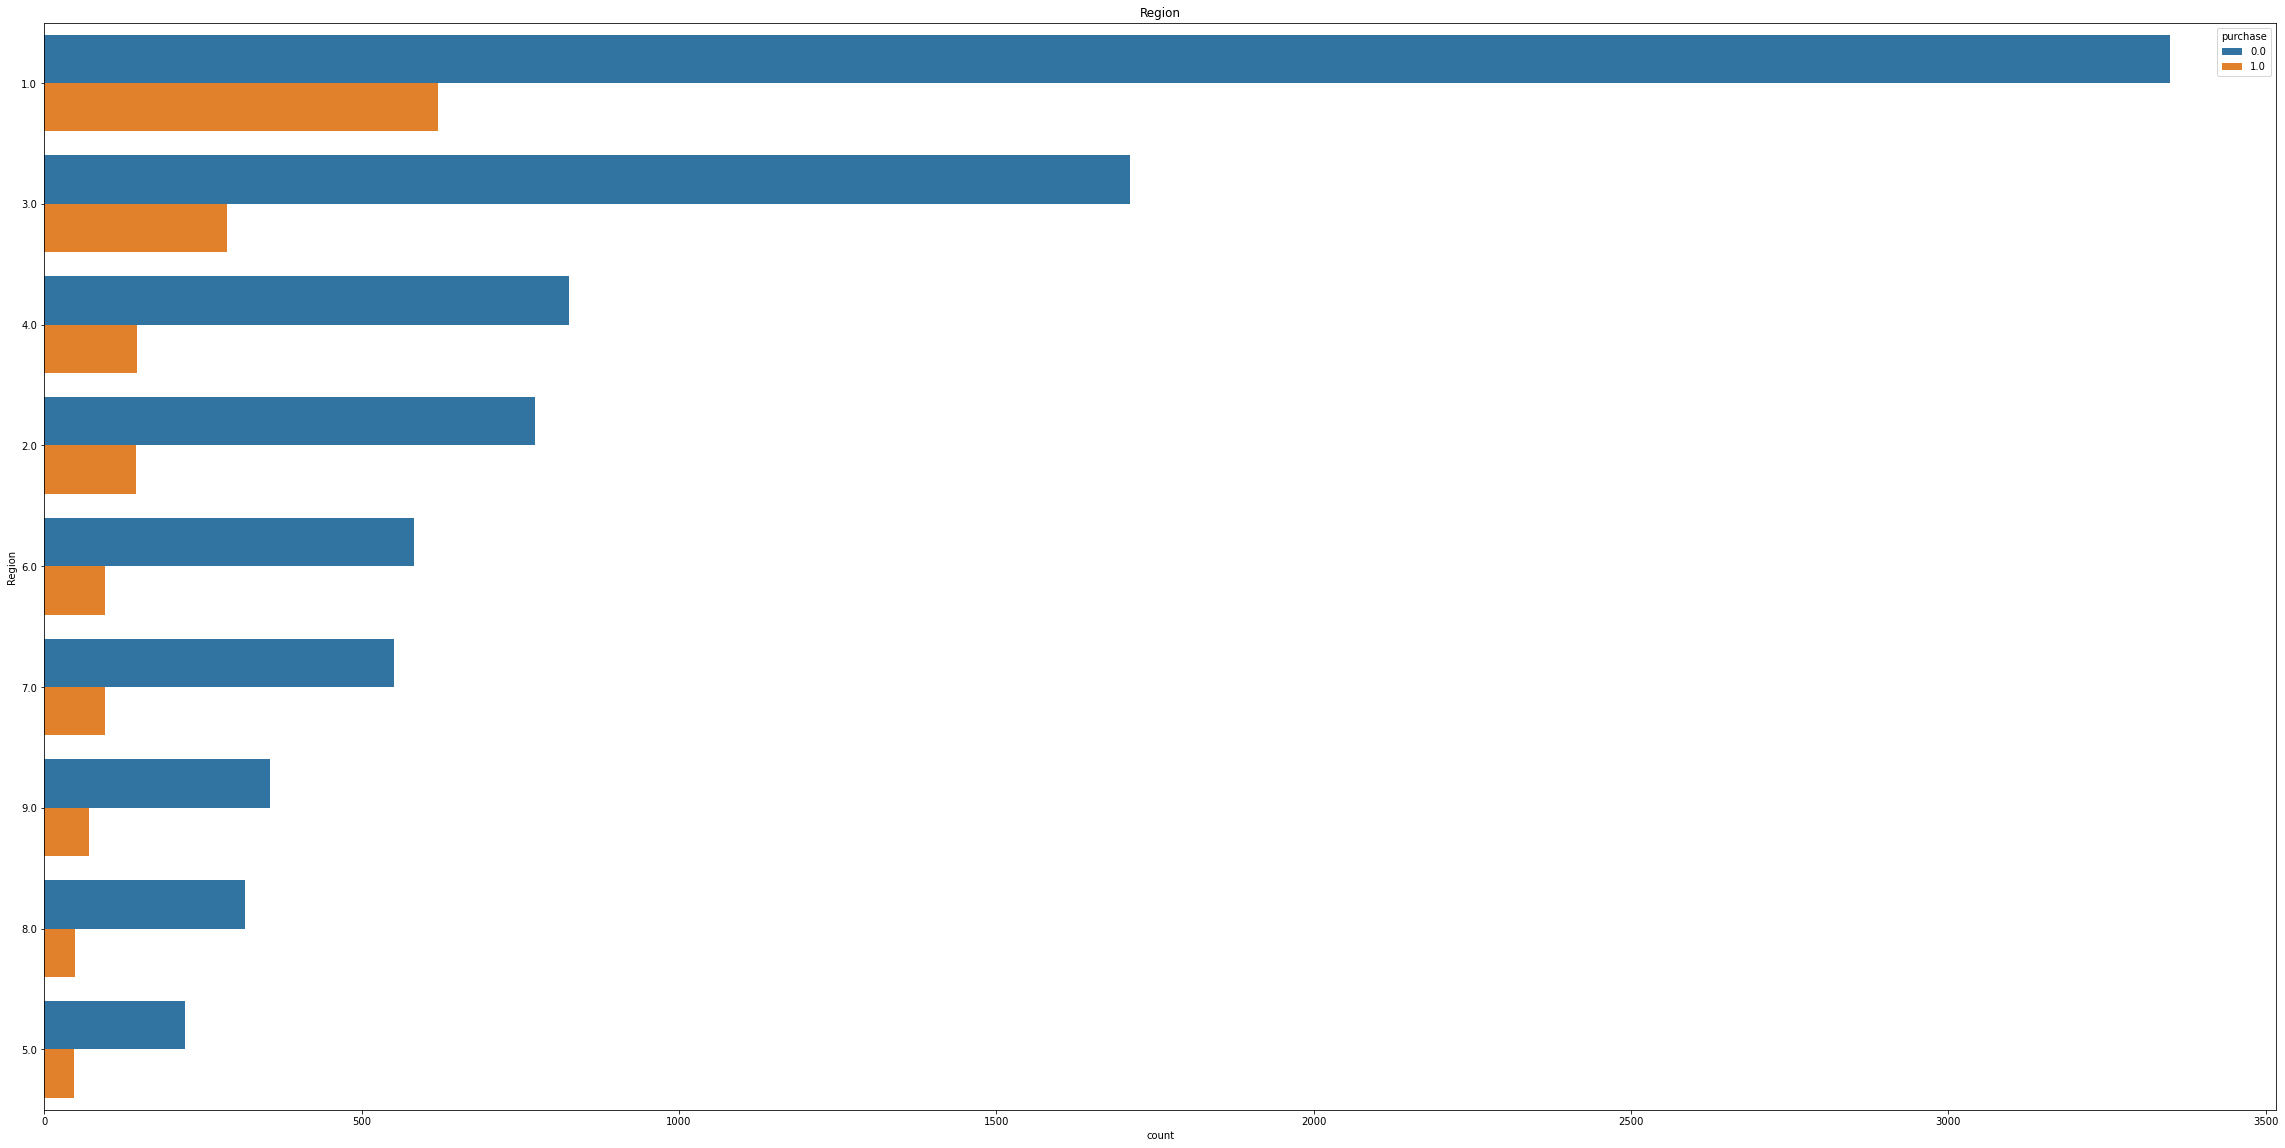


Normalized Value Counts:
1.0    0.387371
3.0    0.195003
4.0    0.094964
2.0    0.089694
6.0    0.066270
7.0    0.063147
9.0    0.041675
8.0    0.035624
5.0    0.026254
Name: Region, dtype: float64


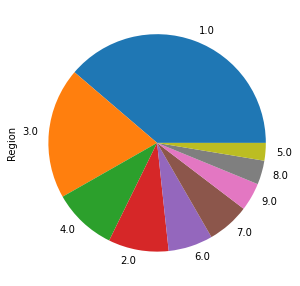

Precentage of '1' in each type:
1.0  =  15.62 %
9.0  =  16.63 %
3.0  =  14.41 %
2.0  =  15.78 %
4.0  =  15.01 %
5.0  =  17.47 %
6.0  =  14.14 %
7.0  =  14.84 %
8.0  =  13.42 %


In [219]:
catopener('Region')
getpercentage('Region', train.Region, train)

#### Conclusion:
 Regions gives us the region from which the user is entering. 1 through 9, with no ordinal meaning. The main difference that can be seen is in sizes, with 1 having the most users. There isn't a large difference in proportion of buyers between regions.


#### Handling small quantity Variables:

9, 8 ,5 have below 5 percent of the data, but the least of them (5) has 2.6 %, and all of the regions have a similar proportion of purchases. <br><br>

We see two options:<br>
1. Leave the data as it is, seeing that the deviation from below 5 percent isn't very large, and there is no sign as to a correct way to merge the data.
2. merge 5, 8, 9<br>

We will go with option 1 and leave the data as it is.

## NULLs

In [220]:
#Amount of nulls:
train['Region'].isnull().sum()

18

### Fill NaN:
 There are a very small amount of Nans, so we will fill with the most popular.

In [221]:
# Fill NA
train, test = fill_most_common_value_cat_train_test('Region')

In [222]:
tohotcode.append('Region')

## Device

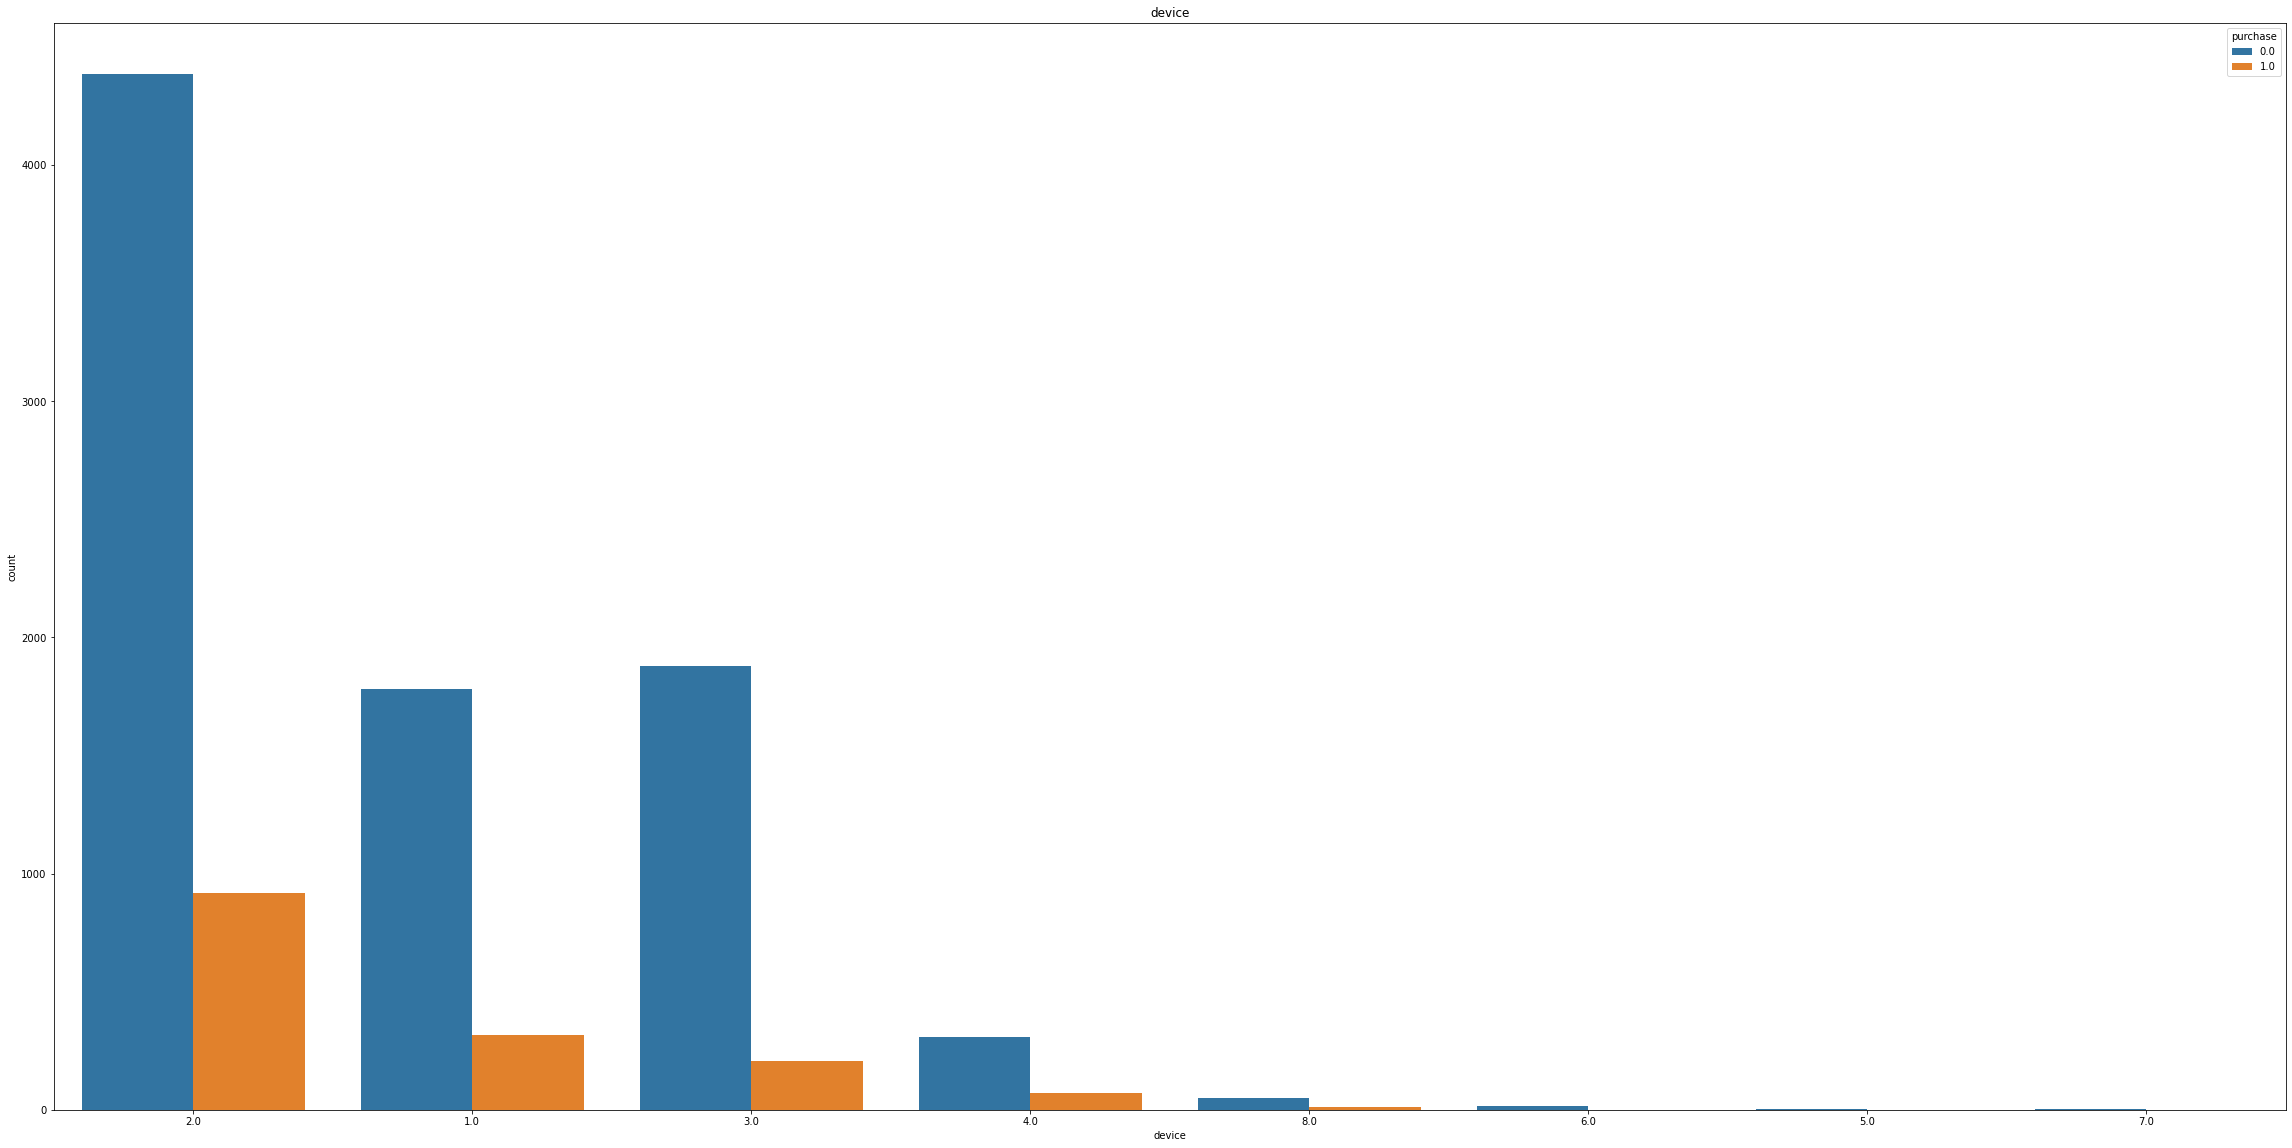


Normalized Value Counts:
2.0    0.532978
1.0    0.210839
3.0    0.209431
4.0    0.037905
8.0    0.006334
6.0    0.001810
5.0    0.000402
7.0    0.000302
Name: device, dtype: float64


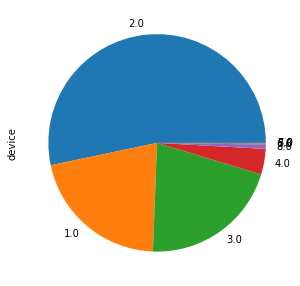

Precentage of '1' in each type:
1.0  =  15.12 %
4.0  =  18.57 %
3.0  =  9.89 %
2.0  =  17.32 %
7.0  =  33.33 %
6.0  =  5.56 %
8.0  =  20.63 %
5.0  =  25.0 %


In [223]:
catopenerx('device')
getpercentage('device', train.device, train)

#### Explaining each category:

The different categories are of devices. We assume that devices 4-8, are unpopular devices, but from the percentages of buyers it isn't very obvious if they are old/new or truely affect the amount of buyers.



#### Handling small quantity Variables:

 Devices 5, 6, 7, 8- All with consisting of below 1 percent of buyers, obviously need handling.<br>
 4- with 4.7 percent of buyers, might also need attention.<br>

 Because it seems that 4 isn't a very "telling" device, we will merge with the rest of the unpopular devicesץ




In [224]:
def handlingdevicestraintest(mergesmall =False, mergesmall4 = False, nansmall =False, nansmall4 = False,train= train, test = test, col = "device"):
    small = [8.0, 5.0, 6.0, 7.0]
    small4= [8.0, 5.0, 6.0, 7.0, 4.0]
    if nansmall:
        for i in small:
            train[col] = train[col].replace([i], np.nan)
            test[col] = test[col].replace([i], np.nan)
    elif nansmall4:
        for i in small4:
            train[col] = train[col].replace([i], np.nan)
            test[col] = test[col].replace([i], np.nan)
    elif mergesmall:
        for i in small:
            train[col] = train[col].replace([i], "Other_device")
            test[col] = test[col].replace([i], "Other_device")
    elif mergesmall4:
        for i in small4:
            train[col] = train[col].replace([i], "Other_device")
            test[col] = test[col].replace([i], "Other_device")

        
        



In [225]:
handlingdevicestraintest(mergesmall4=True)

## NULLS

In [226]:
train['device'].isnull().sum()

318

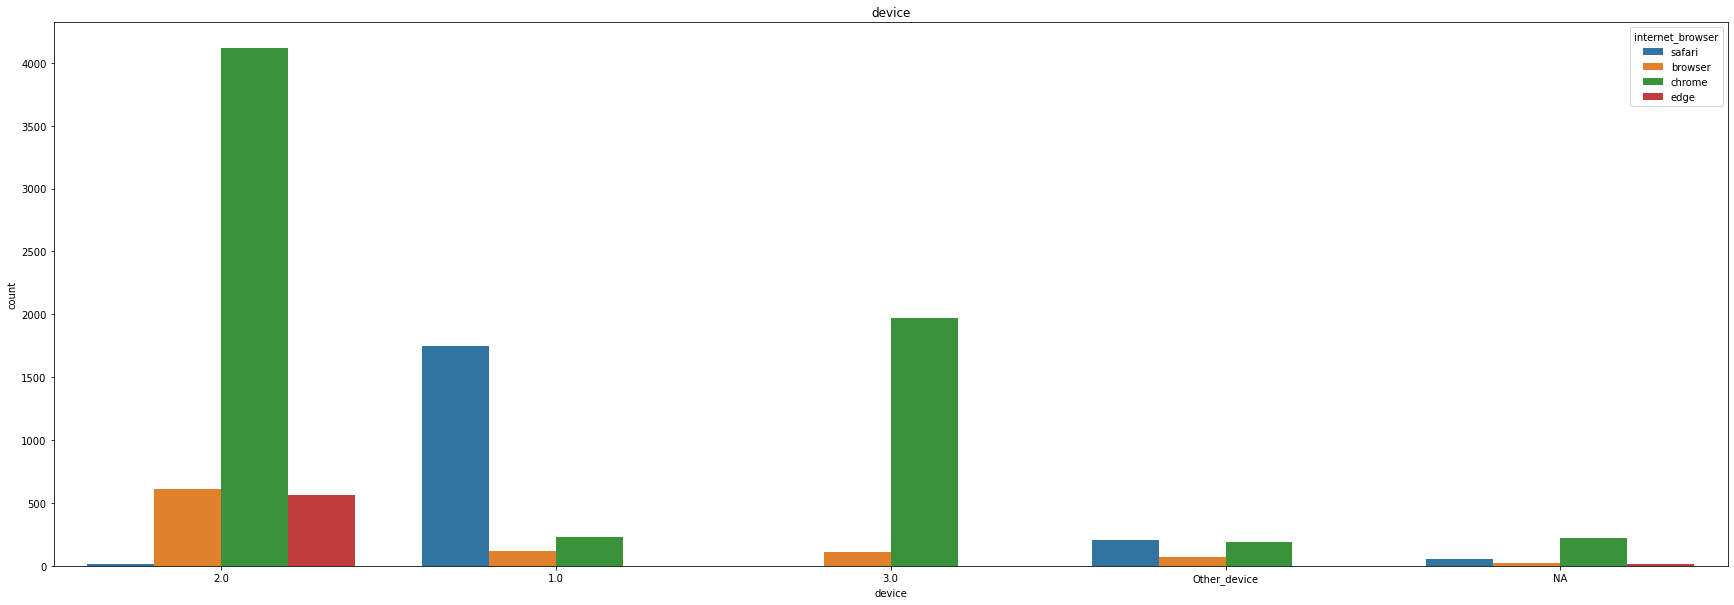

In [227]:
plotnans('device', 'internet_browser')

We can see that the browser of device 1.0 is mostly safari.

### FIll NaN:
Device has a relatively large amount of NULLs.<br>

Options:<br>
1. Because device 2.0 is very obviously dominant, with over half of the buyers entering with this device, we could place the NULLs there without it have much effect on the value.
2. Placing all safari-nulls in device 1.0 and the rest in 2.0<br>

We will go with option 2.

In [228]:
# Fill NA
train, test = handledevicenantraintest()


In [229]:
tohotcode.append('device')

## One hot encode all categoricals:

In [230]:
train = onehotcat(train, tohotcode)
test = onehotcat(test, tohotcode)

## Making sure train and test have the same columns:

In [231]:
for i in train:
    if i not in test:
        if i != "purchase":
            del train[i]

for i in test:
    if i not in train:
        del test[i]

In [232]:
purchase_reorder = train.pop('purchase')
rows, cols = train.shape
train.insert(cols, 'purchase', purchase_reorder)

### We are now ready to run the models!

### Building New features/ Mathematical mutations on existing features

In order to build a better, and smaller dimensioned model, after finishing the previous stages of preprocessing we tried creating new feature subsets using PCA.
The idea was sthat we had several categoric features, that were either split into many columns, or it seemed that their behavior wasn't of importance, so we took those features, and created subsets of PCA out of them.  Although this was an interesting idea, they didn't bring much better performance to the models, so they were ruled out.<br>
*Example of final array of code that went through this process in the report.*<br>
The code is in the comment below:

In [233]:
# ##Subset PCA
# def subsetstopcarray(train, test):
#     x_train = None
#     x_test = None
#     firsttrain = True
#     firsttest = True
#     for word in ["device", "Region", "A"]:
#         for df in [train, test]:
#             dataset = df[df.columns[pd.Series(df.columns).str.startswith(word)]]
#             listwords = [col for col in df if col.startswith(word)]
#             dataset = np.array(dataset)
#             if df.equals(train):
#                 #train.drop(listwords, axis = 0)
#                 train_components = get_principal_components(dataset,0.99)
#                 x_pca_cat_train = np.dot(dataset, train_components.T)
#                 if firsttrain:
#                     x_train = x_pca_cat_train 
#                     firsttrain = False
#                 else:
#                     np.concatenate((x_train, x_pca_cat_train), axis=1)        
#             if df.equals(test):
#                 #test.drop(listwords, axis = 0)
#                 x_pca_cat_test = np.dot(dataset, train_components.T)
#                 if firsttest:
#                     x_test = x_pca_cat_test
#                     firsttest = False
#                 else:
#                     np.concatenate((x_test, x_pca_cat_test), axis=1)
#     for word in [ "device", "Region", "A"]:
#         listwords = [col for col in train if col.startswith(word)]
#         train = train.drop(listwords, axis = 1)
#         test  = test.drop(listwords, axis = 1)
                      
#     return x_train, x_test, train, test

# traincatpca, testcatpca, train, test = subsetstopcarray(train, test)
# train = pd.concat([train.reset_index(drop=True), pd.DataFrame(traincatpca).reset_index(drop=True)], axis=1)
# test = pd.concat([test.reset_index(drop=True), pd.DataFrame(testcatpca).reset_index(drop=True)], axis=1)

## Feature Selection, Models, and Models Evaluation

##### Our models: KNN, Logistic Regression, Multi Layer Perception(ANN) & Random Forest.


#### Splitting the train set
We decided to split our train data into two parts: Train & Validation- on which will preform K-Fold Cross Validation using GridsearchCV in order to find the best paramaters, and Test- on which we will test the model built on the train & validation.<br>




In [234]:
hash_models = {}

test_submit = test.values[:,:]

#Converting data to numpy arrays
X, y = train.values[:,:-1], train.values[:,-1]

print(f'X.shape: {X.shape}, y.shape: {y.shape}')

#split to train and test
train_and_validation_data ,test_data ,train_and_validation_labels, test_labels = train_test_split(X,y,test_size = 0.2, random_state= 42, shuffle=True, stratify = y)


X.shape: (10264, 55), y.shape: (10264,)


#### Models Evaluation
For each model we will present a K-fold ROC plot that will present the 5 scores for each split (n=5) and the mean of all iterations.<br>
In addition, we will check our model on the test data (from within the training data) to see how we preform on new samples.

In [235]:
def ROC_Plot(n, clf, X, y):
    cv = KFold(n_splits=n) 
    
    # setting plot size
    plt.figure(figsize=(7,7))

    # First we calculate the sum, after the loop it will be divided by 'k' for mean
    sum_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    # each iteration for different fold
    i = 1
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.take(list(train_index),axis=0), X.take(list(test_index),axis=0)
        y_train, y_test = y.take(list(train_index),axis=0), y.take(list(test_index),axis=0)
        
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)[:,1]
        
        # ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        
        # ROC Curve Plot 
        single_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue',label='ROC fold %d (AUC = %.3f)' % (i, single_auc)) #The ROC curve of the train
        i += 1
        # summing the ROC for later mean calculation
        sum_tpr += np.interp(mean_fpr, fpr, tpr)
        sum_tpr[0] = 0.0 
        
    # Dividing the sum by k
    mean_tpr = sum_tpr / n
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    # Random guess line plot
    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
    
    # Mean ROC Curve plot
    plt.plot(mean_fpr, mean_tpr, color='red', linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)
    
    plt.xlabel('FP Rate')
    plt.ylabel('TP rate')
    plt.legend(loc="lower right")
    plt.title(f"{type(clf).__name__} ROC Curve")
    plt.show()
    print('Mean AUC = %0.3f' % mean_auc)

def predict_test(clf,test_d, test_l):
    y_pred = clf.predict(test_d)
    print(classification_report(test_l, y_pred))
    y_pred_proba = clf.predict_proba(test_d)[::,1]
    
    plt.figure(figsize=(3,3))
    fig = plot_confusion_matrix(clf, test_d, test_l, display_labels=clf.classes_)
    fig.figure_.suptitle("Confusion Matrix")
    plt.show()

    #define metrics
    plt.figure(figsize=(5,5))
    y_pred_proba = clf.predict_proba(test_d)[::,1]
    fpr, tpr, _ = metrics.roc_curve(test_l,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    test_auc = clf.score(x_forward_reduced_test, test_labels)
    print ('test AUC: %0.3f' % test_auc)

#### Decreasing Dimensonality using PCA/ Feature Selection:
Although during the preprocessing we took steps to decrease dimensionality, we still have 55 features and there is a big chance that our model will still be overfitted.<br> After trying PCA and forward selection on the first iterations, we saw that forward selection gave us better predictions, and decided to try different selection methods to find the best possible model.<br>
Methods we tried:
1. Using Forward selection using linear regression as the estimator in mallows Cp
2. Using Forward selection using logistic regression as the estimator in mallows Cp
3. Using a combination of Random forest most important features and forward selection(In the code commented below).

In the end our best models were with option 1, and that is the option we will be running our models with on the final iteration.







In [236]:
# Random forest feature selection



# #Best_Params ={
#  'criterion': ['entropy'],
#  'max_depth': [15],
#  'max_features': ['auto'],
#  'min_samples_leaf': [1],
#  'min_samples_split': [7],
#  'n_estimators': [1300],
#  'n_jobs': [-1],
#  'random_state': [0]} 

#  rfc = RandomForestClassifier(random_state=0)

# t0 = time.time() # for Runtime measurement

# # Instantiate the grid search model
# clf = GridSearchCV(estimator = rfc, param_grid = Best_Params, scoring='roc_auc', cv = 5, verbose=3)
# clf.fit(train_and_validation_data, train_and_validation_labels)

# best_params = clf.best_params_
# best_params['random_state'] = 0

# print(f'Best Params: {best_params} \n')
# print(f'Runtime: {round(time.time()-t0,2)} seconds')

# best_rf_grid = clf.best_estimator_

# # get the feature importance array from the model object attribute
# feature_importance = best_rf_grid.feature_importances_

# # get the index order to sort the importances
# sorted_idx = np.argsort(feature_importance)[-20:]
# print(sorted_idx)
# # plot
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.rcParams["figure.figsize"] = (12,8)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, np.array(train.columns)[sorted_idx])
# plt.title('Feature Importance (df)')
# plt.show()

# res = forward_selection(train_and_validation_data,train_and_validation_labels)
# print(f'Number of selected features by forward: {len(res)}')
# a = set(res)
# b = set(sorted_idx)
# a.update(b)
# combine = list(a)
# print(f'Number of features after combining both: {len(combine)}')

# print(sorted_idx)
# # calculate the test MSE for each reduced dataset
# x_forward_reduced_train_validation = train_and_validation_data[:,combine]
# x_forward_reduced_test = test_data[:, combine]

# x_forward_test_submit = test_submit[:, combine]
# #print(x_forward_reduced_train_validation)

# print(sorted_idx)
# # calculate the test MSE for each reduced dataset
# x_forward_reduced_train_validation = train_and_validation_data[:,combine]
# x_forward_reduced_test = test_data[:, combine]

# x_forward_test_submit = test_submit[:, combine]
# #print(x_forward_reduced_train_validation)



In [237]:
# Forward Selection
def get_sigma_hat_squared(X: np.array, y: np.array) -> float:
    n, f = X.shape
    reg  = LinearRegression()
    reg.fit(X, y)
    predsy = reg.predict(X)
    mse = mean_squared_error(y ,predsy)
    rss = mse * n
    #df = pd.DataFrame({'Actual': y_train, 'Predicted':
    #predsy})
    #rss = (np.sum(np.square(df['Predicted'] - df['Actual'])))
    #rss = reg.sse
    sigmasq = rss/(n - f - 1)
    return sigmasq

def get_mallows_cp_score(X: np.array ,y: np.array, sigma_hat_squared: float) -> float:
    n, d = X.shape
    reg  = LinearRegression()
    reg.fit(X, y)
    predsy = reg.predict(X)
    mse = mean_squared_error(y , predsy)
    cp = mse + 2*((d + 1)/n)*sigma_hat_squared
    return cp


def add_feature(X: np.array ,y: np.array ,current_features: List[int] , sigma_hat_squared: float) -> Dict:
    num_of_features = X.shape[1]
    num_of_cur_f = len(current_features)
    first = True
    sigh = get_sigma_hat_squared(X, y)
    for i in range(num_of_features):
        if i not in current_features:
            newl = current_features.copy()
            newl.append(i)
            Xn = np.take(X, newl, axis = 1)
            score = get_mallows_cp_score(Xn ,y, sigh)
            if (first == True):
                minscore = score
                bestind = i
                bestsigh = sigh
                first = False
            elif (score < minscore):
                minscore = score
                bestind = i
                bestsigh = sigh
            
    best_features_lst = current_features.copy()
    best_features_lst.append(bestind)
    Xbest = np.take(X, best_features_lst, axis = 1)
    best_score = get_mallows_cp_score(Xbest ,y, bestsigh)
    return {'features':sorted(best_features_lst),'score':best_score}  


def forward_selection(X: np.array, y: np.array) -> List[int]:
    """
    returns list of indexes for the selected features
    X: 2d numpy array with original training data
    y: numpy vector with targets of training data
    returns: a sorted list containing the indexes of the selected features
    """
    num_of_features = X.shape[1]
    current_features = []
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
    
    #Plotting
    scores_lst = [x['score'] for x in models_lst]
    plt.plot(range(1,len(scores_lst)+1),scores_lst)
    plt.xlabel("number of features")
    plt.ylabel("Mallows cp")
    plt.title("Mallows Cp score VS number of features")
    plt.show()

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)
    
def forward_selection_test(X: np.array, y: np.array) -> List[int]:
    """
    returns list of indexes for the selected features
    X: 2d numpy array with original training data
    y: numpy vector with targets of training data
    returns: a sorted list containing the indexes of the selected features
    """
    num_of_features = X.shape[1]
    current_features = []
    # Calculate error on model with all features
    sigma_hat_squared = get_sigma_hat_squared(X, y)

    models_lst = []
    for i in range(num_of_features):
        res = add_feature(X,y,current_features,sigma_hat_squared)
        models_lst.append(res)
        current_features = models_lst[-1]['features']
    

    #Returning features of best model, based on mcp score
    best_model = min(models_lst, key = lambda x: x['score'])
    best_features = best_model['features']
    return sorted(best_features)



# Forward selection

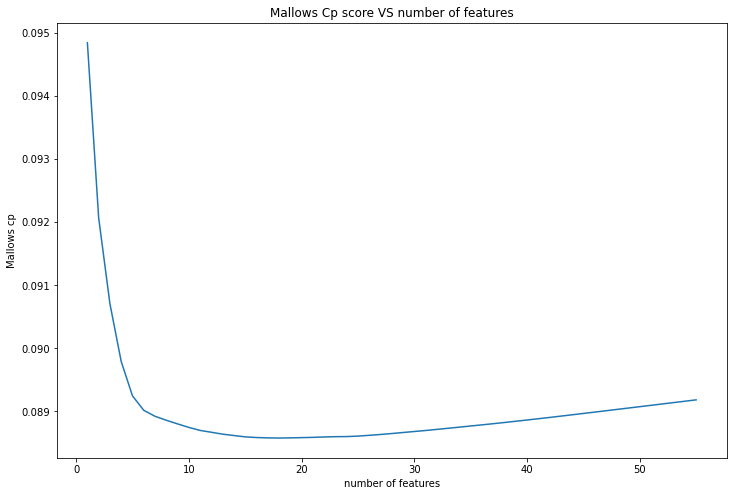

number of selected features by forward: 18


In [238]:
res = forward_selection(train_and_validation_data,train_and_validation_labels)
print(f'number of selected features by forward: {len(res)}')

# calculate the test MSE for each reduced dataset
x_forward_reduced_train_validation = train_and_validation_data[:,res]
x_forward_reduced_test = test_data[:, res]

x_forward_test_submit = test_submit[:, res]
#print(x_forward_reduced_train_validation)

The optimal number of features chosen with the Forward selection method is 18.

In [239]:
x_forward_reduced_train_validation.shape

(8211, 18)

#### Correlation matrix to see which features were selected:

In [240]:
newres = list(res)
newres.append(-1)
corr = train.iloc[:, newres].corr()
corr.style.background_gradient(cmap='coolwarm')

,admin_page_duration,info_page_duration,product_page_duration,BounceRates,ExitRates,PageValues,Month_OctNov,Month_JulAugSep,device_3.0,Region_9.0,Region_2.0,user_type_Returning_Visitor,Weekend,A_c_1,A_c_3,A_c_6,A_c_13,C_log8080,purchase
admin_page_duration,1.000000,0.202895,0.279800,-0.172847,-0.250992,0.085167,0.066804,0.035278,0.029514,-0.003564,0.003612,-0.046646,0.022822,-0.045499,-0.077753,-0.002971,-0.029357,0.003426,0.123174
info_page_duration,0.202895,1.000000,0.261922,-0.078383,-0.113354,0.041654,0.052321,-0.004668,-0.009011,-0.017500,0.001880,0.037820,0.025826,-0.032677,-0.061410,0.003847,-0.026278,-0.008641,0.083697
product_page_duration,0.279800,0.261922,1.000000,-0.210527,-0.291446,0.072090,0.173722,-0.001088,-0.062469,-0.008840,0.006274,0.121449,0.011357,0.014901,-0.076342,0.006748,0.007314,-0.017788,0.180542
BounceRates,-0.172847,-0.078383,-0.210527,1.000000,0.911291,-0.118646,-0.058695,-0.026887,0.115919,-0.007983,0.003957,0.140385,-0.044255,0.109172,0.100080,-0.001163,0.132528,0.001456,-0.154476
ExitRates,-0.250992,-0.113354,-0.291446,0.911291,1.000000,-0.174811,-0.086616,-0.034582,0.083894,-0.000898,-0.002209,0.185809,-0.060402,0.132083,0.127670,0.006987,0.137881,-0.001219,-0.212037
PageValues,0.085167,0.041654,0.072090,-0.118646,-0.174811,1.000000,0.045406,0.003682,-0.069878,0.034901,-0.002423,-0.114397,0.005508,-0.061067,-0.061555,-0.010308,-0.048679,0.012588,0.514079
Month_OctNov,0.066804,0.052321,0.173722,-0.058695,-0.086616,0.045406,1.000000,-0.216413,-0.006973,0.030991,-0.030397,-0.027091,0.051026,-0.053917,-0.054255,-0.046549,0.010495,-0.020856,0.156585
Month_JulAugSep,0.035278,-0.004668,-0.001088,-0.026887,-0.034582,0.003682,-0.216413,1.000000,0.017516,0.003090,0.000036,-0.046603,-0.011549,0.055307,-0.016726,-0.023203,0.018703,0.010698,0.019392
device_3.0,0.029514,-0.009011,-0.062469,0.115919,0.083894,-0.069878,-0.006973,0.017516,1.000000,-0.051750,-0.002124,0.052501,0.074488,-0.024024,-0.011546,0.014845,0.173795,0.019483,-0.075090
Region_9.0,-0.003564,-0.017500,-0.008840,-0.007983,-0.000898,0.034901,0.030991,0.003090,-0.051750,1.000000,-0.065336,-0.027616,-0.016580,-0.049682,0.002542,-0.007651,0.004595,-0.009348,0.008058


We can see several interesting things about the selected features:
1. On one hand, we can see that the method chose only "duration" from the "numdur" group of number and duration of pages. This makes sense becuase they had a very high correlation between them, meaning that keeping them both would add unneeded dimensionality.
2. On the other hand Bounce and Exit rates were chosen although they had high correlations.
3. Page Values was added, which makes sense, becuase from the exploration we saw that it is the feature with the highest correlation with purchase.
 

### KNN

In [241]:
parameters = {'algorithm': ['auto','ball_tree', 'kd_tree','brute' ],
              'n_neighbors':[5,31,51,81,101,131,151],
              'weights':['uniform','distance']
            }
# Gridsearch paramaters            
Best_Params = {'algorithm': ['auto'],
               'n_neighbors': [31],
               'weights': ['distance']} 


In [242]:
knn = KNeighborsClassifier()

t0 = time.time() # for Runtime measurement

clf = GridSearchCV(estimator = knn, param_grid = Best_Params, scoring = 'roc_auc', cv = 5)
clf.fit(x_forward_reduced_train_validation, train_and_validation_labels)

best_params = clf.best_params_

print(f'Best Params: {best_params} \n')
print(f'Runtime: {round(time.time()-t0,2)} seconds')

Best Params: {'algorithm': 'auto', 'n_neighbors': 31, 'weights': 'distance'} 

Runtime: 1.0 seconds


We ran KNN with 31 neighbors

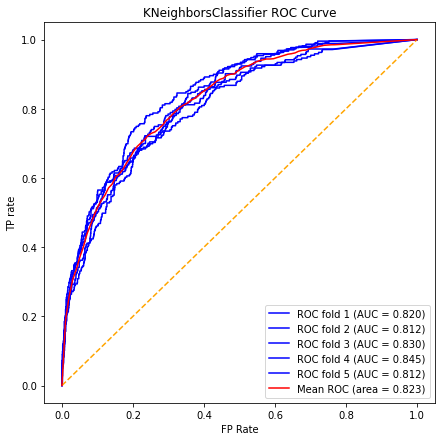

Mean AUC = 0.823


In [243]:
knn = KNeighborsClassifier(**best_params)
ROC_Plot(5, knn, x_forward_reduced_train_validation, train_and_validation_labels)


### Score on our test data

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92      1740
         1.0       0.71      0.17      0.27       313

    accuracy                           0.86      2053
   macro avg       0.79      0.58      0.60      2053
weighted avg       0.84      0.86      0.82      2053



<Figure size 216x216 with 0 Axes>

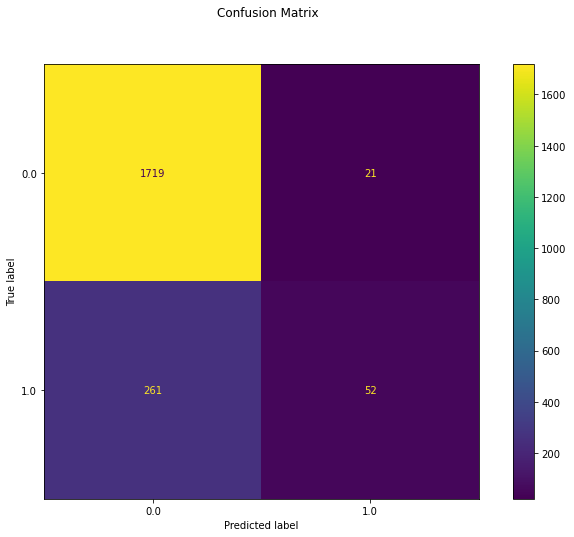

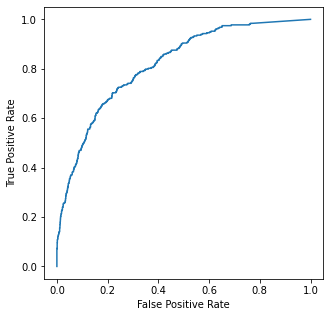

test AUC: 0.817


In [244]:
hash_models["KNN"] = clf
predict_test(clf,x_forward_reduced_test,test_labels)

We can see that in the model there isn't overfitting, and most of the mistakes are False-Negative. We can see we have high Specificity and low Sensitivity. So the model tends to predict 0.

### Logistic Regression

In [245]:
penalty = ['l1', 'l2']
C = [5, 3, 1, 0.1, 0.01]
tol = [0.01, 0.005, 0.001]
class_weight = [None, 'balanced']
solver = ['newton-cg', 'lbfgs', 'liblinear']

parameters = {'penalty' : penalty,
              'C': C,
              'tol' : tol,
              'solver' : solver, 
              'class_weight' : class_weight}

Best_Params = {'C': [5],
             'class_weight': ['balanced'],
             'penalty': ['l1'],
             'solver': ['liblinear'],
             'max_iter': [150]} 


In [246]:
reg = LogisticRegression(max_iter = 150)

t0 = time.time() # for Runtime measurement

clf = GridSearchCV(estimator = reg, param_grid = Best_Params, scoring = 'roc_auc', cv = 5)
clf.fit(x_forward_reduced_train_validation, train_and_validation_labels)

best_params = clf.best_params_
best_params['max_iter'] = 150

print(f'Best Params: {best_params} \n')
print(f'Runtime: {round(time.time()-t0,2)} seconds')

Best Params: {'C': 5, 'class_weight': 'balanced', 'max_iter': 150, 'penalty': 'l1', 'solver': 'liblinear'} 

Runtime: 0.14 seconds


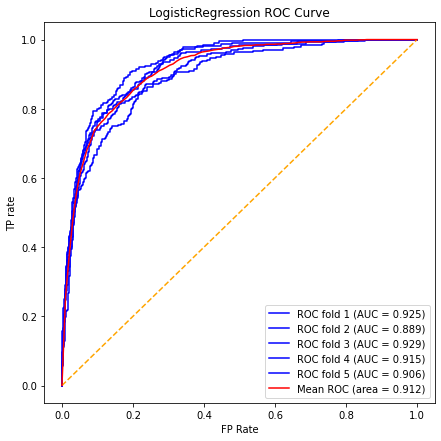

Mean AUC = 0.912


In [247]:
reg = LogisticRegression(**best_params)
ROC_Plot(5, reg, x_forward_reduced_train_validation, train_and_validation_labels)


### Score on our test data

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      1740
         1.0       0.50      0.75      0.60       313

    accuracy                           0.85      2053
   macro avg       0.73      0.81      0.76      2053
weighted avg       0.88      0.85      0.86      2053



<Figure size 216x216 with 0 Axes>

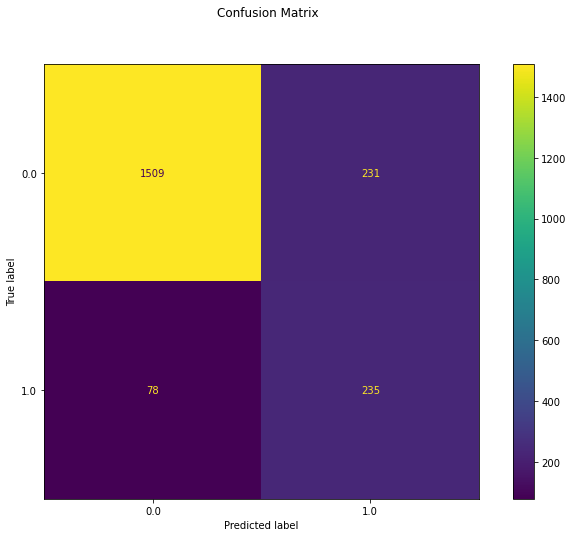

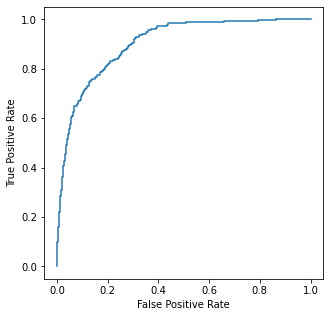

test AUC: 0.902


In [248]:
hash_models["Logistic Regression"] = clf
predict_test(clf,x_forward_reduced_test,test_labels)

The Logistic regression model seems to be a bit overfitted. This means that part of our regression coefficients represent noise rater then relationships betweeen the features. We could lower overfitting by decreasing parameter 'C' for regularization (Strengthening Regularization as it is lower). Also, in contrary to KNN, most of this models mistakes are False-Positives, meaning it is less Specific and more Sensitive.

### MLP

In [249]:
parameter_grid_1 = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (40,80,40)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

param_grid_2 = {
    'hidden_layer_sizes': [(120,80,40), (100,50,30)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05],
    'learning_rate': ['constant','adaptive'],
}

Best_Params ={
    'activation': ['tanh'],
    'alpha': [0.01],
    'hidden_layer_sizes': [(50, 100, 50)],
    'learning_rate': ['adaptive'],
    'solver': ['adam'],
    'max_iter': [100]} 


In [250]:
mlp = MLPClassifier(max_iter=100)

t0 = time.time() # for Runtime measurement

clf = GridSearchCV(mlp, Best_Params, cv=5, scoring='roc_auc')
clf.fit(x_forward_reduced_train_validation, train_and_validation_labels)

best_params = clf.best_params_
best_params['max_iter'] = 100

print(f'Best Params: {best_params} \n')
print(f'Runtime: {round(time.time()-t0,2)} seconds')

Best Params: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'} 

Runtime: 32.88 seconds


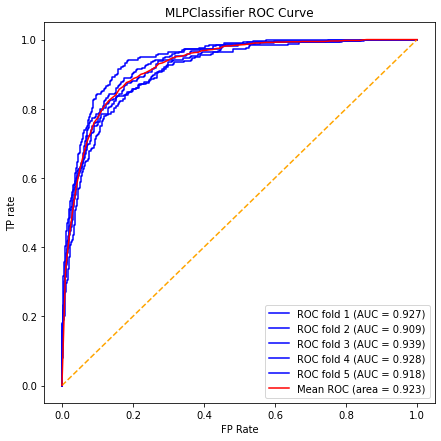

Mean AUC = 0.923


In [251]:
mlp = MLPClassifier(**best_params)
ROC_Plot(5, mlp, x_forward_reduced_train_validation, train_and_validation_labels)


### Score on our test data

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1740
         1.0       0.71      0.56      0.63       313

    accuracy                           0.90      2053
   macro avg       0.82      0.76      0.78      2053
weighted avg       0.89      0.90      0.89      2053



<Figure size 216x216 with 0 Axes>

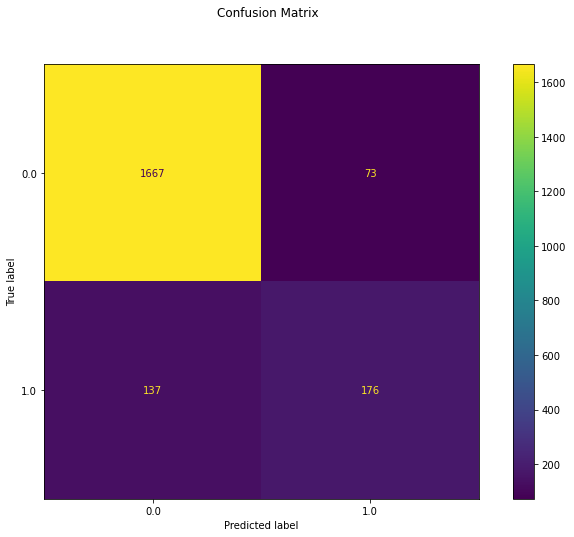

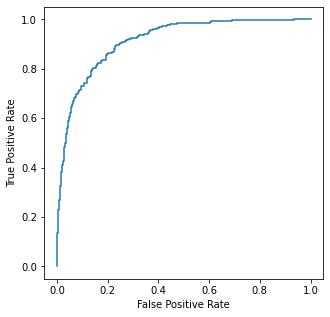

test AUC: 0.913


In [252]:
hash_models["MLP"] = clf
predict_test(clf,x_forward_reduced_test,test_labels)

We can see that our predictions in the MLP model are better than the previous models, MLP is also a much more complicated function space than the previous models, so although there is a 1% difference in the AUC scores, we think that it isn't truely overfitting. In this model the mistakes are more evened out between False-Negative and False- Positive, With False-negative having more.

### Random Forest

In [253]:
Best_Params_0 = {
    'n_estimators': [1000],
    'max_depth': [20,30,50],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'criterion': ['entropy']   
}

# Random search Random Forest
criterion = ['entropy']
n_estimators = [750, 1000,1300]
min_samples_split = [7,10,15]
max_features = ["auto"]
max_depth = [5,10,15]
min_samples_leaf = [1,2,3]
n_jobs = [-1]

parameters = {
     'criterion': criterion,
    'n_estimators': n_estimators,
     'min_samples_split' : min_samples_split,
     'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'n_jobs' : n_jobs
}


Best_Params_1 ={
 'criterion': ['entropy'],
 'max_depth': [15],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [7],
 'n_estimators': [1300],
 'n_jobs': [-1],
 'random_state': [0]} 



In [254]:
rfc = RandomForestClassifier(random_state=0)

t0 = time.time() # for Runtime measurement

# Instantiate the grid search model
clf = GridSearchCV(estimator = rfc, param_grid = Best_Params_1, scoring='roc_auc', cv = 5)
clf.fit(x_forward_reduced_train_validation, train_and_validation_labels)

best_params = clf.best_params_
best_params['random_state'] = 0

print(f'Best Params: {best_params} \n')
print(f'Runtime: {round(time.time()-t0,2)} seconds')

Best Params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 1300, 'n_jobs': -1, 'random_state': 0} 

Runtime: 16.56 seconds


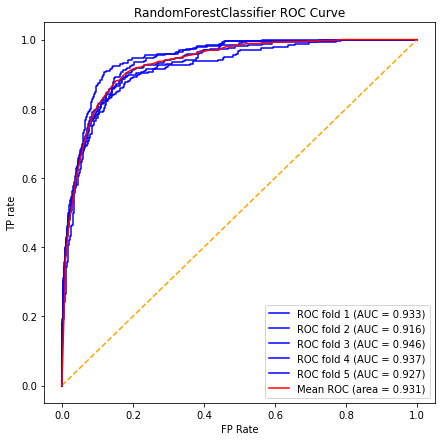

Mean AUC = 0.931


In [255]:
rfc = RandomForestClassifier(**best_params)
ROC_Plot(5, rfc, x_forward_reduced_train_validation, train_and_validation_labels)


### Score on our test data

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1740
         1.0       0.74      0.57      0.64       313

    accuracy                           0.90      2053
   macro avg       0.83      0.77      0.79      2053
weighted avg       0.90      0.90      0.90      2053



<Figure size 216x216 with 0 Axes>

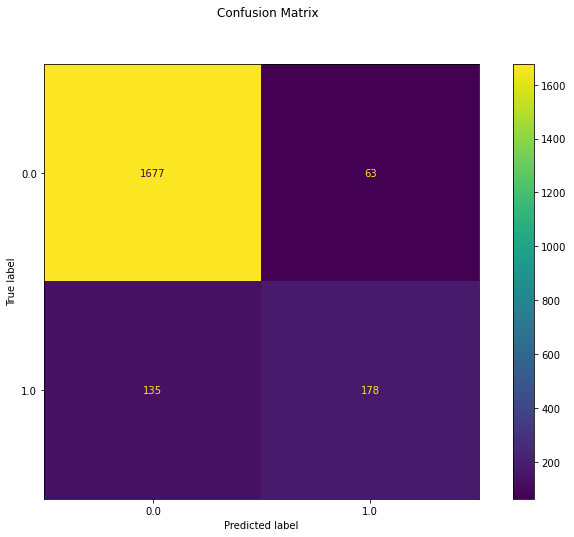

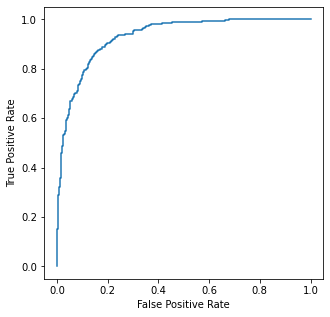

test AUC: 0.931


In [256]:
hash_models["Random Forest"] = clf
predict_test(clf,x_forward_reduced_test,test_labels)

Random forest is our best model, with a test AUC of 0.931. We can see that in this model there is no overfitting whatsoever, with a mean AUC of the same score. The amount of False-postives and False-Negatives are very similar to MLP.

[12  7 11  6  1  3  0  2  4  5]


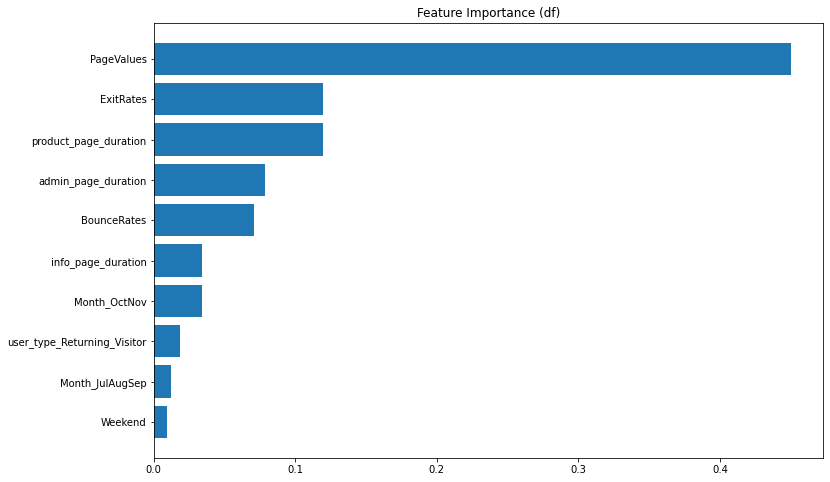

In [257]:
newtrain = train.iloc[:, res]
best_rf_grid = clf.best_estimator_

# get the feature importance array from the model object attribute
feature_importance = best_rf_grid.feature_importances_

# get the index order to sort the importances
sorted_idx = np.argsort(feature_importance)[-10:]
print(sorted_idx)
# plot
pos = np.arange(sorted_idx.shape[0]) + .5
plt.rcParams["figure.figsize"] = (12,8)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(newtrain.columns)[sorted_idx])
plt.title('Feature Importance (df)')
plt.show()

With Random forest we can also analyze the feature importance:
We will use vizualisations to understand why this is the feature importance plot.



## Explaining the Importance of each feature to the success of the Model:
Random forest works with decision trees, so we will try to see if we can recognize patterns in the data which would help us understand why these are the chosen importance features.<br> First of all we can see below that there are features described which are strongly correlated with each other and with purchase.
<br> Let us plot them:<br>
While we look at the plots, we shall keep in mind- we are searching to see that 'purchase' is distributed in a way a heirarchal method could recognize, so if we can see it in 2D, the method will probably be able to see it as well.

In [258]:
newres = list(sorted_idx)
newtrain['purchase'] = train['purchase']
newres.append(-1)
corr = newtrain.iloc[:, newres].corr()
corr.style.background_gradient(cmap='coolwarm')

,Weekend,Month_JulAugSep,user_type_Returning_Visitor,Month_OctNov,info_page_duration,BounceRates,admin_page_duration,product_page_duration,ExitRates,PageValues,purchase
Weekend,1.000000,-0.011549,-0.046483,0.051026,0.025826,-0.044255,0.022822,0.011357,-0.060402,0.005508,0.034087
Month_JulAugSep,-0.011549,1.000000,-0.046603,-0.216413,-0.004668,-0.026887,0.035278,-0.001088,-0.034582,0.003682,0.019392
user_type_Returning_Visitor,-0.046483,-0.046603,1.000000,-0.027091,0.037820,0.140385,-0.046646,0.121449,0.185809,-0.114397,-0.119498
Month_OctNov,0.051026,-0.216413,-0.027091,1.000000,0.052321,-0.058695,0.066804,0.173722,-0.086616,0.045406,0.156585
info_page_duration,0.025826,-0.004668,0.037820,0.052321,1.000000,-0.078383,0.202895,0.261922,-0.113354,0.041654,0.083697
BounceRates,-0.044255,-0.026887,0.140385,-0.058695,-0.078383,1.000000,-0.172847,-0.210527,0.911291,-0.118646,-0.154476
admin_page_duration,0.022822,0.035278,-0.046646,0.066804,0.202895,-0.172847,1.000000,0.279800,-0.250992,0.085167,0.123174
product_page_duration,0.011357,-0.001088,0.121449,0.173722,0.261922,-0.210527,0.279800,1.000000,-0.291446,0.072090,0.180542
ExitRates,-0.060402,-0.034582,0.185809,-0.086616,-0.113354,0.911291,-0.250992,-0.291446,1.000000,-0.174811,-0.212037
PageValues,0.005508,0.003682,-0.114397,0.045406,0.041654,-0.118646,0.085167,0.072090,-0.174811,1.000000,0.514079


We will look at the top 8 most important as described in the bar plot above, and find the relationships that have made them the most important:

#### ExitRates, PageValues, BounceRates:

#### 1D:

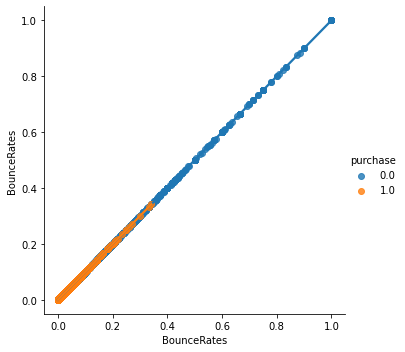

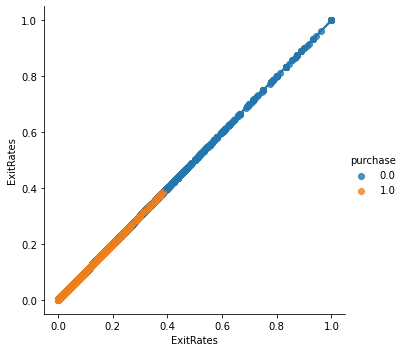

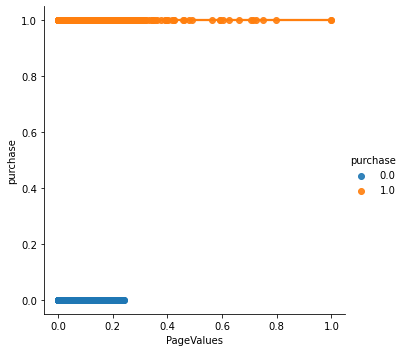

In [259]:
regplot = sns.lmplot(x='BounceRates', y="BounceRates", hue ='purchase', data=train)
plt.show()
regplot = sns.lmplot(x='ExitRates', y="ExitRates", hue ='purchase', data=train)
plt.show()
regplot = sns.lmplot(x='PageValues', y="purchase", hue ='purchase', scatter_kws={'alpha':0.9}, data=train)
plt.show()

From looking at the features in 1 (!!) Dimension, we can see that for each single feature there is a very clear distribution of purchases- making it almost impossible for the model to miss.

#### 2D:

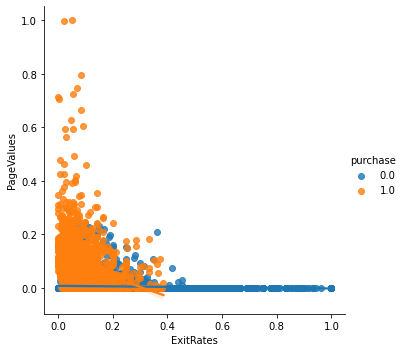

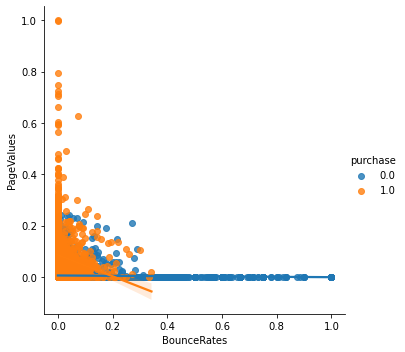

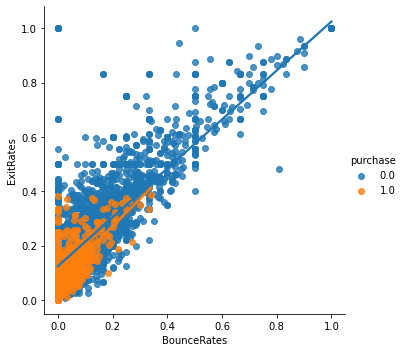

In [260]:
regplot = sns.lmplot(x="ExitRates", y="PageValues", hue ='purchase', data=train)
plt.show()
regplot = sns.lmplot(x="BounceRates", y="PageValues", hue ='purchase', data=train)
plt.show()
regplot = sns.lmplot(x="BounceRates", y="ExitRates", hue ='purchase', data=train)
plt.show()



In 2D the relationships are even more obvoius- if there are high exit and bounce rates, it is almost definately not a purchase, and withhigh pagevalues it is almost definately a purchase.

We can also see that PageValues has a correlation with returning visitor, and this plot confrims why- a new visitor (0) is more likely to make a purchase.

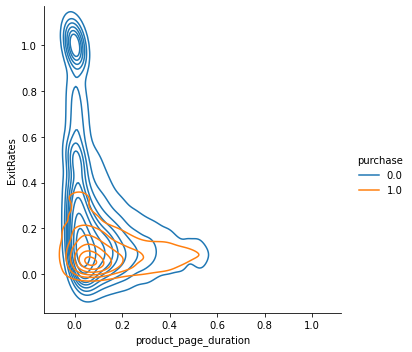

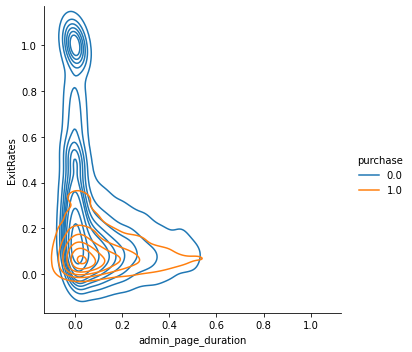

In [261]:
regplot = sns.displot(x="product_page_duration", y="ExitRates", hue ='purchase', data=train, kind ="kde")
plt.show()
regplot = sns.displot(x="admin_page_duration", y="ExitRates", hue ='purchase', data=train, kind ="kde")
plt.show()

We can also see that ExitRates and BounceRates are inversly correlated with admin and product page durations- and these relationships are important because the less time on these pages, and the higher the exit or bounce rate- the lower the chances of a purchase.

#### Admin, Product, Info page Duration:

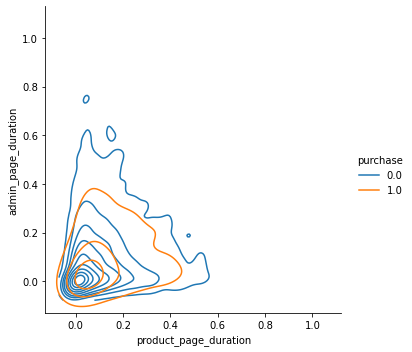

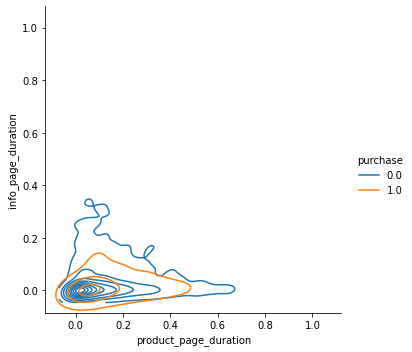

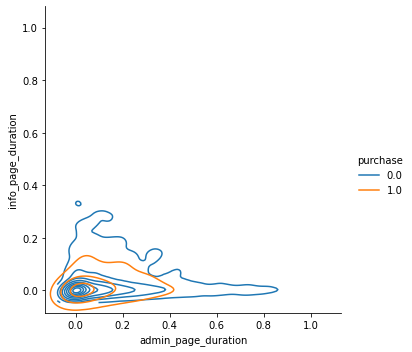

In [262]:
regplot = sns.displot(x="product_page_duration", y="admin_page_duration", hue ='purchase', data=train, kind = 'kde')
plt.show()
regplot = sns.displot(x="product_page_duration", y="info_page_duration", hue ='purchase', data=train, kind = 'kde')
plt.show()
regplot = sns.displot(x="admin_page_duration", y="info_page_duration", hue ='purchase', data=train, kind ='kde')
plt.show()


In all of the duration relatioships we can see that a combination of high scores is more likely to not purchase.

#### Binary important features:

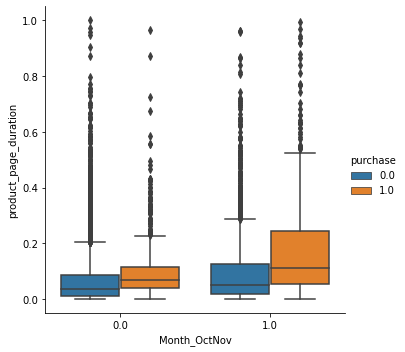

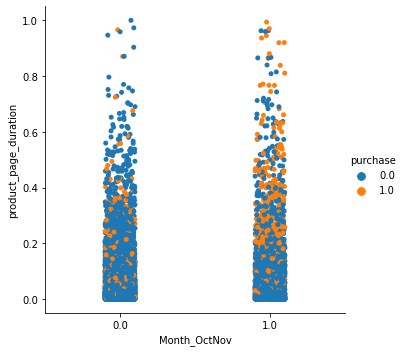

In [263]:
regplot = sns.catplot(x="Month_OctNov", y="product_page_duration", hue ='purchase', data=train, kind = "box")
plt.show()
regplot = sns.catplot(x="Month_OctNov", y="product_page_duration", hue ='purchase', data=train)
plt.show()

 We can see that with high product page duration, in the months of October and November, there is a much higher chance of purchase than not.
 

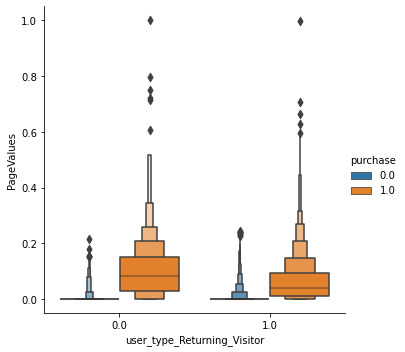

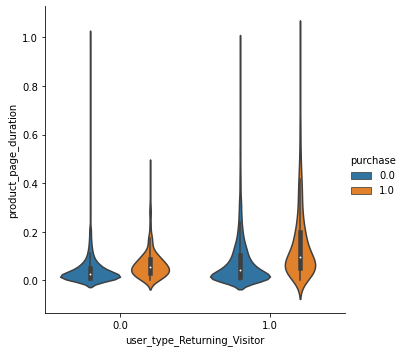

In [264]:
regplot = sns.catplot(x="user_type_Returning_Visitor", y="PageValues", hue ='purchase', data=train, kind = "boxen")
plt.show()
regplot = sns.catplot(x="user_type_Returning_Visitor", y="product_page_duration", hue ='purchase', data=train, kind = "violin")
plt.show()



1. We can see that a new visitor with high page values is more likely to purchase.
2. We can also tell that a returning visitor with a high product page duration, is more likely to purchase.

#### Conclusion:
There are many interesting and sensible relationships in this set of features, and if we could pretty easily see them by plotting, we believe that the Random forest also recognized them, and that is why they were chosen as the most important features.

## Final Models Evaluation:

In [265]:
def multi_ROC(hash_map,test_d,test_l):
    plt.figure(figsize=(10,10))
    for name in hash_map:
        y_pred_proba = hash_map[name].predict_proba(test_d)[::,1]
        fpr, tpr, _ = metrics.roc_curve(test_l,  y_pred_proba)
        single_auc = auc(fpr, tpr)
        col = (np.random.random(), np.random.random(), np.random.random())
        plt.plot(fpr, tpr, c=col, label="%s ROC Curve, (AUC = %.3f)" % (name, single_auc))

    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP rate')
    plt.legend(loc="lower right")
    plt.title("Best Models")
    plt.show()  

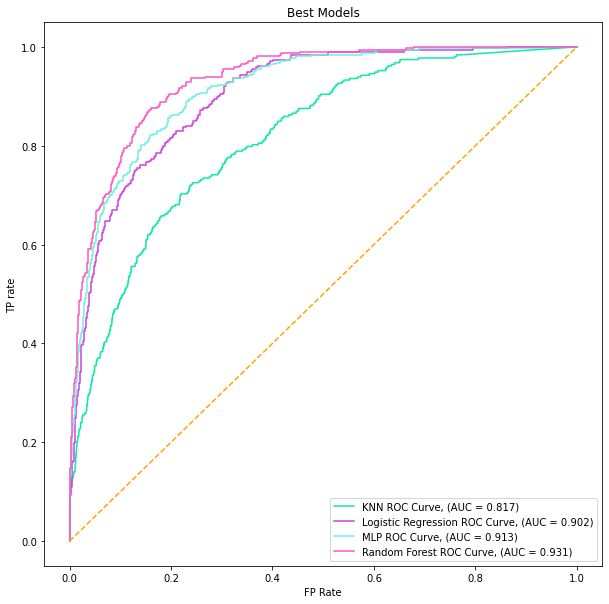

In [266]:
multi_ROC(hash_models,x_forward_reduced_test,test_labels)

#### In Conclusion:
Our best model is the Random forest model, so we will run it on the entire dataframe and submit probabilities of 1.

In [267]:
Final_train = X[:, res]
clf.fit(Final_train, y)
y_pred = clf.predict_proba(x_forward_test_submit)

In [268]:
predics= pd.DataFrame(y_pred)
predics['predict_prob'] = y_pred[:, 1]
predics['predict_prob'].to_csv('Submission_group_36.csv', index_label = 'id')

## Pipeline:

In [269]:
def pipeline(trainpath= TRAINPATH, testpath = TESTPATH):
    train = pd.read_csv(trainpath, index_col=0)
    test = pd.read_csv(testpath, index_col=0)
    train, test = cattofloatstraintest(train, test)
    numdur = ['num_of_admin_pages','admin_page_duration','num_of_info_pages','info_page_duration','num_of_product_pages','product_page_duration','total_duration','purchase']
    rates = ['BounceRates','PageValues','ExitRates','purchase']
    othernum = ['B', 'D','purchase']
    
    # numdur:
    ## Outliers:
    train = train.drop(train[(train["info_page_duration"]>1500) | (train["num_of_info_pages"]>8)].index)
    train = train.drop(train[(train["product_page_duration"]>13000) | (train["num_of_product_pages"]>400)].index)
    train = train.drop(train[(train["admin_page_duration"]>1000) | (train["num_of_admin_pages"]>17)].index)
    scaler = MinMaxScaler()
    train[numdur[:-1]] = scaler.fit_transform(train[numdur[:-1]])
    test[numdur[:-1]] = scaler.transform(test[numdur[:-1]])
    # Delete total duration
    numdur.remove('total_duration')
    del train['total_duration']
    del test['total_duration']
    # Implementing by KNN Train & Test - Option 1
    train[numdur] = knn_nan(train[numdur])
    #Implementing By median for Test
    test = fill_test_by_median(train[numdur[:-1]],test)

    #Rates:
    ## Outliers:
    train = train.drop(train[(train["PageValues"]>100) & (train["purchase"] == 0)].index)
    train = train.drop(train[(train["ExitRates"]>0.08) & (train["purchase"] == 1)].index)
    train = train.drop(train[(train["BounceRates"]>0.075) & (train["purchase"] == 1)].index)
    ## Normalization:
    scaler = MinMaxScaler()
    train[rates[:-1]] = scaler.fit_transform(train[rates[:-1]])
    test[rates[:-1]] = scaler.transform(test[rates[:-1]])
    # Implementing by KNN Train & Test
    train[rates] = knn_nan(train[rates])
    #Implementing By median for Test
    test = fill_test_by_median(train[rates[:-1]],test)

    # Othernum:
    #Outliers:
    mean, std = train['B'].mean(), train['B'].std()
    train = train.drop(train[train['B'] > (mean + (2.8 * std))].index)
    train = train.drop(train[train['B'] < (mean - (2.8 * std))].index)
    #Normalization:
    # B
    scaler = StandardScaler()
    train[['B']] = scaler.fit_transform(train[['B']])
    test[['B']] = scaler.transform(test[['B']])
    # Deleting D:
    del train['D']
    del test['D']
    # Implementing by average for column 'B'
    train, test = fill_average(train, test, 'B')
    
    #Categorical:
    tohotcode = []
    #user type:
    train, test = smallvariabletomostpopulartraintest(train = train, test =test, col = 'user_type', switchcol = "Other")
    train, test = fill_most_common_value_cat_train_test('user_type', df = train, test =test)
    tohotcode.append('user_type')
    #internet browsers:
    train['internet_browser'], test['internet_browser'] = mergeallbrowserstraintest(train = train, test =test)
    train, test = handlebrowsernantraintest(col= 'internet_browser', train= train, test=test)
    tohotcode.append('internet_browser')
    #closeness to holiday:
    handlingholidaytraintest(train=train, test = test)
    train, test = fill_most_common_value_cat_train_test('closeness_to_holiday', df  = train, test =test)
    #Month:
    handlemonthstraintest(mergebyreason=True, train = train, test =test)
    train, test = fill_most_common_value_cat_train_test('Month', df  = train, test =test)
    tohotcode.append('Month')
    #Weekend:
    train, test = fill_most_common_value_cat_train_test('Weekend', df = train, test =test)
    train['Weekend'].replace({False: 0, True: 1}, inplace=True)
    test['Weekend'].replace({False: 0, True: 1}, inplace=True)
    #A:
    mergec_20(train)
    mergec_20(test)
    handleAtraintest(mergebelow5percent=True, train = train, test =test)
    train, test = newgroupnantraintest('A', train = train, test =test)
    tohotcode.append('A')
    #C:
    train, test = fill_most_common_value_cat_train_test('C', df = train, test =test)
    tohotcode.append('C')
    #region:
    train, test = fill_most_common_value_cat_train_test('Region', df = train, test =test)
    tohotcode.append('Region')
    #Device:
    handlingdevicestraintest(mergesmall4=True, train = train, test =test)
    train, test = handledevicenantraintest(col= 'device', train= train, test=test)
    tohotcode.append('device')
     
     #One hot encoding all values:
    train = onehotcat(train, tohotcode)
    test = onehotcat(test, tohotcode)

    ##If we decide to insert D it should be here
    #Deleting redundant columns:
    for i in train:
        if i not in test:
            if i != "purchase":
                del train[i]

    for i in test:
        if i not in train:
            del test[i]
            
    purchase_reorder = train.pop('purchase')
    rows, cols = train.shape
    train.insert(cols, 'purchase', purchase_reorder)
    
    X, y = train.values[:,:-1], train.values[:,-1]
    test_submit = test.values[:,:]

    #split to train and test
    train_and_validation_data ,test_data ,train_and_validation_labels, test_labels = train_test_split(X,y,test_size = 0.2, random_state= 42, shuffle=True, stratify = y)

    res = forward_selection_test(train_and_validation_data,train_and_validation_labels)
    x_forward_test_submit = test_submit[:, res]
    x_forward_reduced_train_validation = train_and_validation_data[:,res]
    x_forward_reduced_test = test_data[:, res]

    Best_Params_1 ={
 'criterion': ['entropy'],
 'max_depth': [15],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [7],
 'n_estimators': [1300],
 'n_jobs': [-1],
 'random_state': [0]} 

    rfc = RandomForestClassifier(random_state = 0)

    clf = GridSearchCV(estimator = rfc, param_grid = Best_Params_1, scoring='roc_auc', cv = 5)
    clf.fit(x_forward_reduced_train_validation, train_and_validation_labels)
    best_params = clf.best_params_
    best_params['random_state'] = 0

    rfc = RandomForestClassifier(**best_params)
    
    Final_train = X[:, res]
    clf.fit(Final_train, y)
    y_pred = clf.predict_proba(x_forward_test_submit)
    predics= pd.DataFrame(y_pred)
    predics['predict_prob'] = y_pred[:, 1]
    predics['predict_prob'].to_csv('Submission_group_36.csv', index_label = 'id')
    


















In [270]:
# To run pipeline, run cell:
pipeline()